In [1]:
import math
import random
import torch
import numpy as np
import torch.nn.functional
import matplotlib.pyplot as plt
import torch.optim as opt
from torch.autograd import Variable
from sklearn.model_selection import train_test_split
import copy
import scipy.stats as st
from sklearn.datasets.samples_generator import make_blobs
from matplotlib.colors import LogNorm 
import matplotlib.cm as cm



from scipy.interpolate import griddata

D:\ComputerSoftwares\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
#global veriable 
Uniform_low_bound=0
Uniform_up_bound=1
Agent_number_n=1000

number_of_groups=2

Normal_loc=0.5
Normal_scale=0.2
Normal_loc1=0.15
Normal_loc2=0.85
Normal_scale1=0.1
Normal_scale2=0.1
Distribution_number=10000


In [3]:
class Foo(object):

    def __init__(self, test_item, test_change_item, deadline):
        self.test_item = test_item
        self.test_change_item = test_change_item
        self.deadline = deadline

    def __lt__(self, other):
        return self.test_change_item < other.test_change_item

[3.20846728e-02 1.91387283e-01 8.74401971e-01 8.81268564e-01
 4.58303073e-01 1.73895806e-01 9.10968976e-01 3.50190775e-01
 5.27844494e-01 4.10191471e-01 3.26192511e-02 7.27539347e-01
 9.26119282e-02 7.84721419e-01 2.86249833e-01 3.92417219e-01
 6.61775734e-01 2.32698658e-01 9.29630177e-01 1.36784628e-01
 2.26317064e-01 6.88450669e-01 1.21765137e-01 8.83263073e-01
 6.84611543e-01 1.11805826e-01 8.85039297e-01 8.40046828e-01
 4.44830553e-01 4.76791475e-01 2.69073346e-01 2.46016633e-01
 6.94054148e-01 5.84992311e-01 6.49331413e-03 3.39118076e-01
 5.37249372e-01 7.63709767e-01 5.15953277e-01 5.95306208e-01
 1.00328089e-01 9.43877401e-01 5.40866850e-01 3.65888547e-01
 1.57597864e-01 7.31096103e-01 4.55625570e-02 7.35841266e-01
 5.62163317e-01 6.40979921e-02 7.37404622e-01 5.80511041e-01
 9.24978075e-02 8.08314862e-01 6.52318982e-01 4.05431133e-01
 3.11854338e-01 4.95626781e-01 8.43198728e-01 4.67540057e-01
 1.08786012e-01 2.76907914e-01 9.54586845e-01 7.18816190e-01
 6.59191874e-01 4.198387

[[0.66703503 0.81739519 0.48282357 ... 0.78985233 0.50758129 0.62979368]
 [0.05086844 0.18234777 0.09622302 ... 0.63421777 0.74303375 0.89905257]
 [0.86131713 0.19447417 0.39761316 ... 0.70640929 0.45421267 0.16598678]
 ...
 [0.48640888 0.92299404 0.61339059 ... 0.72908987 0.7057166  0.03656263]
 [0.68370881 0.52086814 0.83745743 ... 0.24826224 0.38681314 0.24435137]
 [0.93148371 0.61887628 0.03556621 ... 0.68703014 0.64493986 0.16257964]]
[0.66703503 0.05086844 0.86131713 ... 0.48640888 0.68370881 0.93148371]


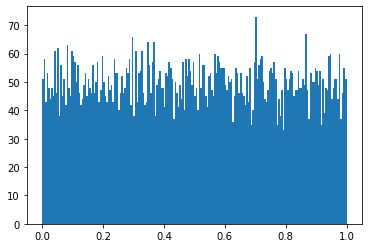

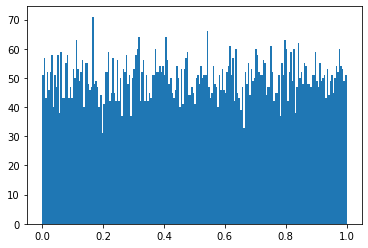

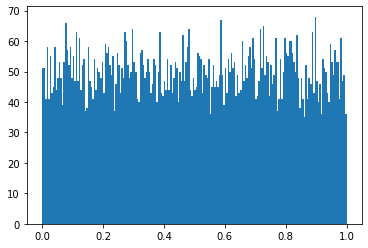

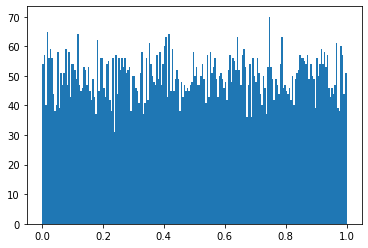

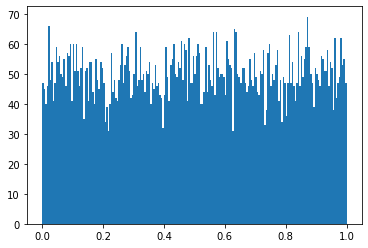

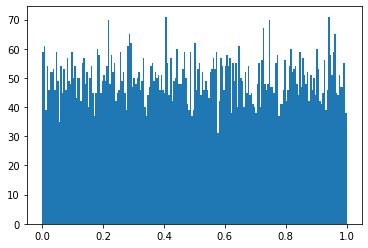

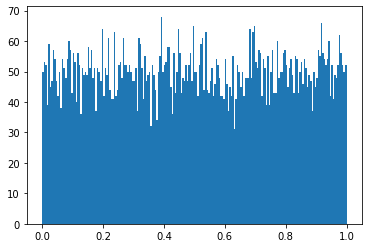

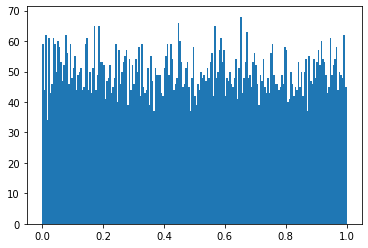

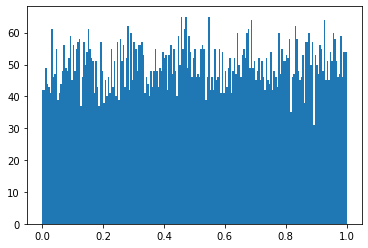

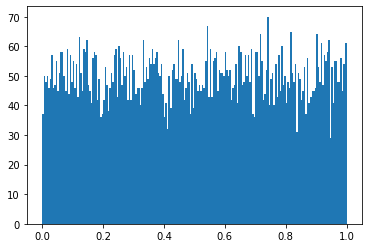

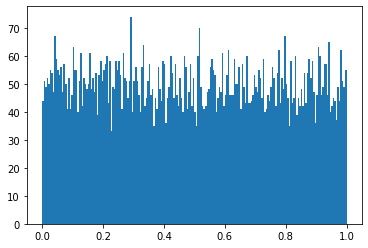

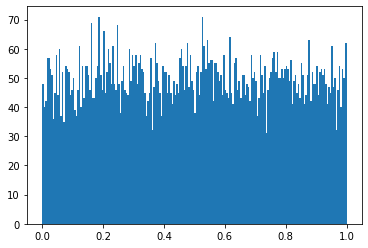

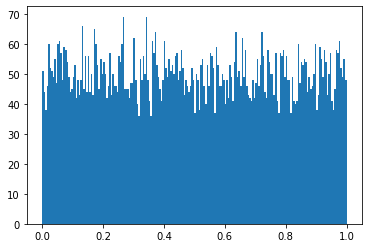

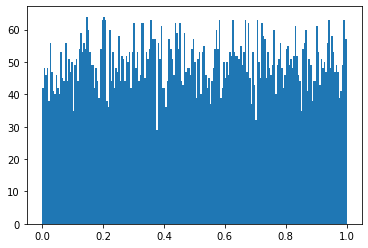

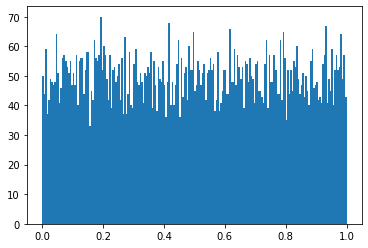

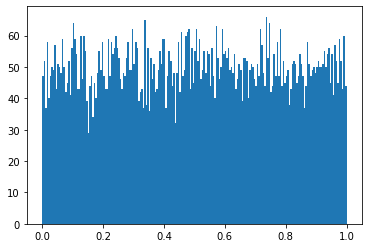

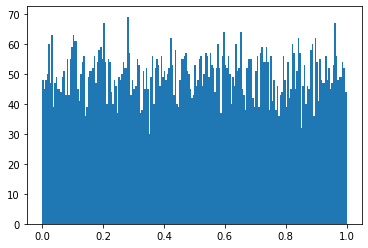

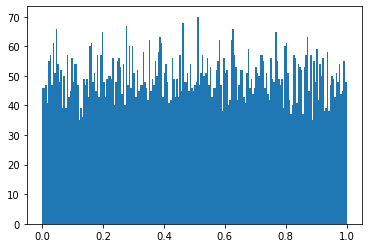

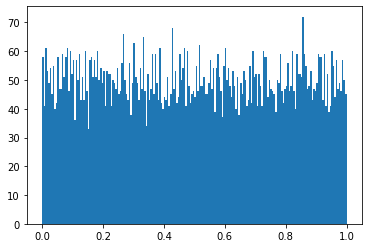

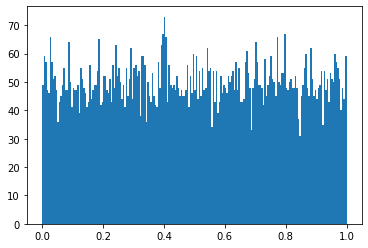

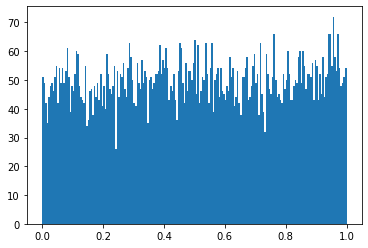

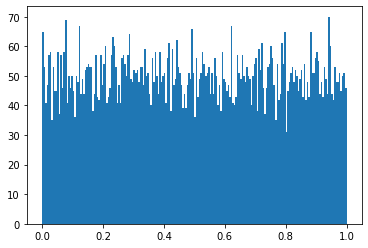

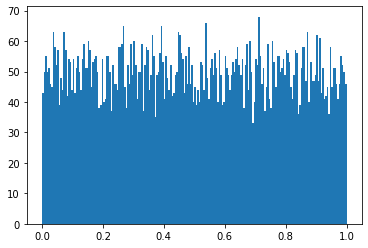

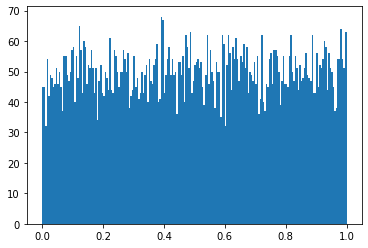

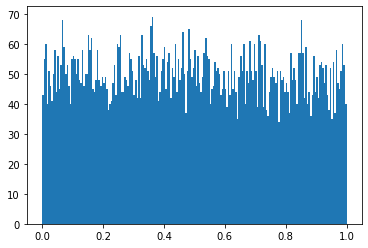

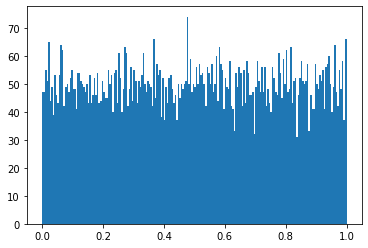

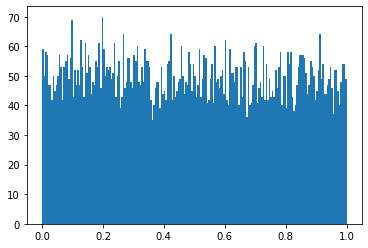

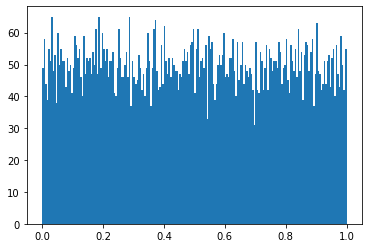

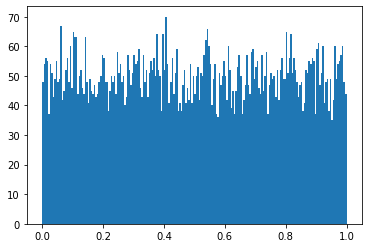

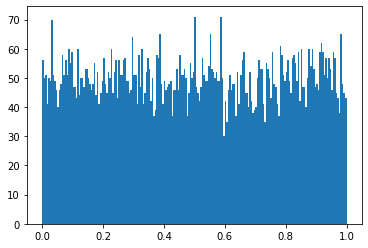

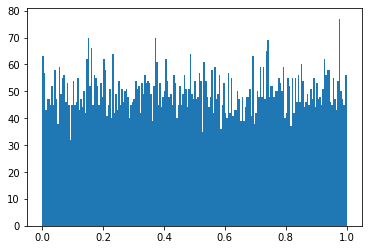

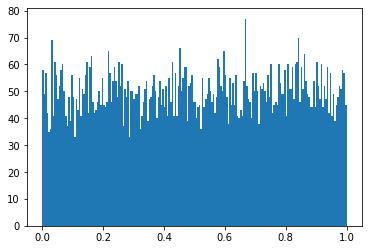

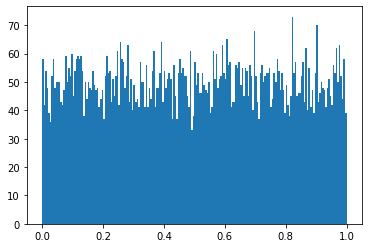

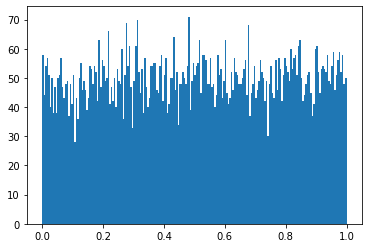

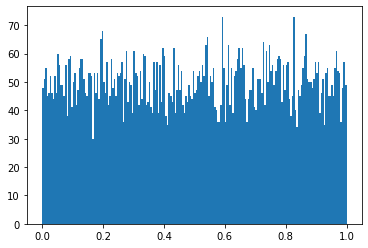

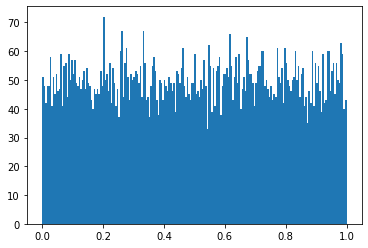

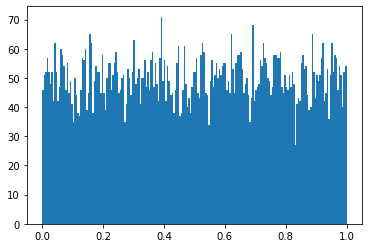

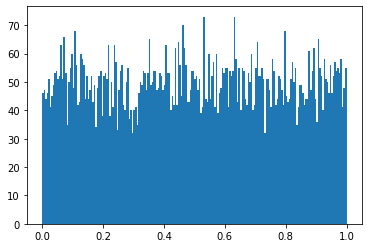

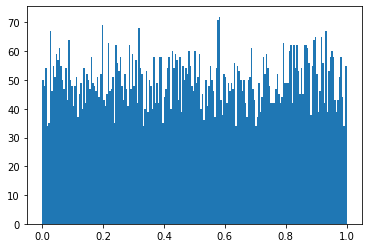

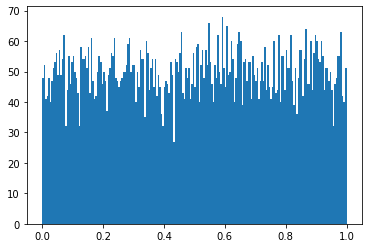

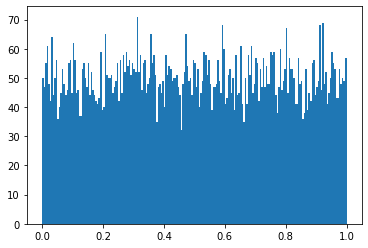

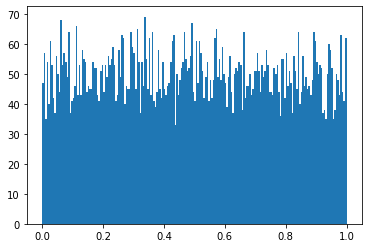

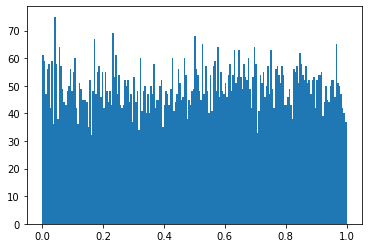

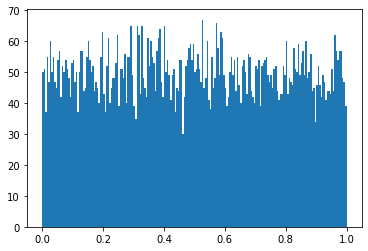

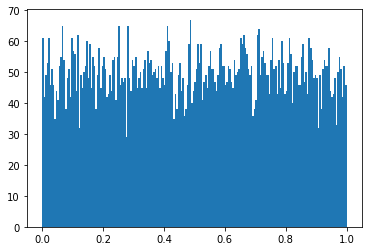

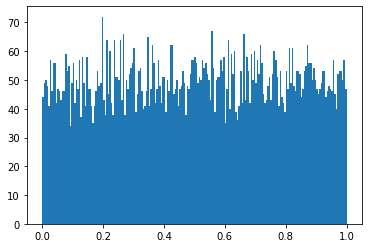

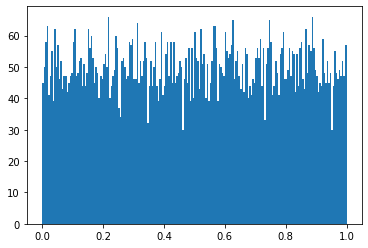

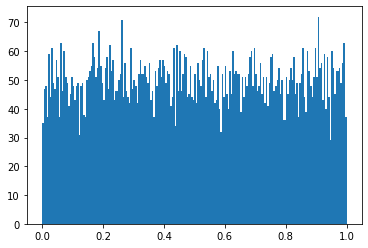

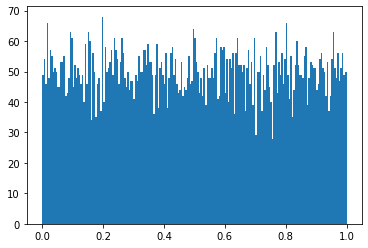

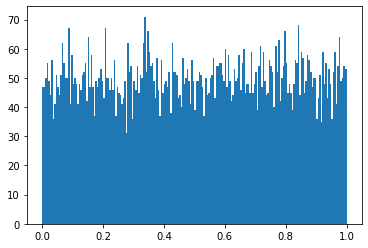

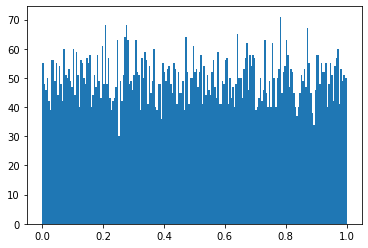

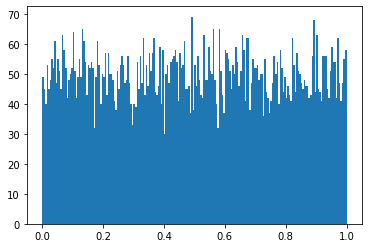

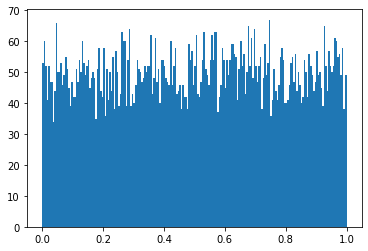

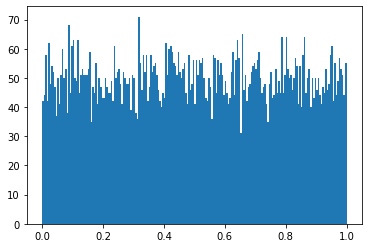

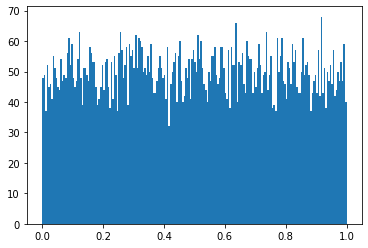

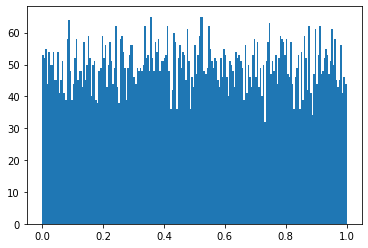

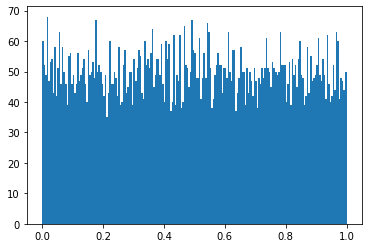

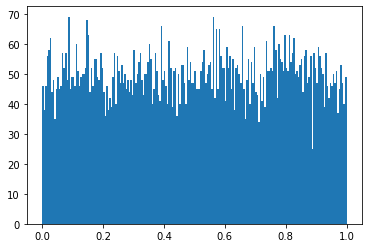

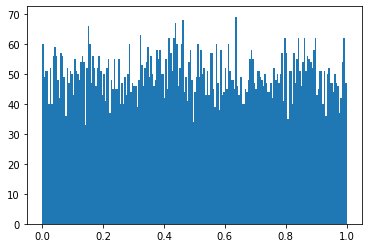

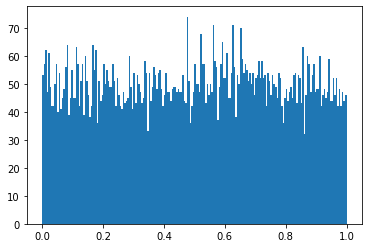

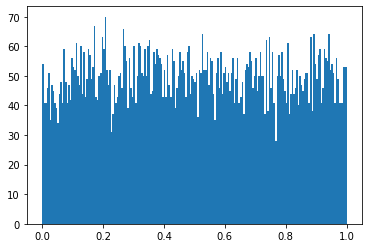

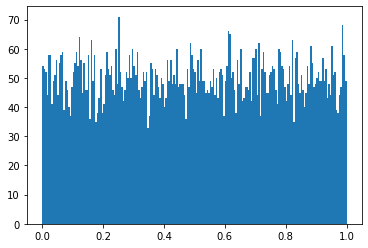

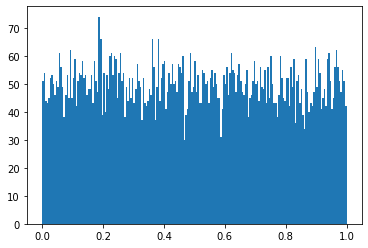

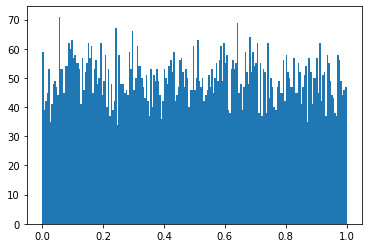

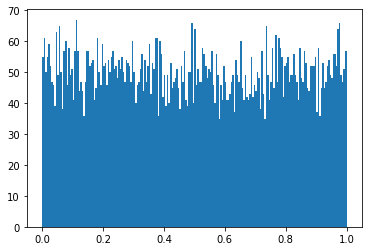

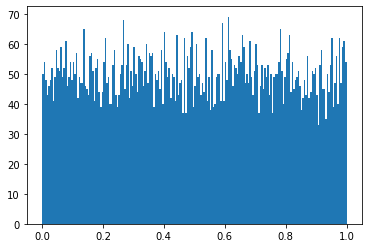

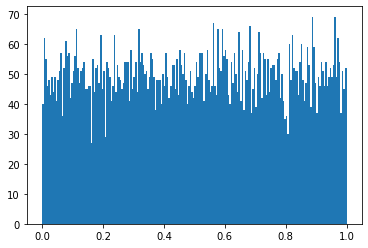

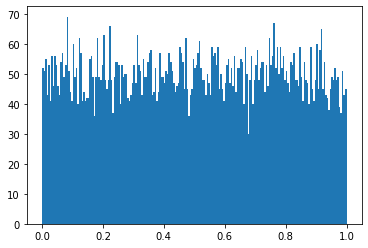

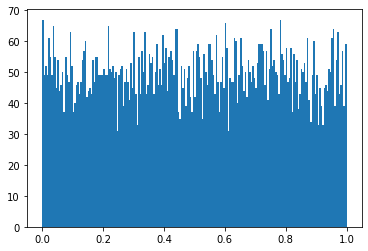

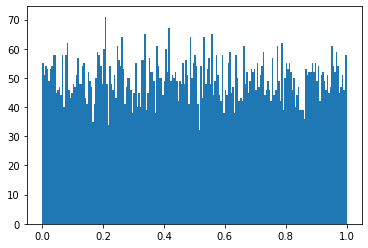

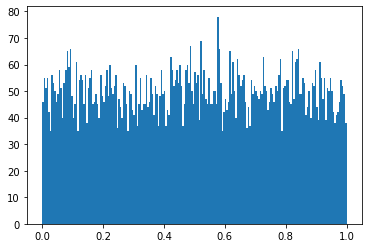

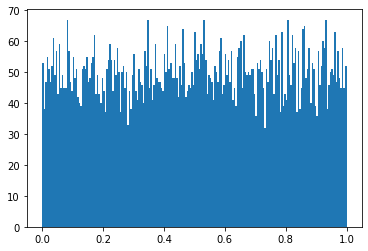

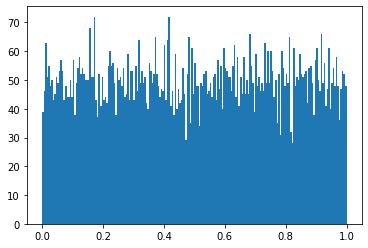

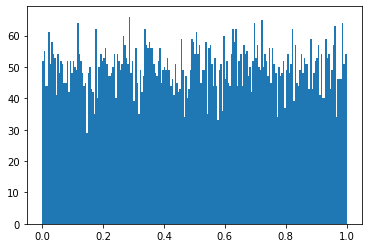

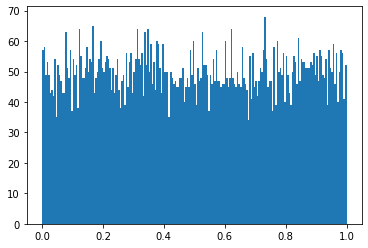

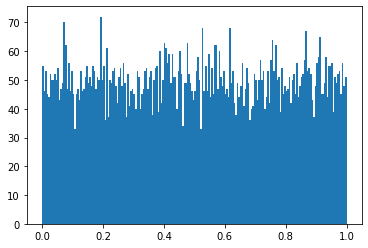

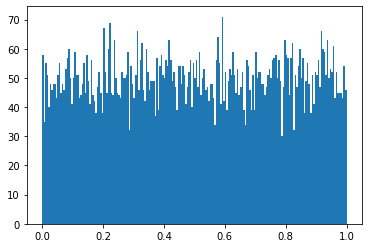

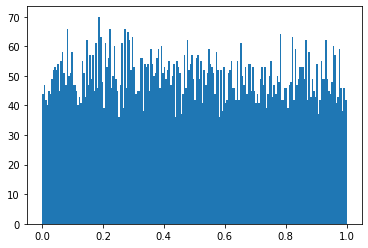

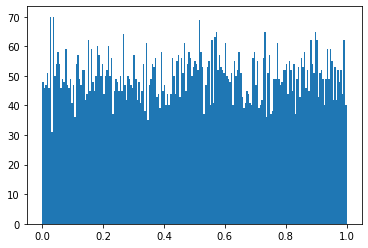

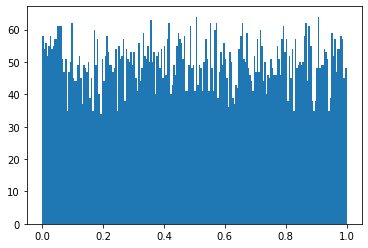

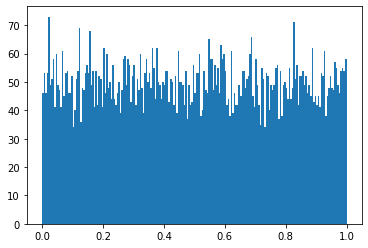

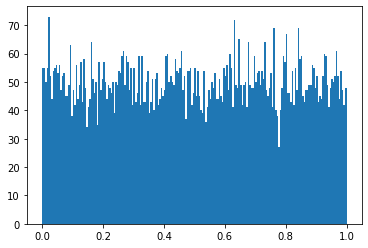

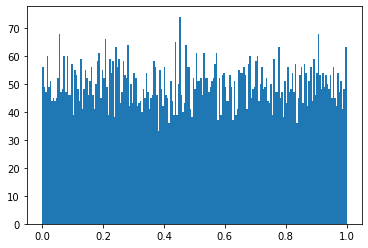

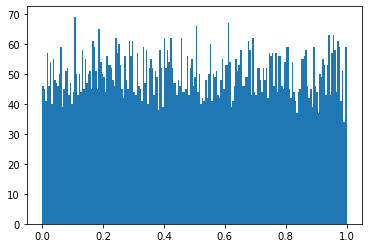

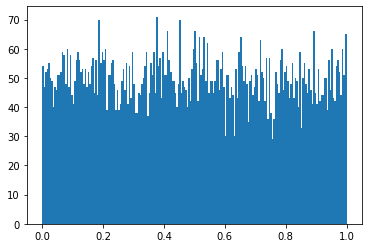

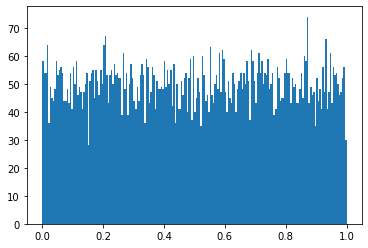

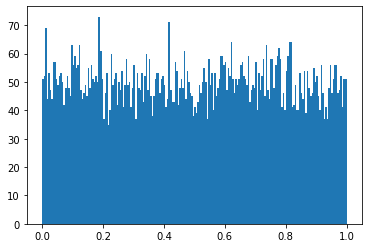

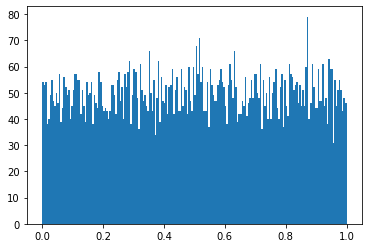

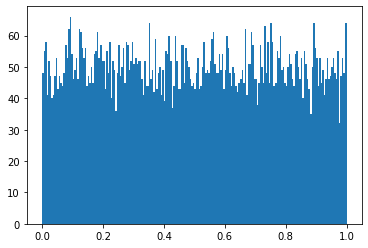

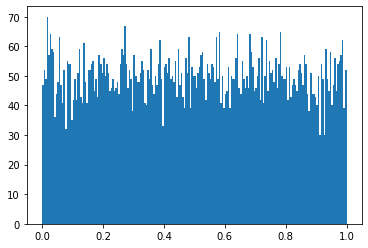

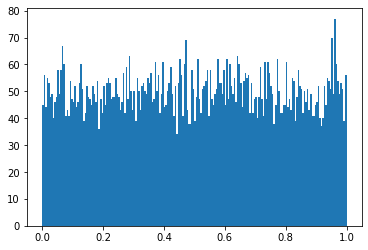

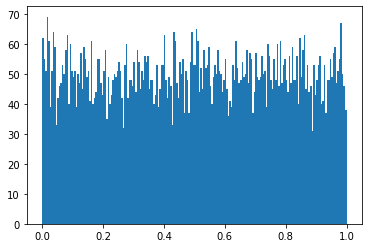

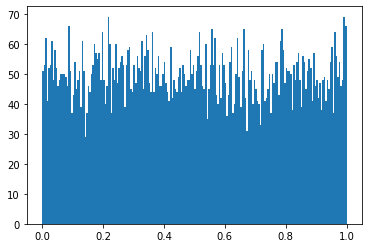

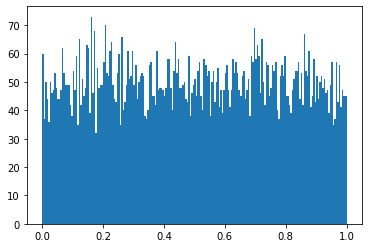

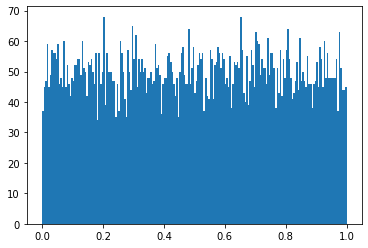

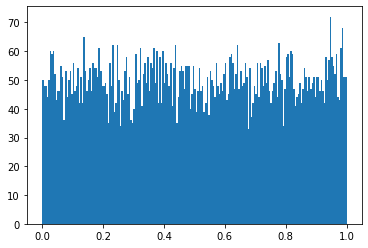

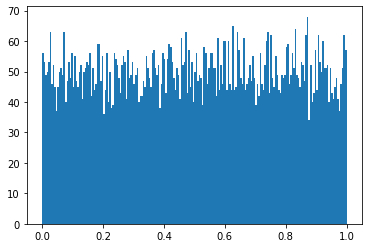

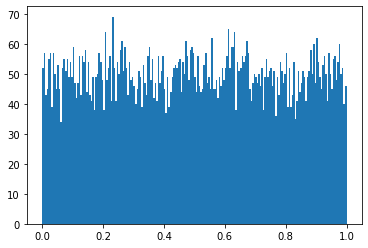

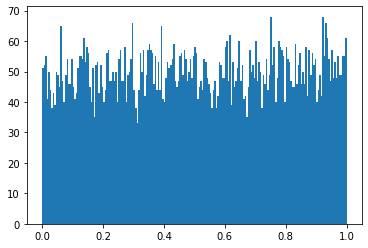

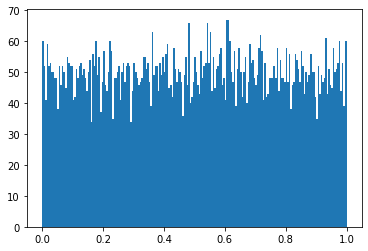

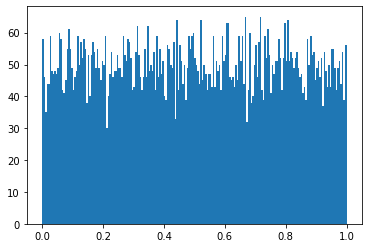

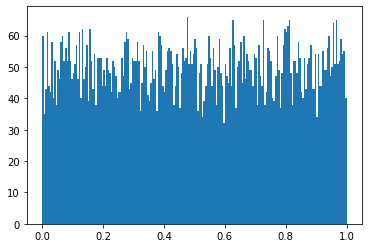

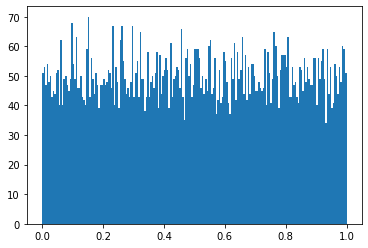

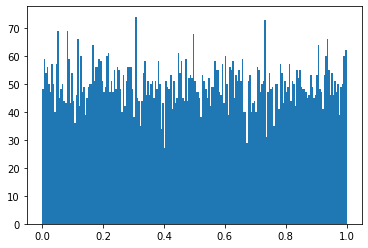

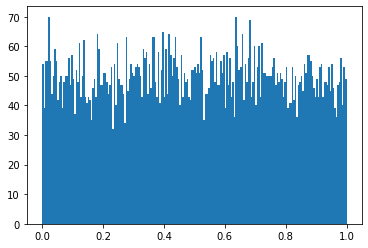

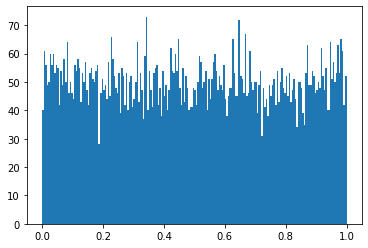

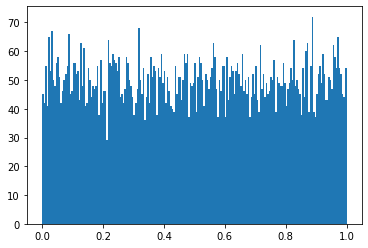

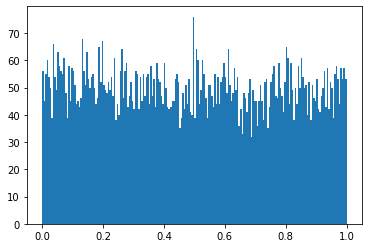

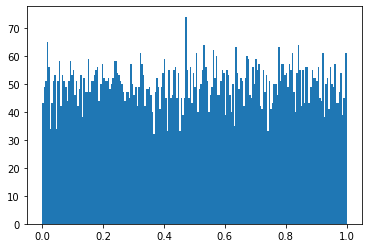

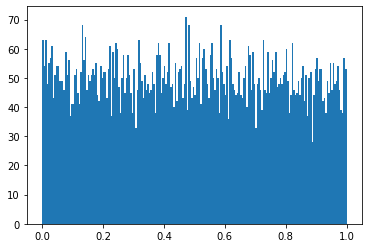

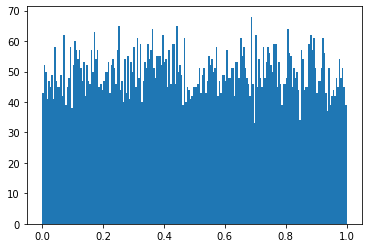

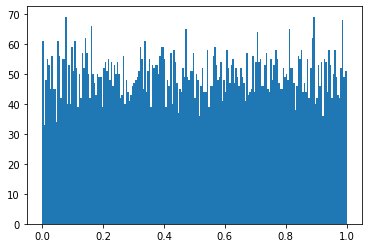

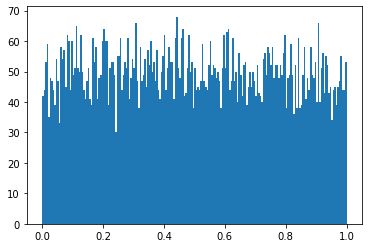

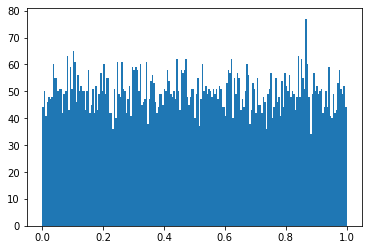

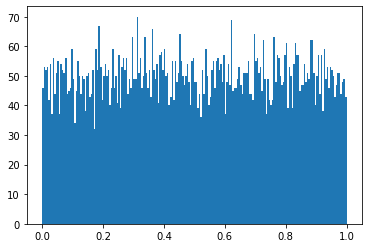

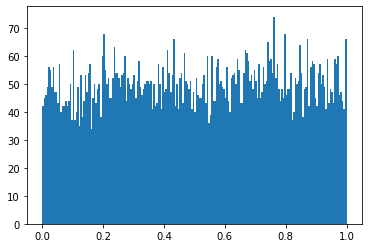

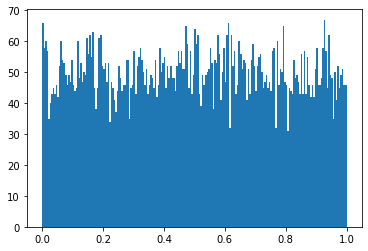

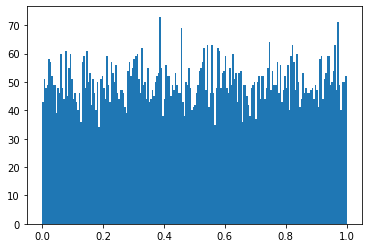

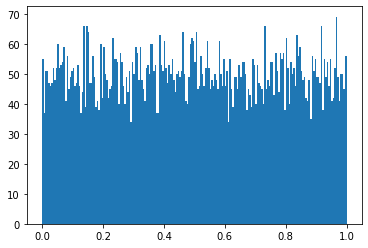

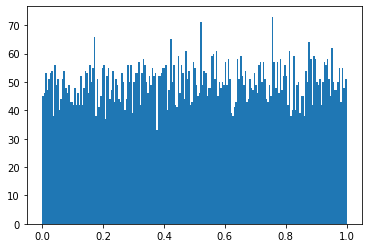

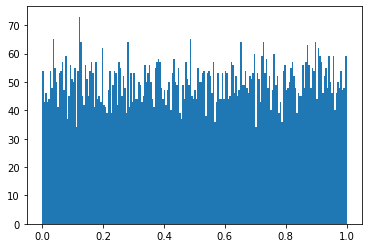

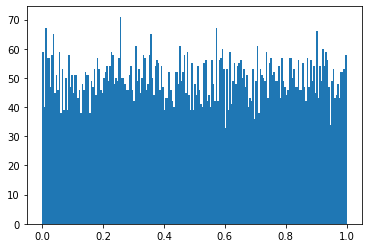

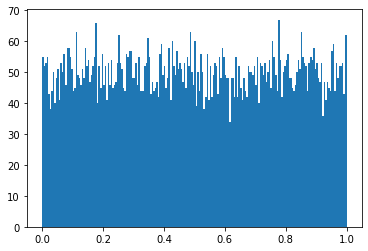

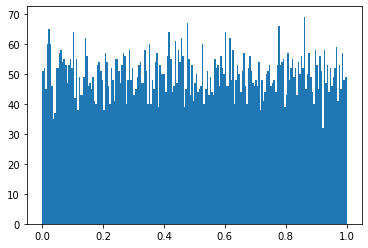

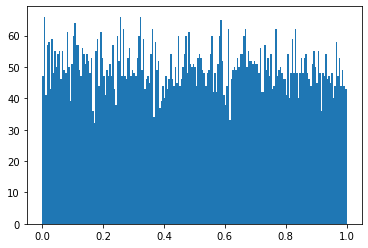

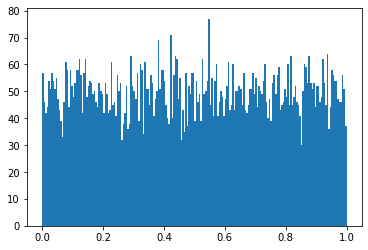

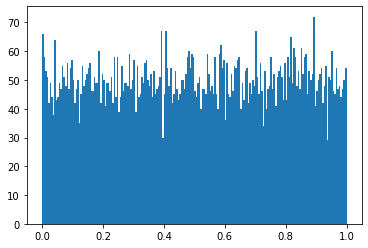

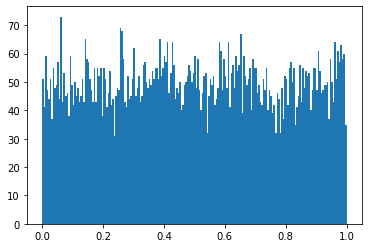

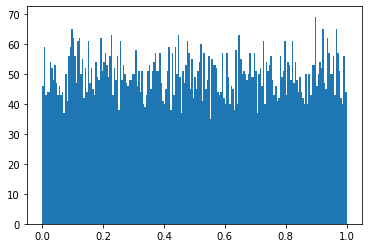

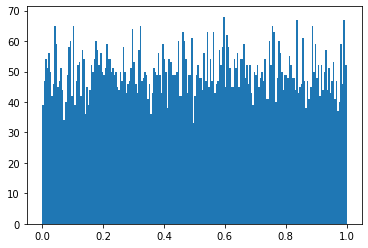

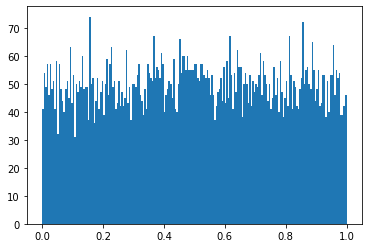

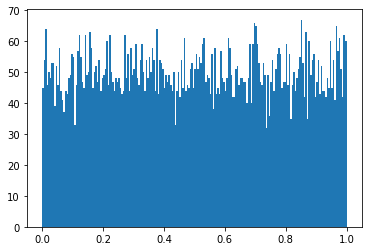

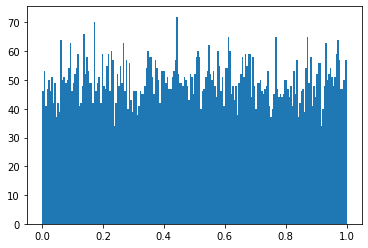

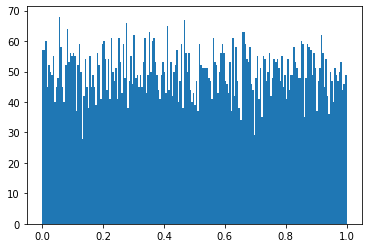

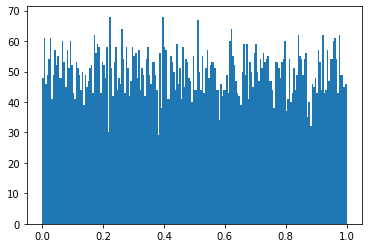

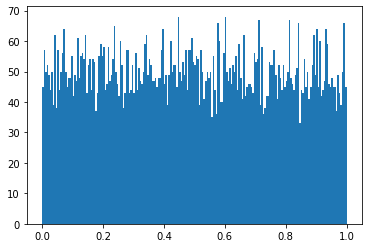

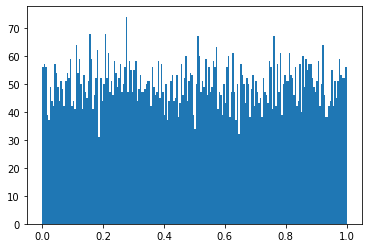

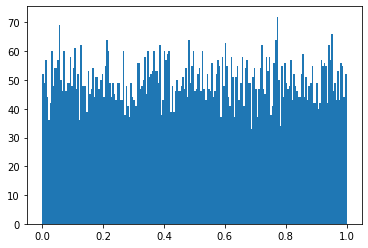

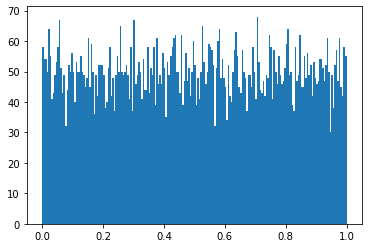

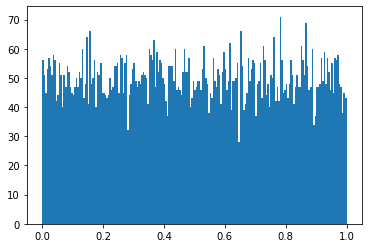

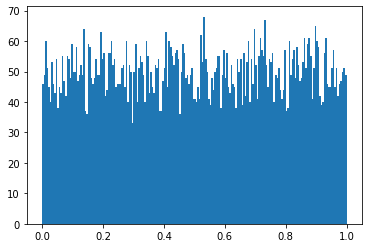

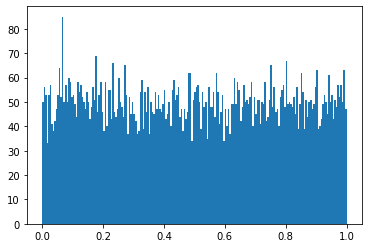

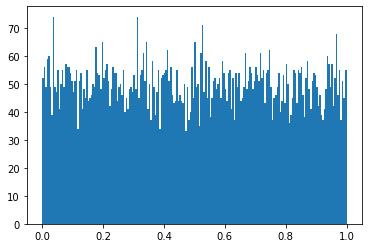

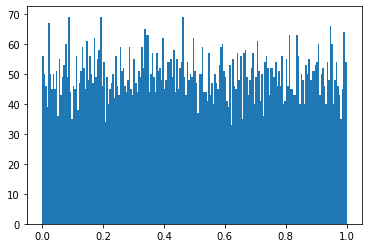

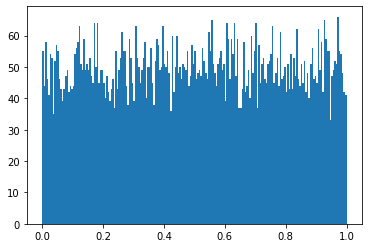

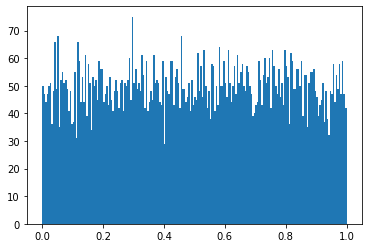

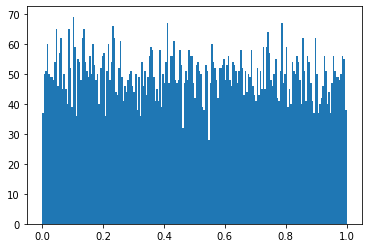

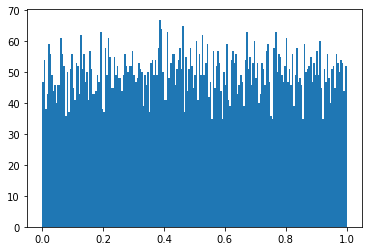

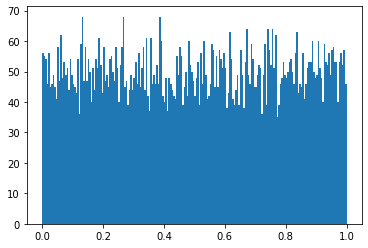

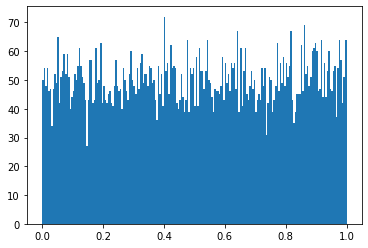

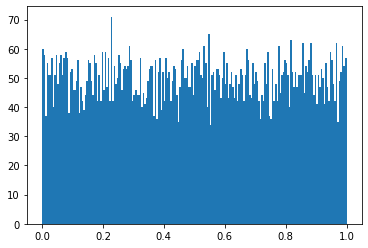

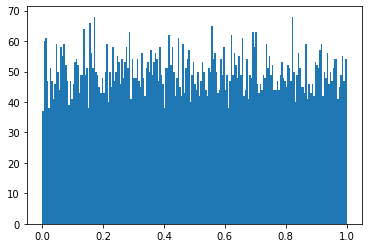

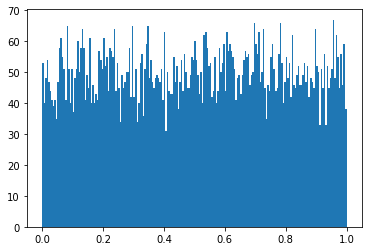

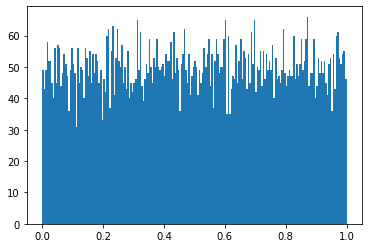

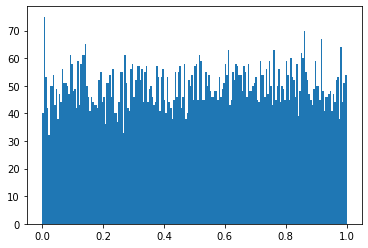

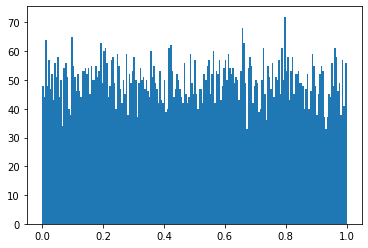

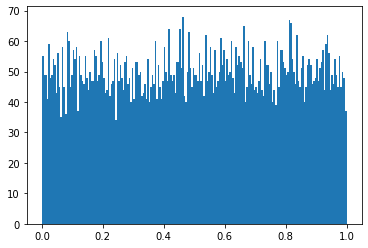

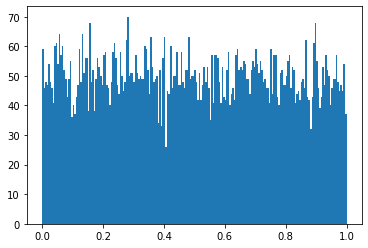

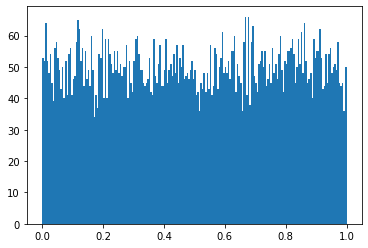

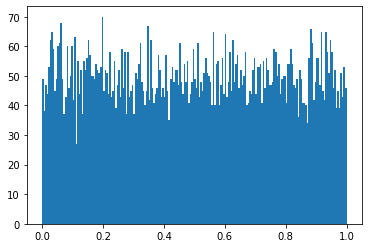

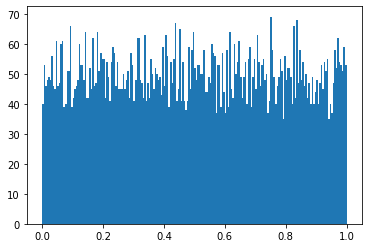

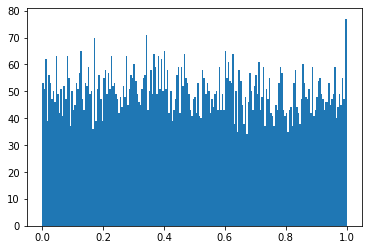

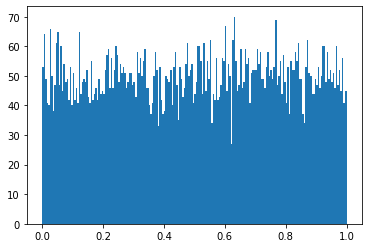

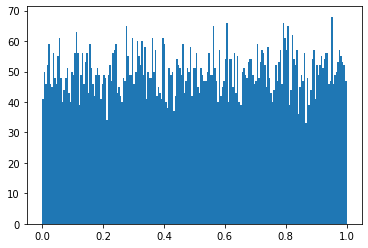

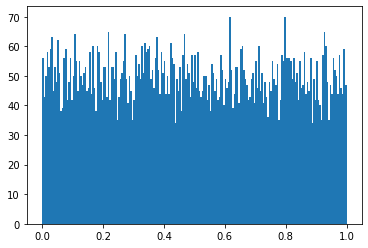

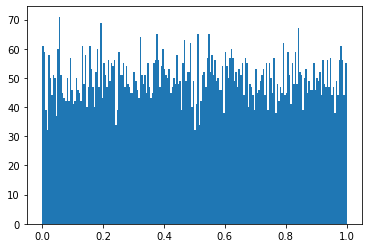

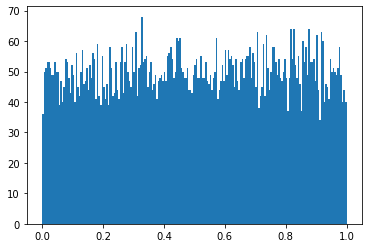

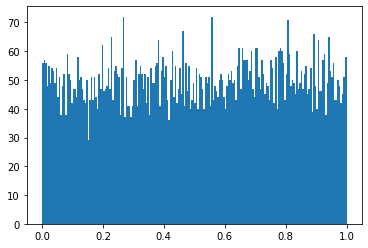

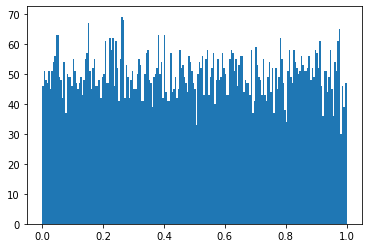

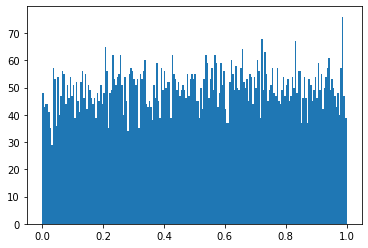

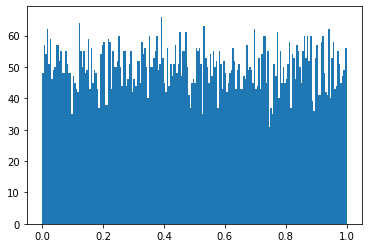

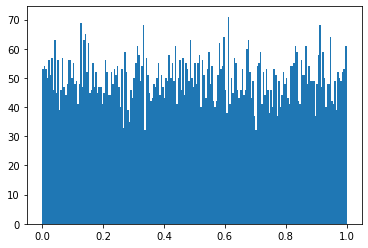

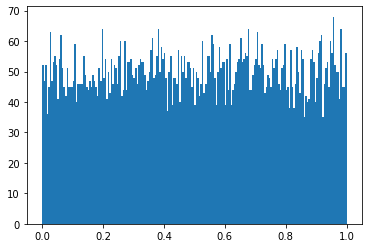

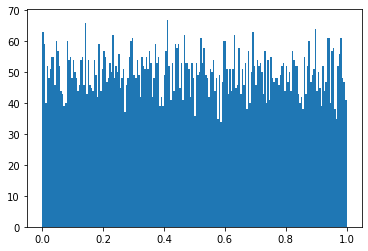

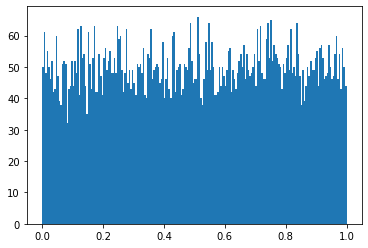

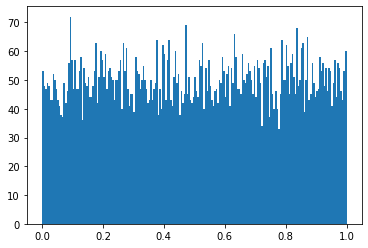

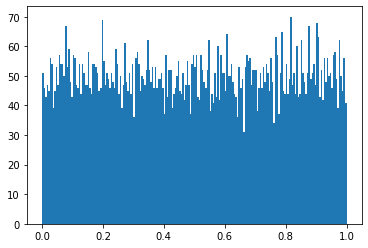

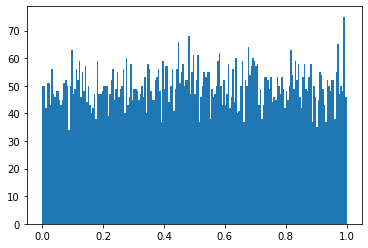

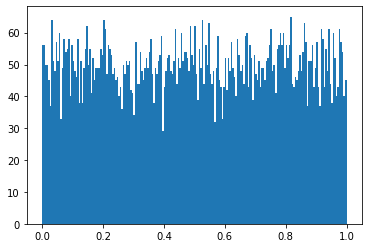

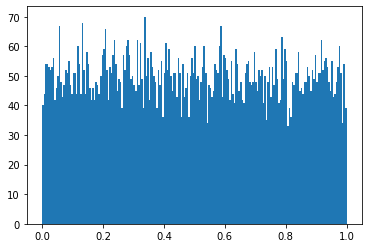

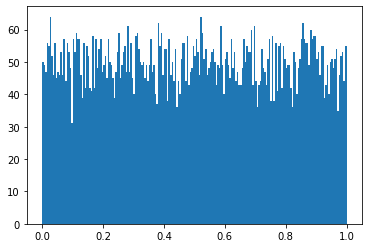

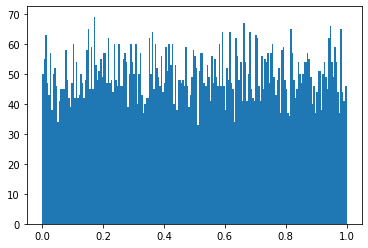

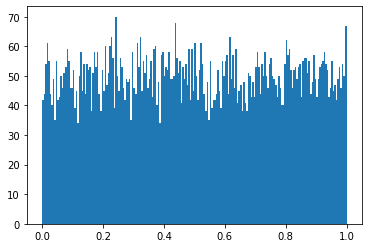

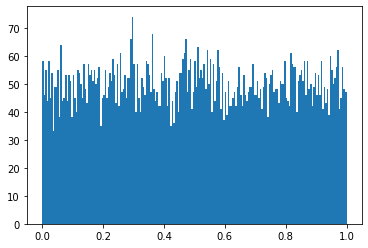

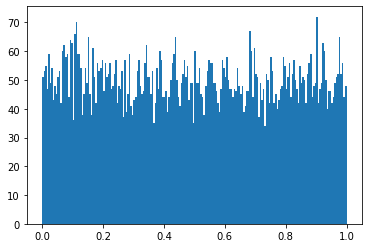

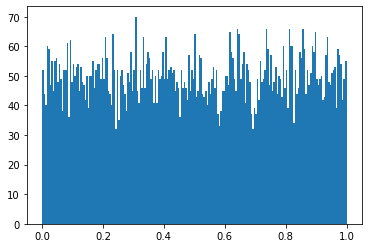

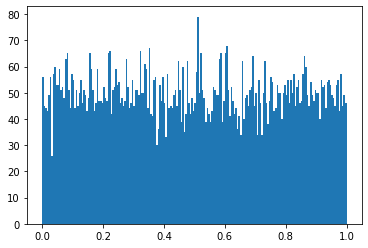

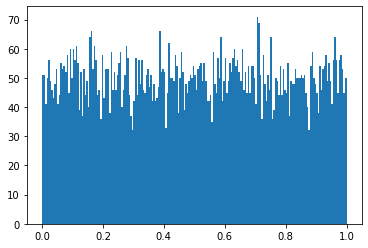

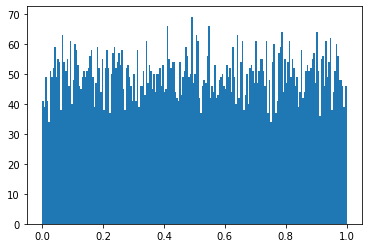

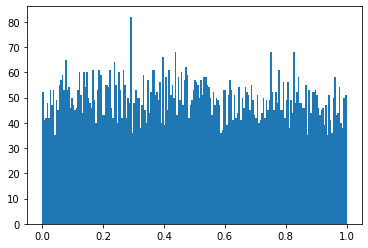

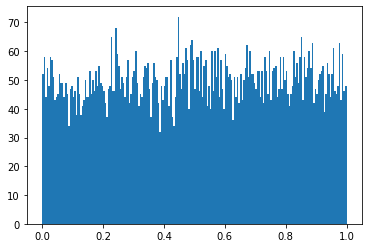

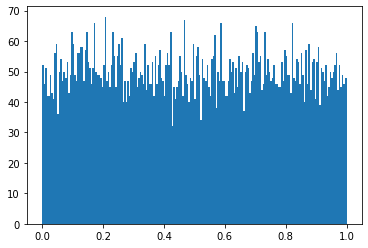

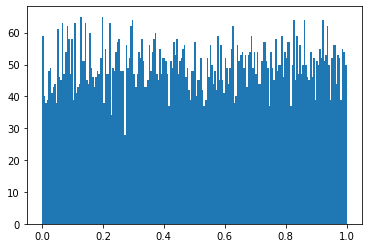

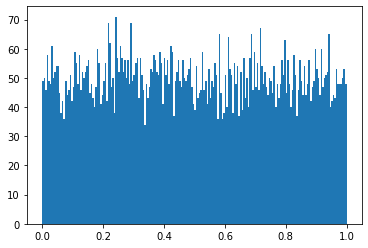

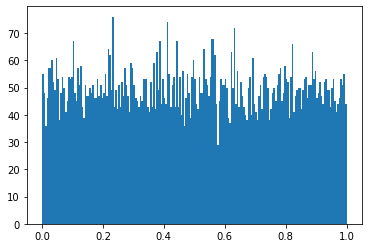

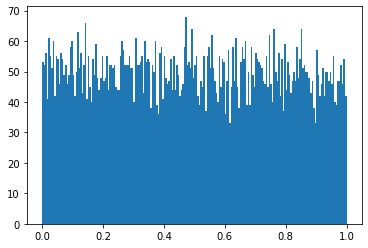

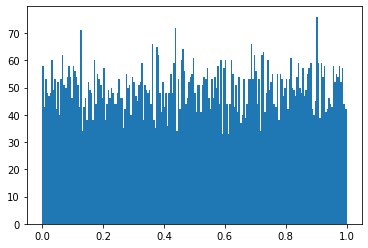

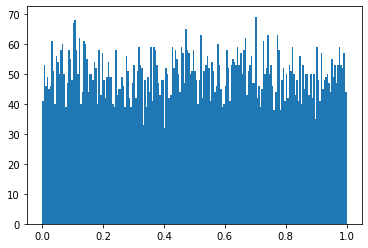

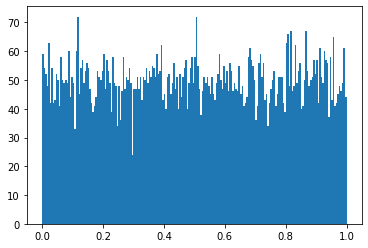

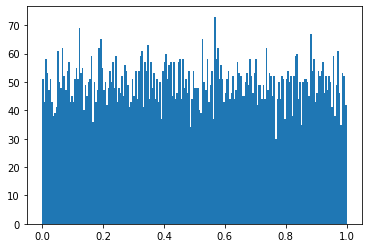

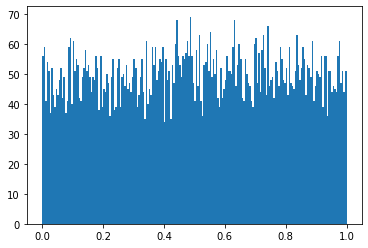

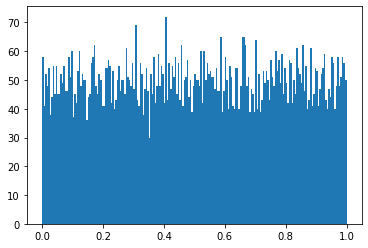

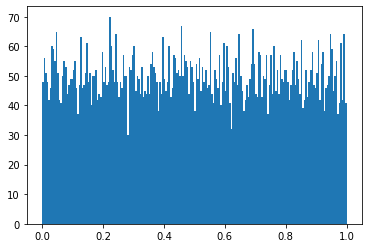

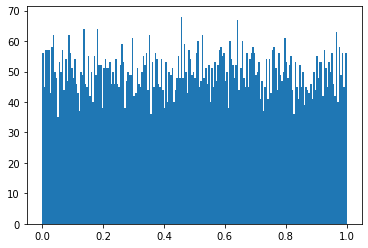

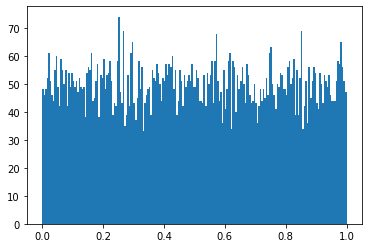

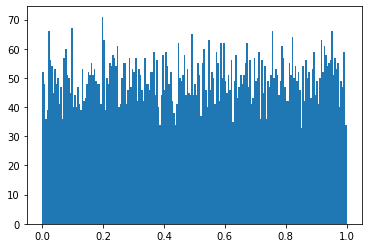

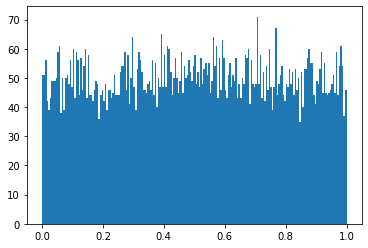

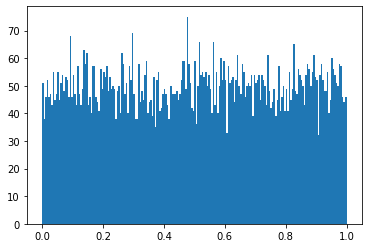

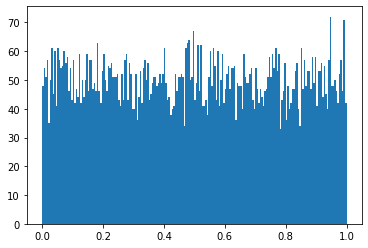

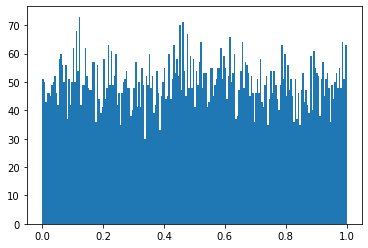

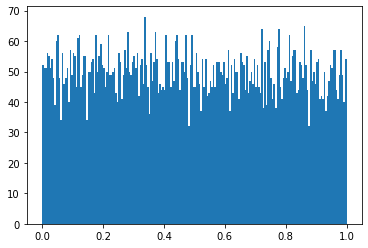

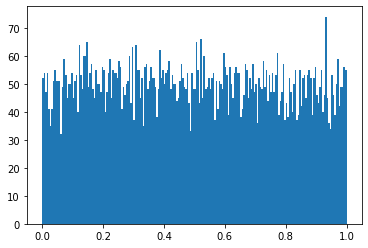

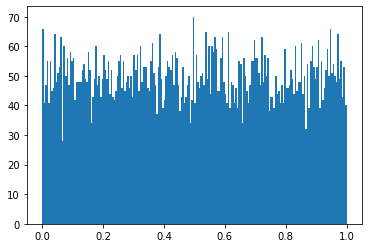

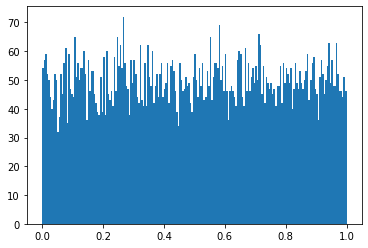

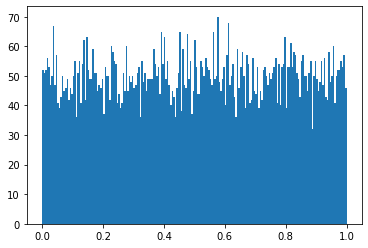

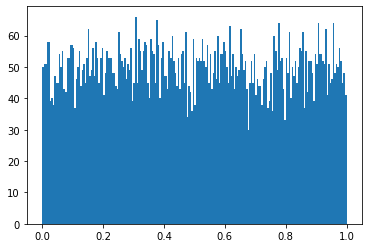

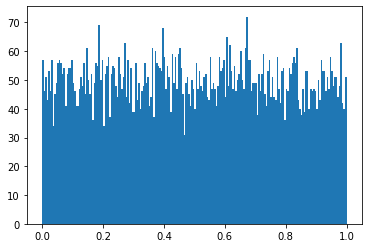

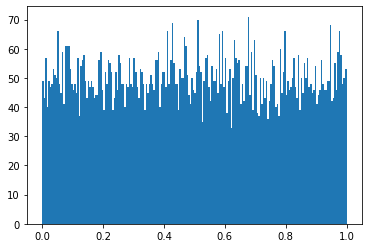

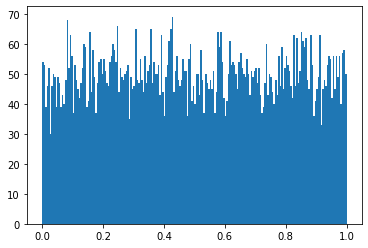

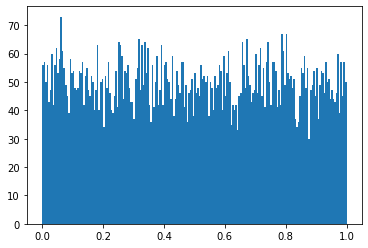

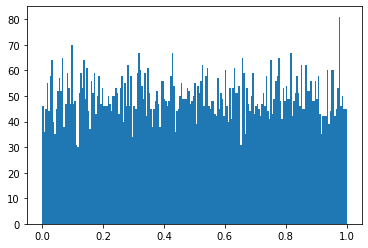

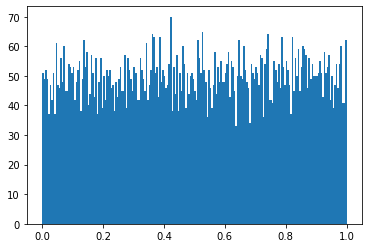

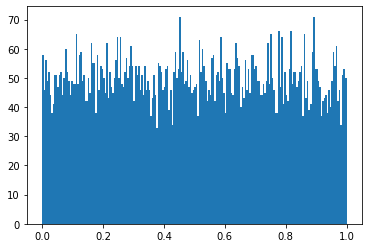

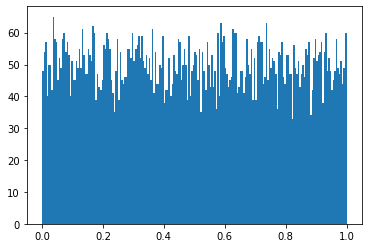

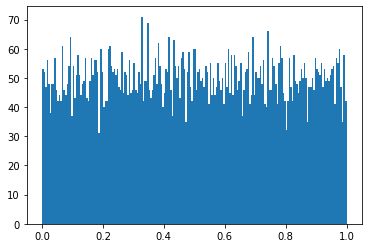

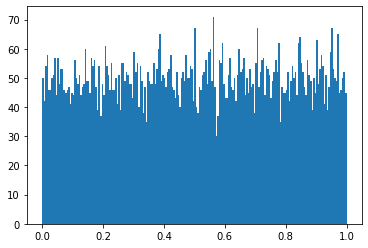

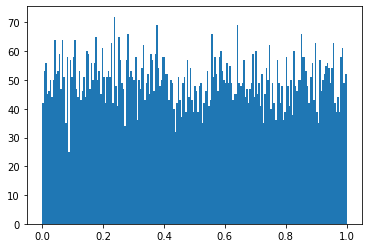

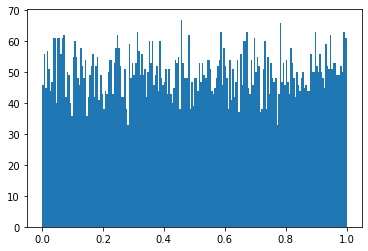

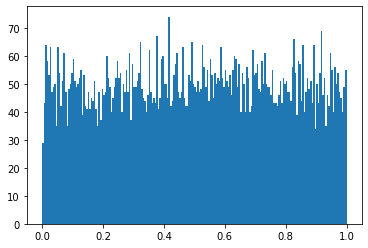

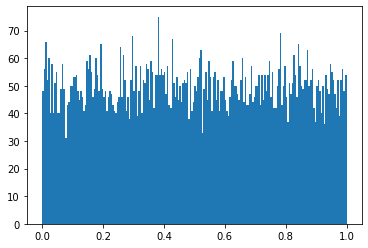

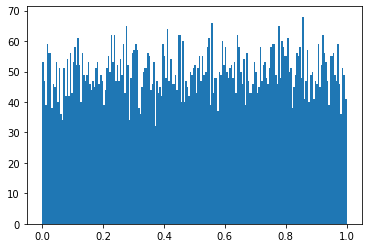

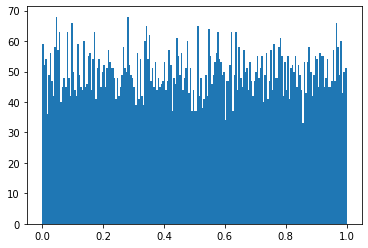

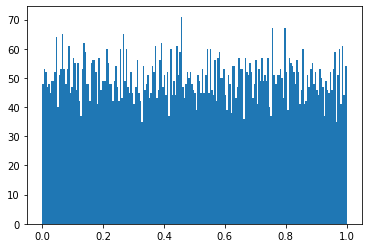

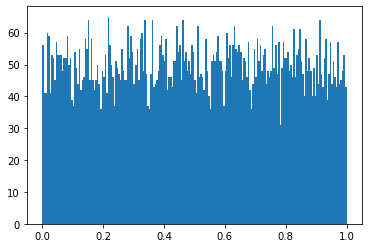

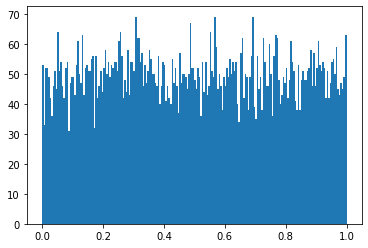

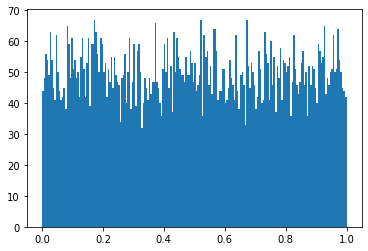

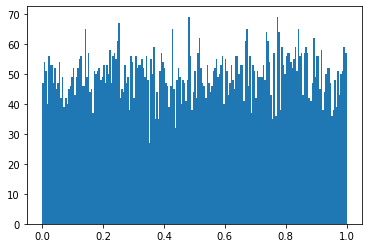

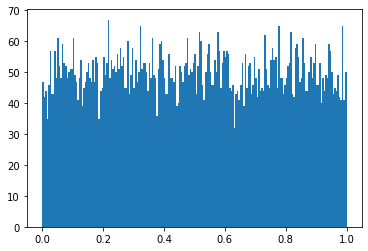

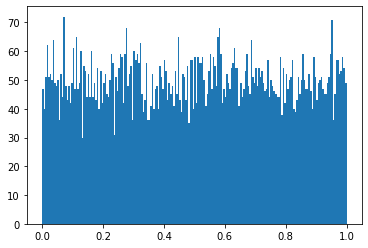

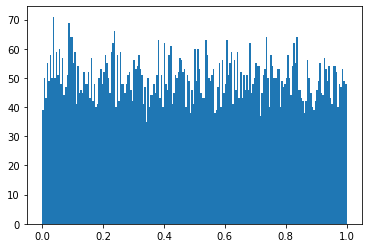

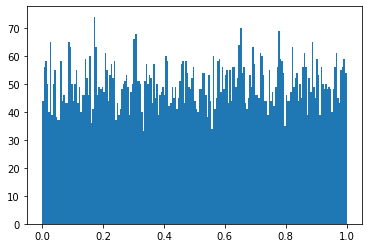

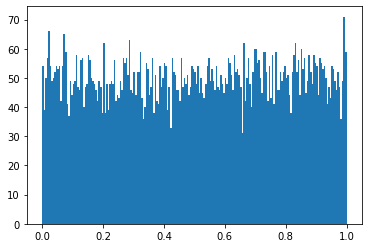

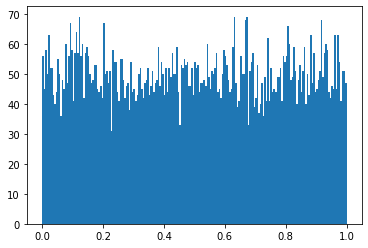

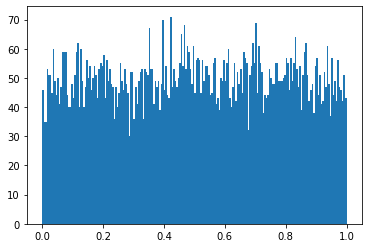

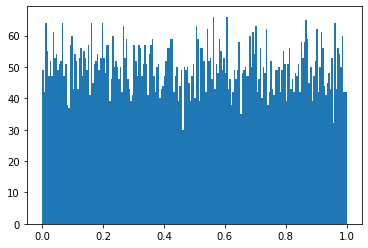

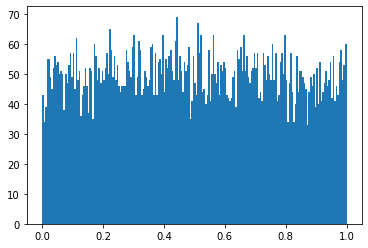

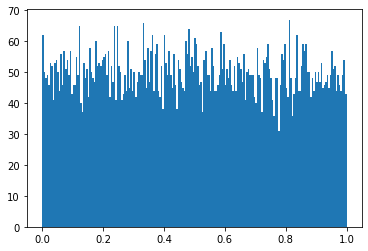

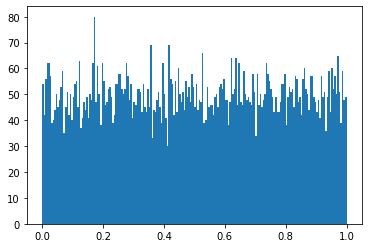

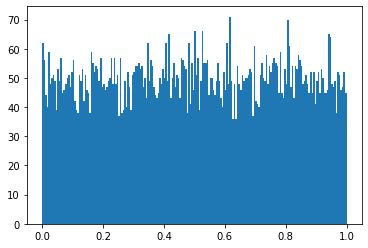

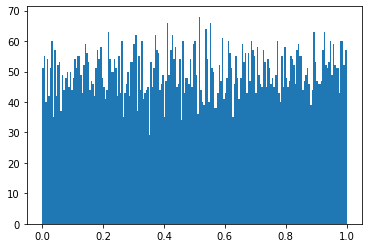

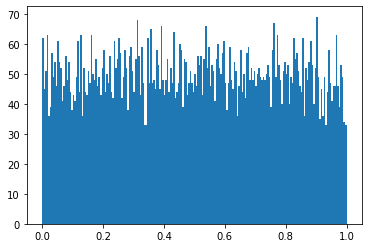

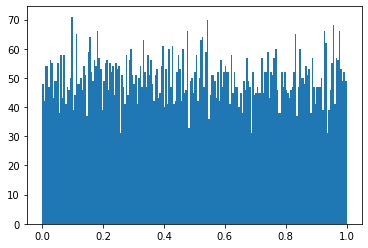

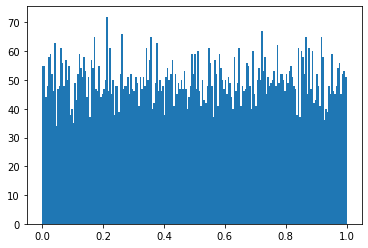

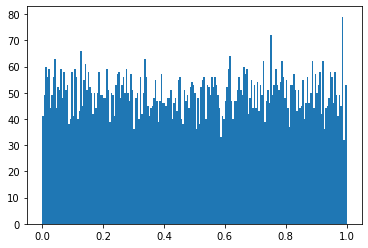

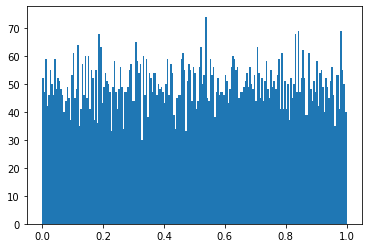

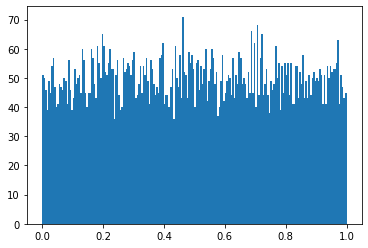

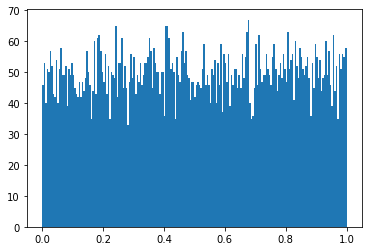

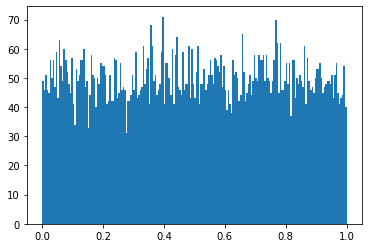

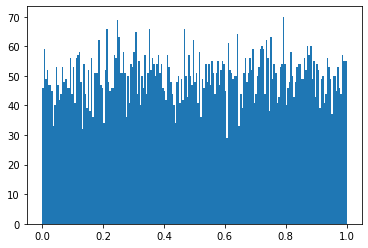

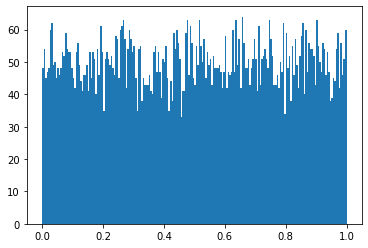

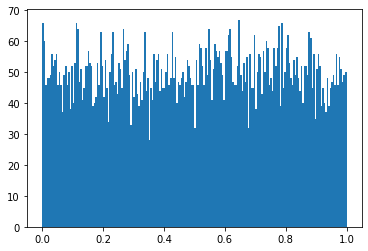

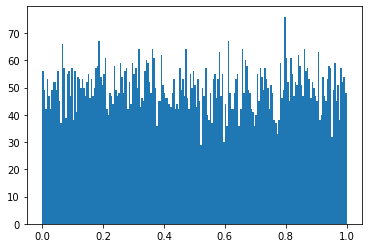

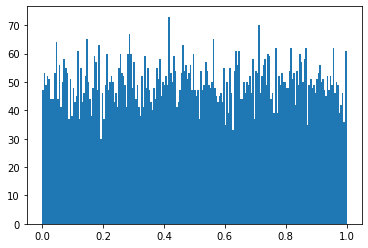

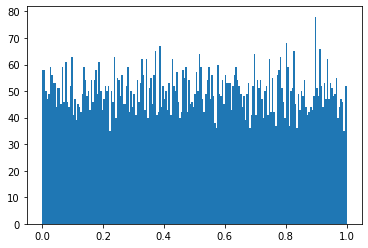

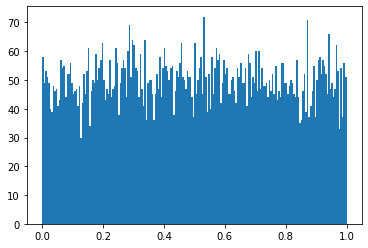

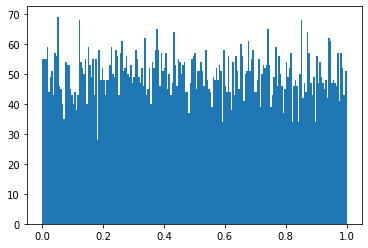

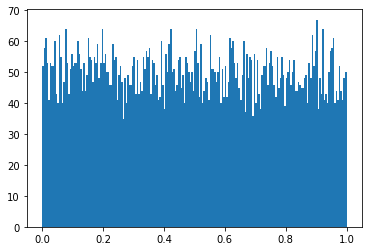

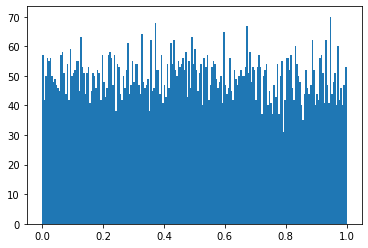

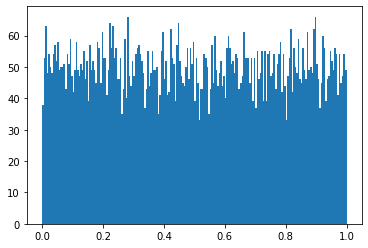

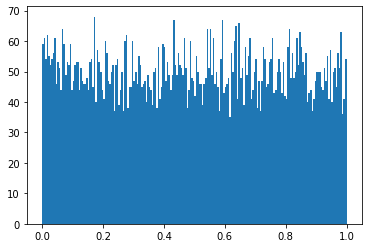

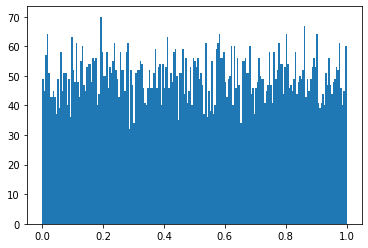

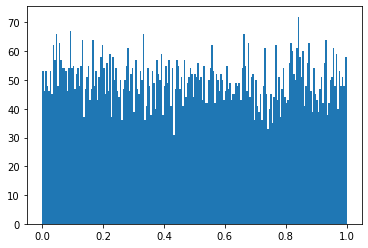

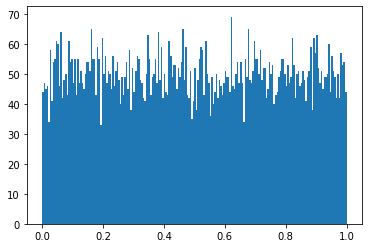

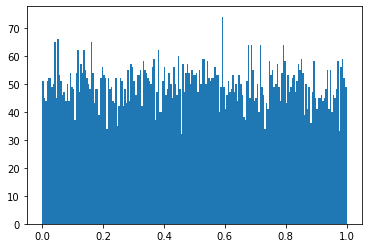

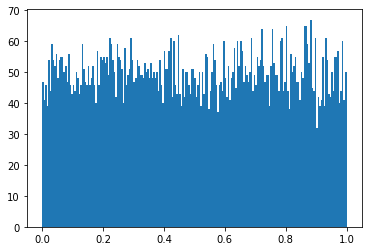

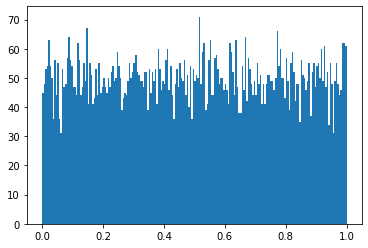

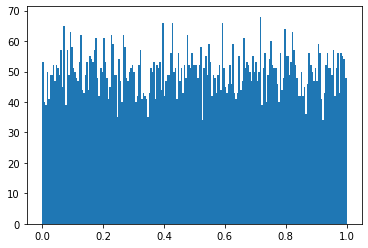

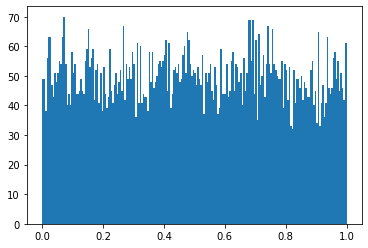

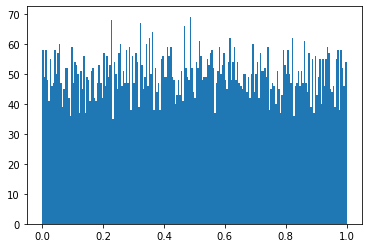

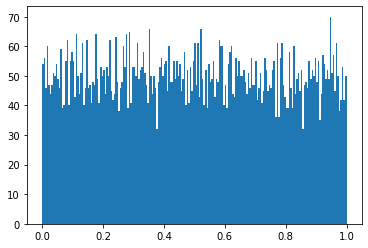

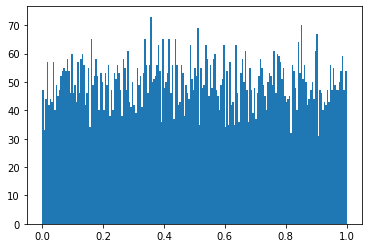

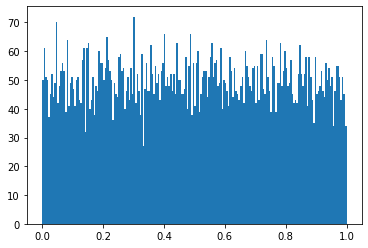

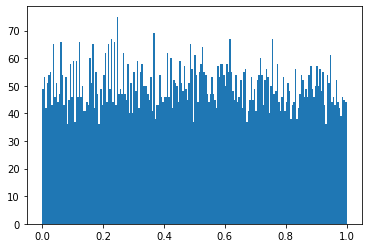

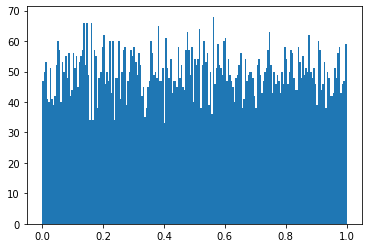

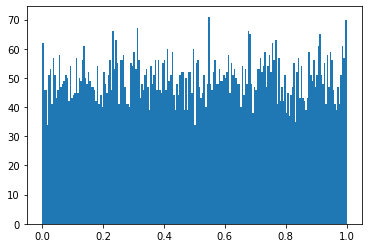

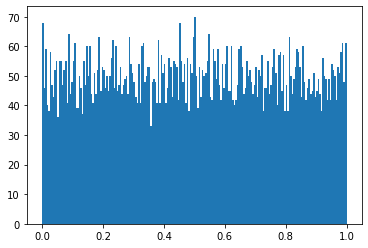

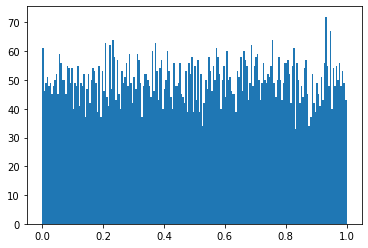

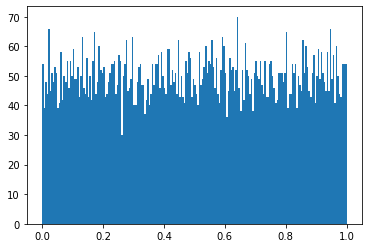

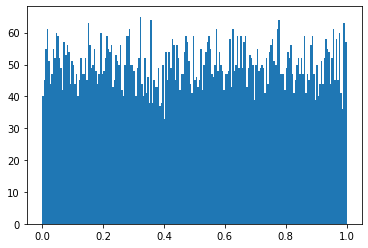

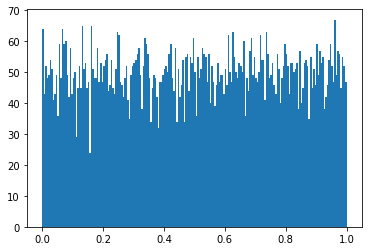

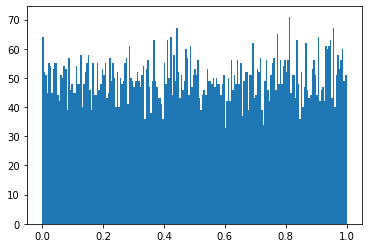

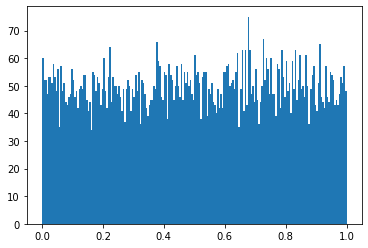

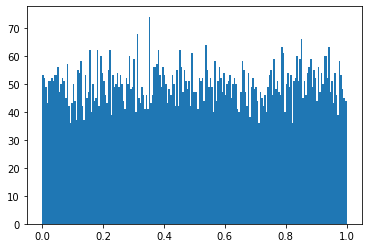

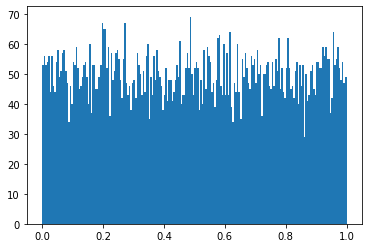

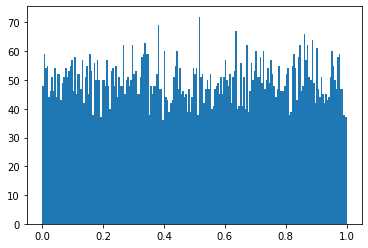

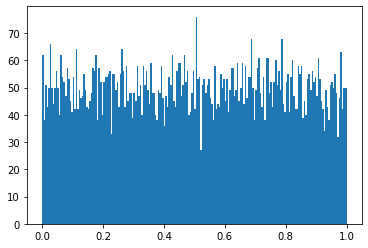

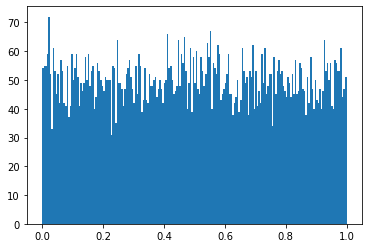

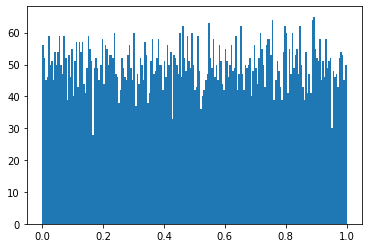

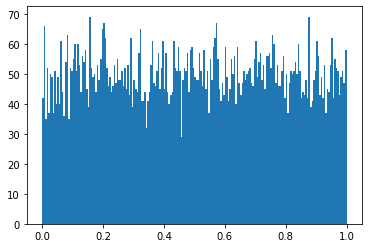

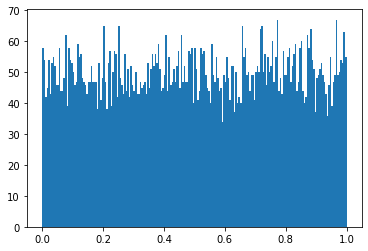

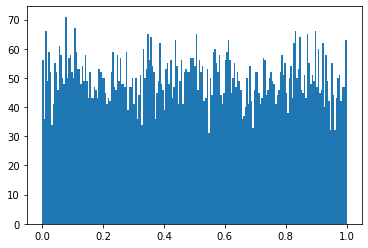

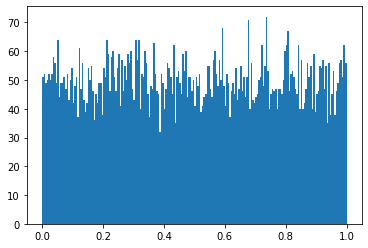

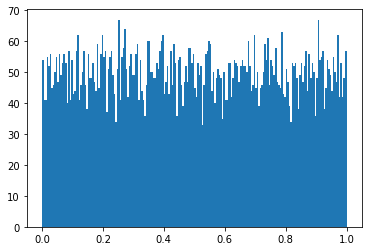

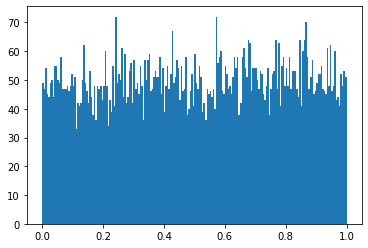

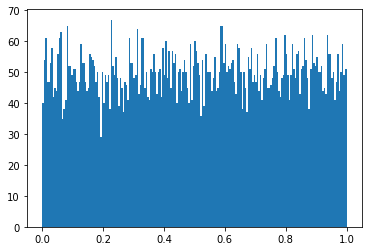

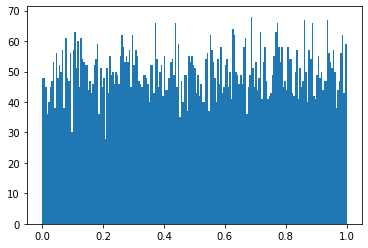

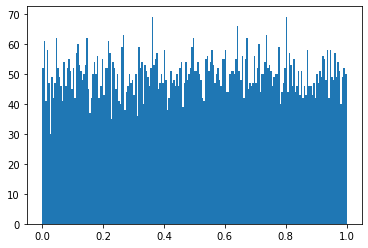

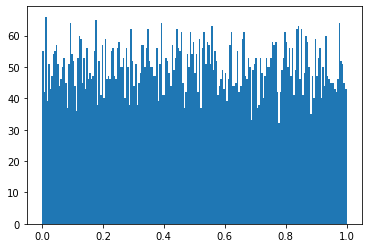

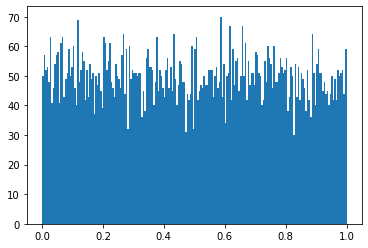

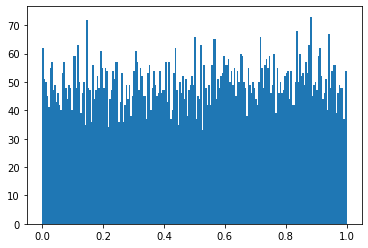

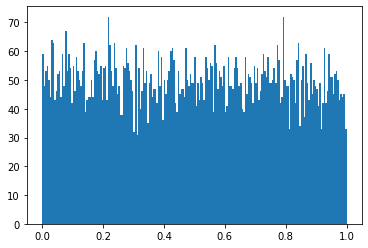

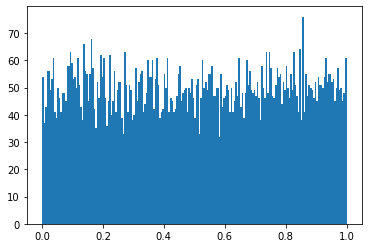

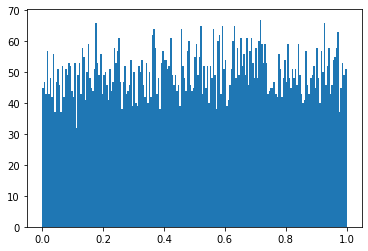

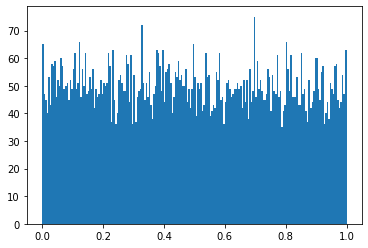

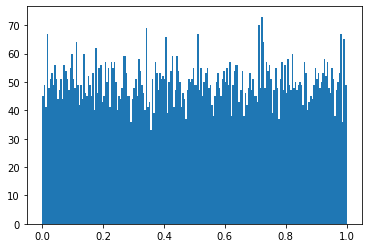

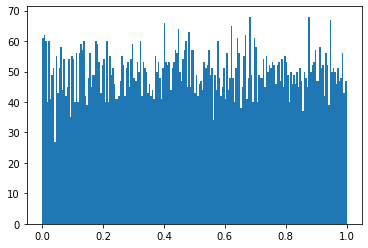

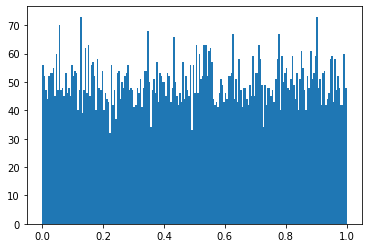

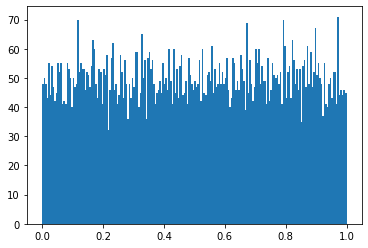

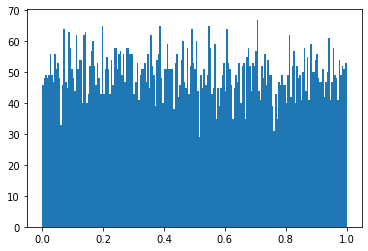

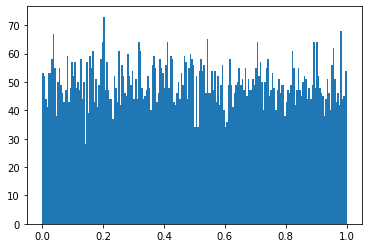

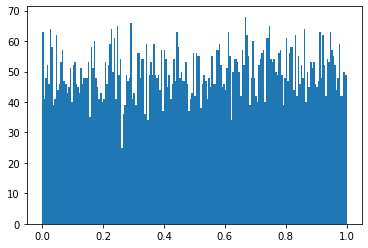

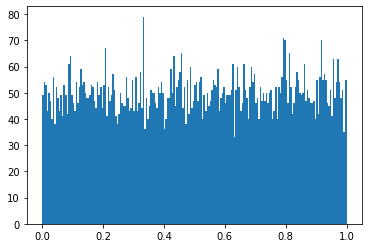

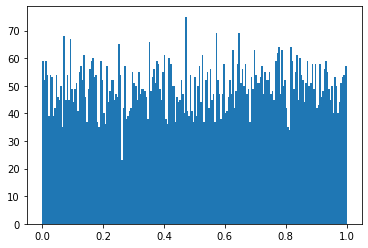

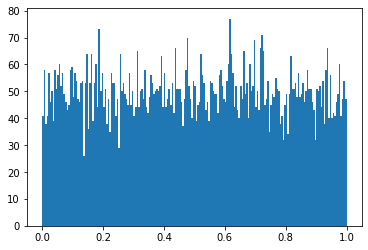

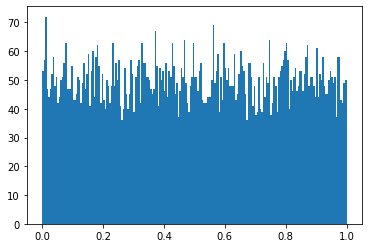

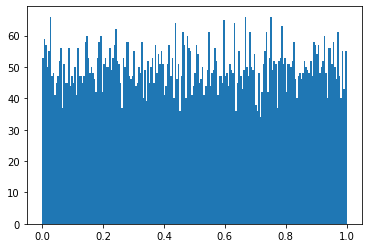

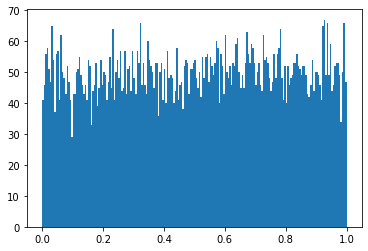

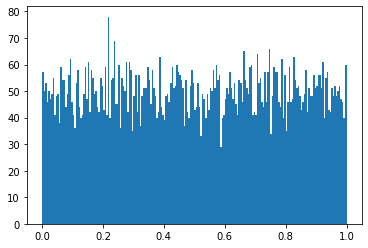

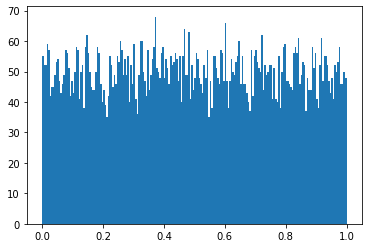

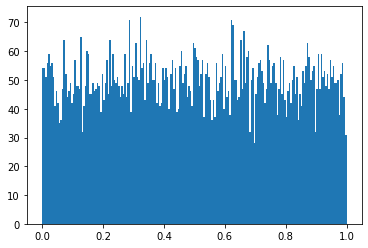

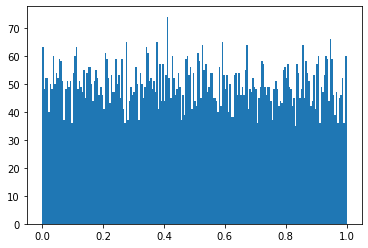

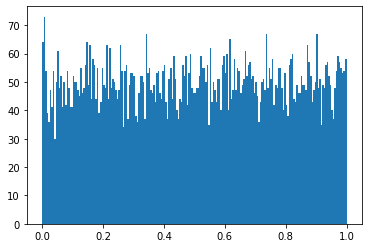

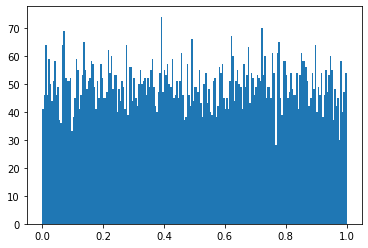

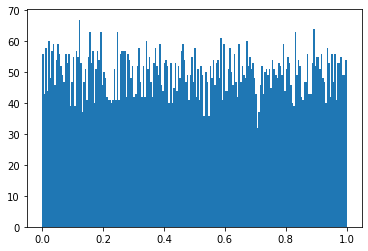

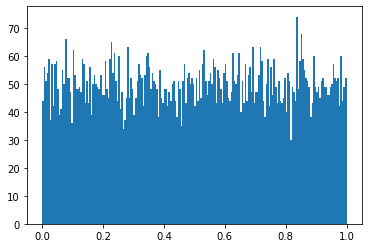

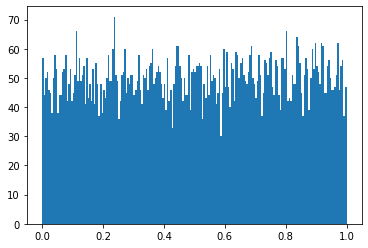

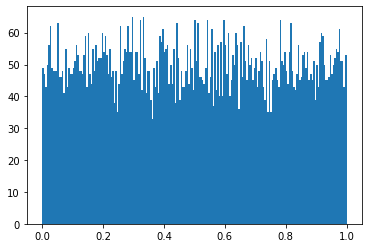

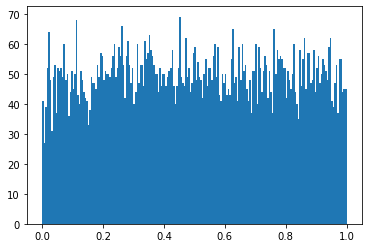

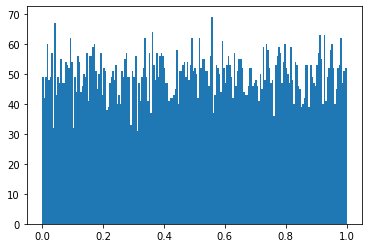

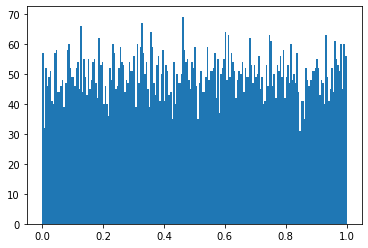

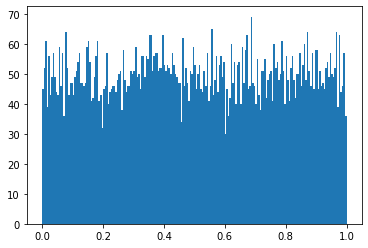

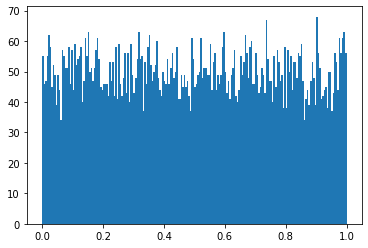

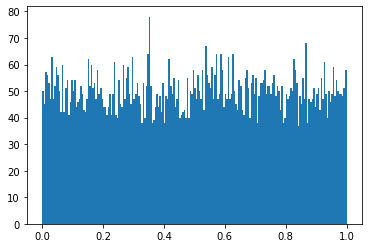

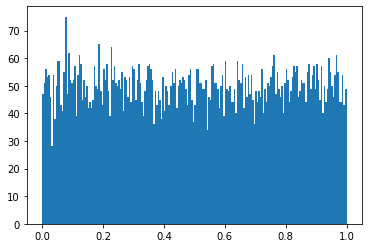

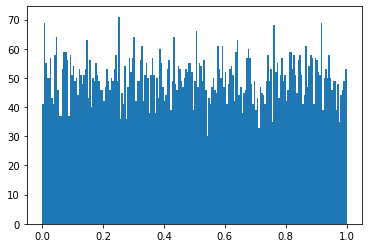

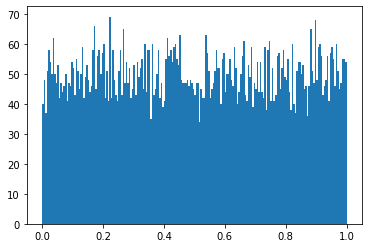

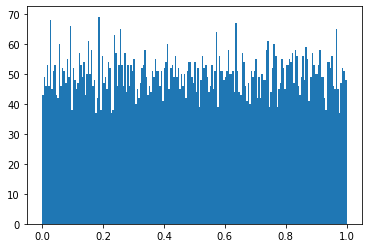

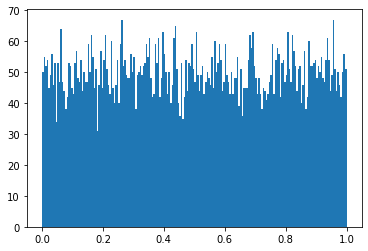

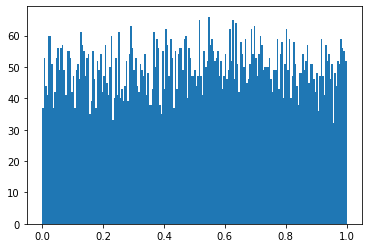

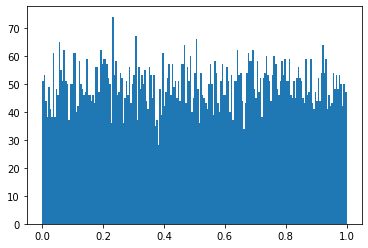

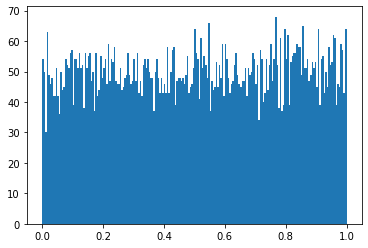

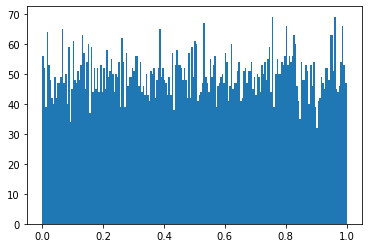

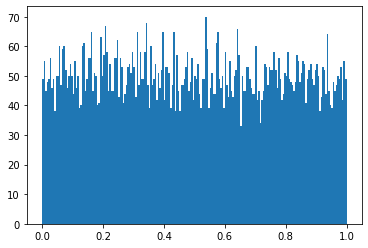

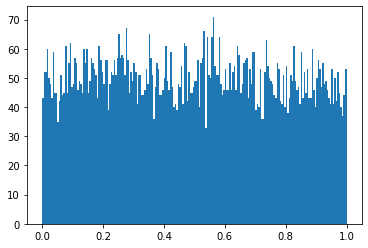

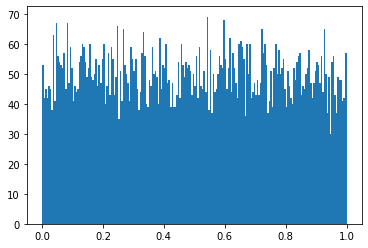

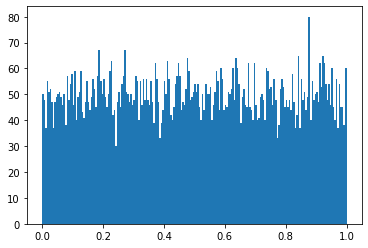

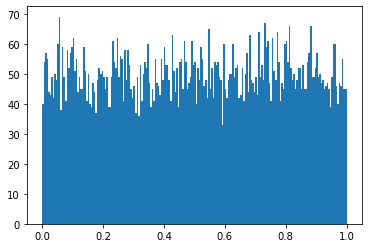

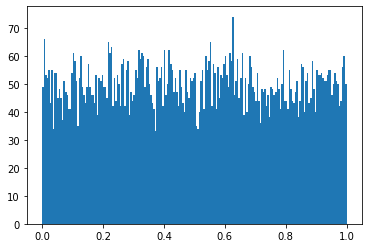

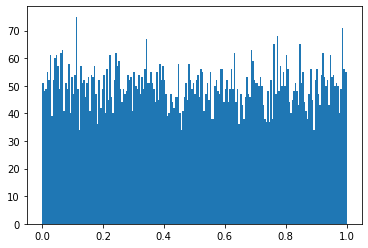

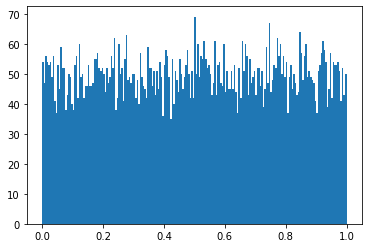

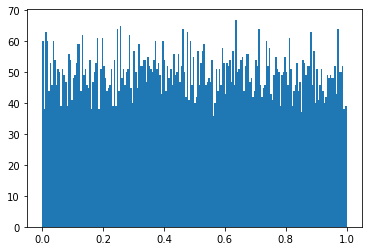

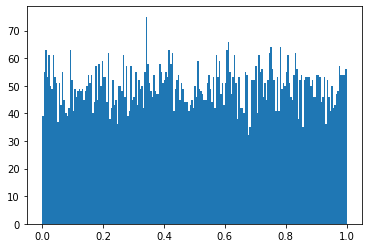

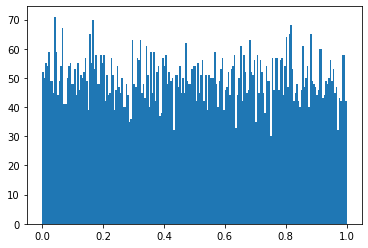

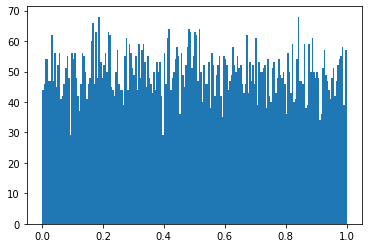

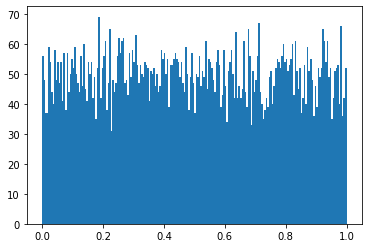

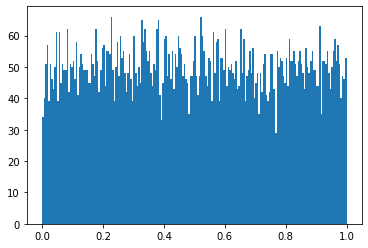

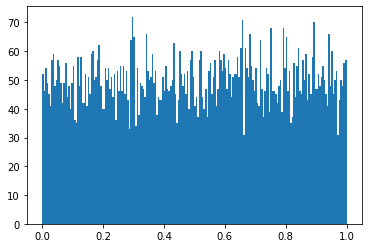

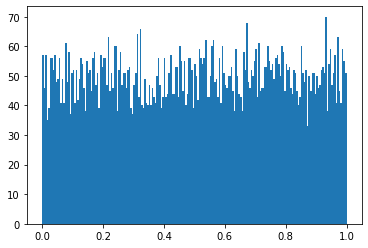

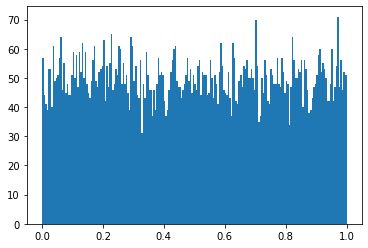

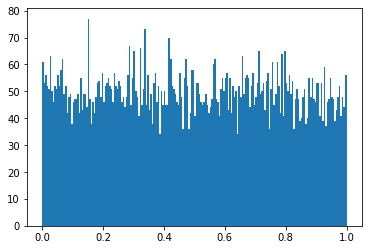

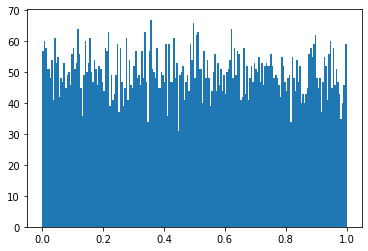

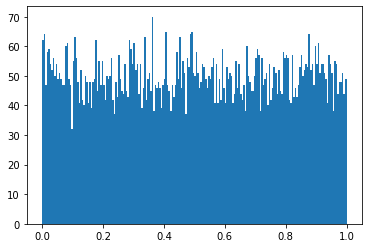

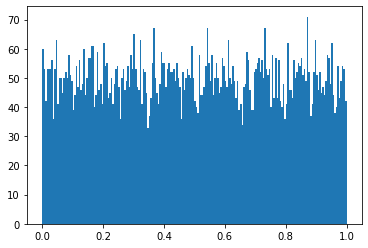

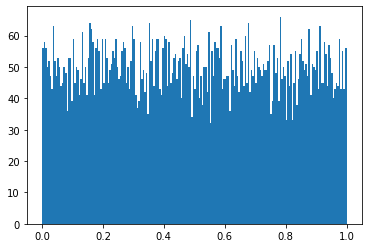

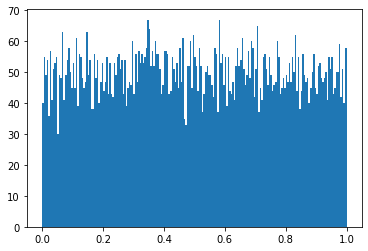

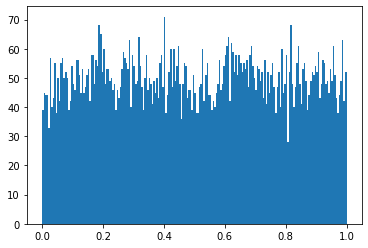

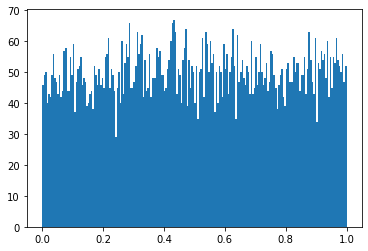

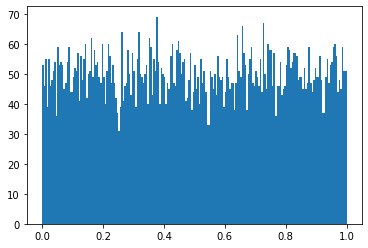

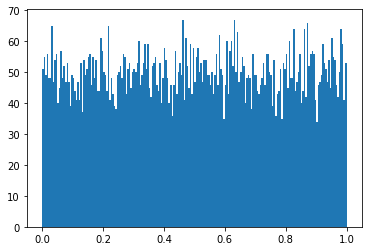

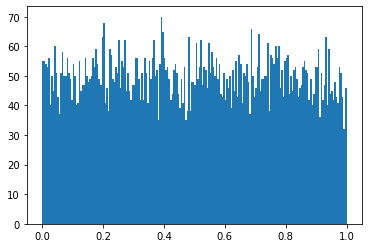

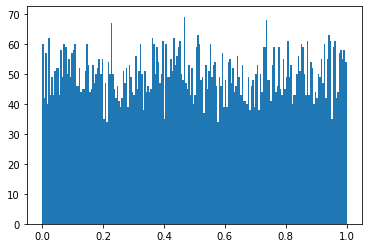

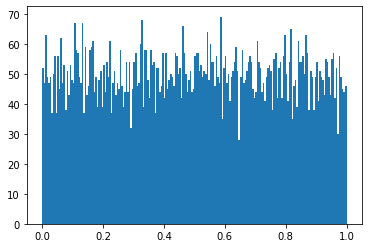

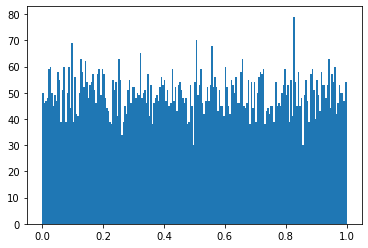

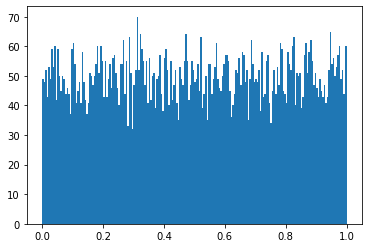

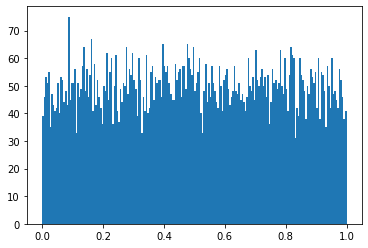

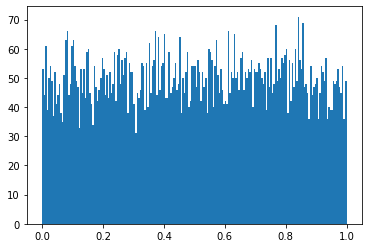

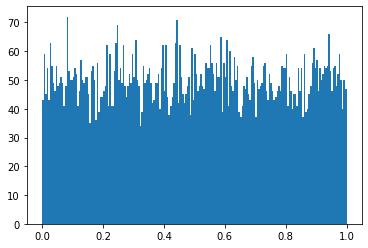

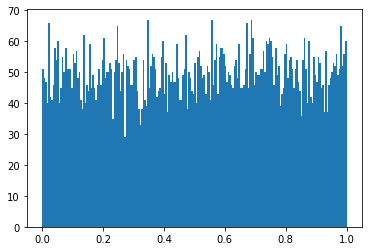

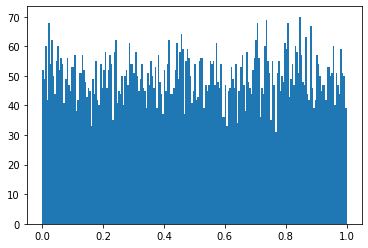

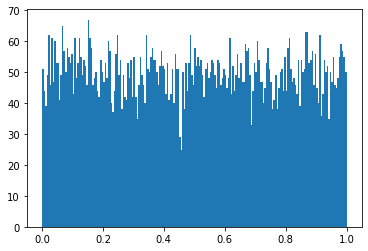

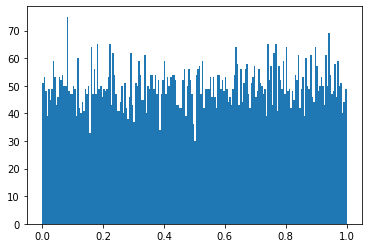

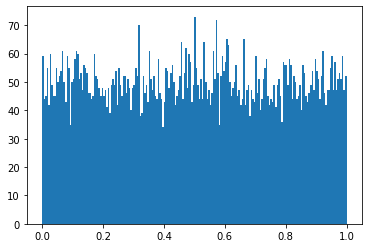

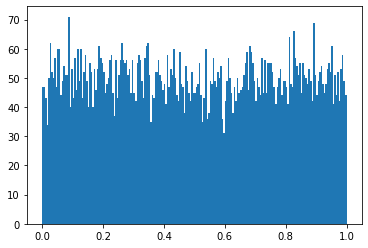

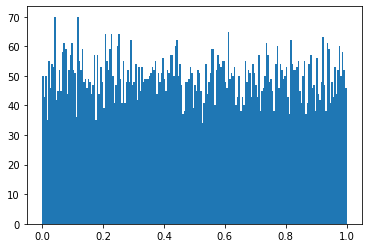

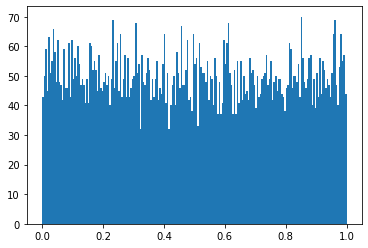

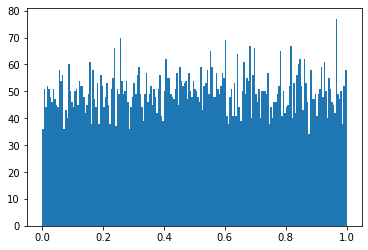

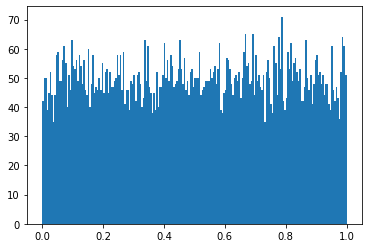

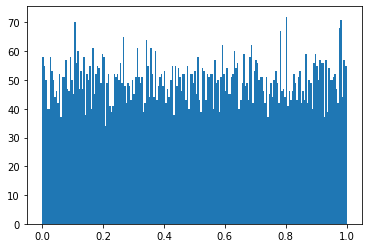

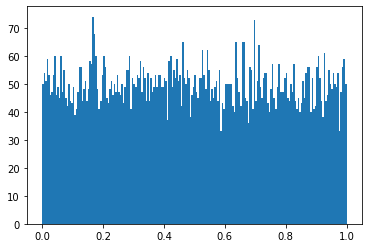

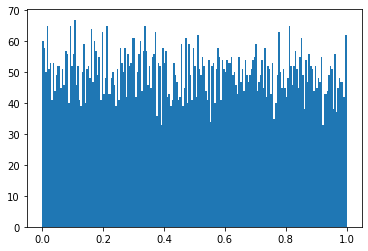

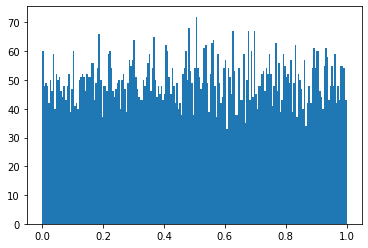

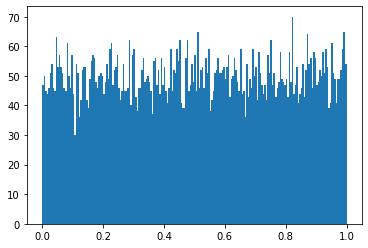

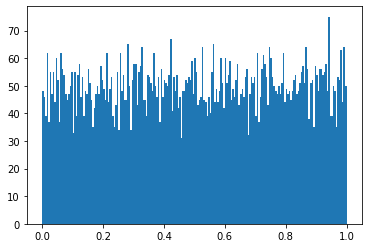

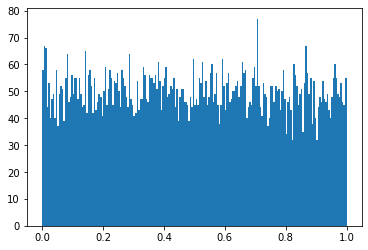

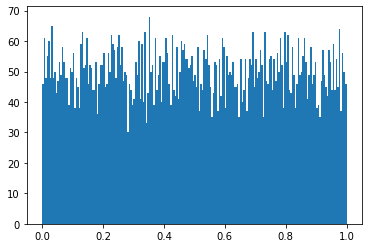

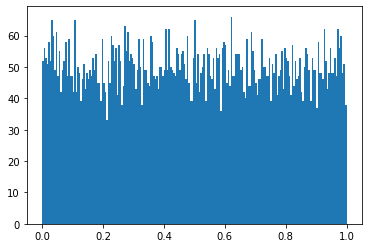

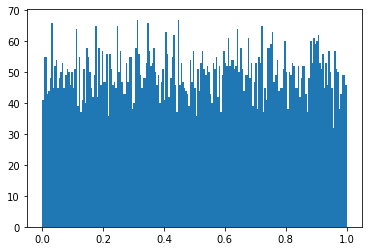

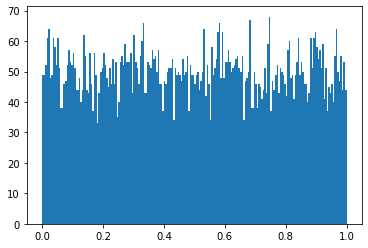

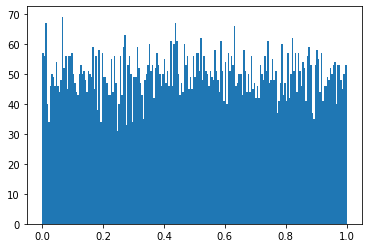

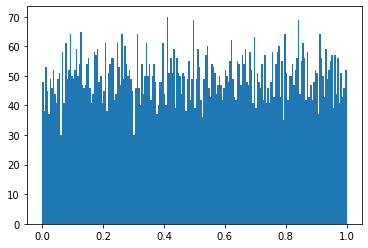

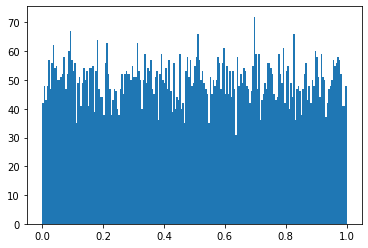

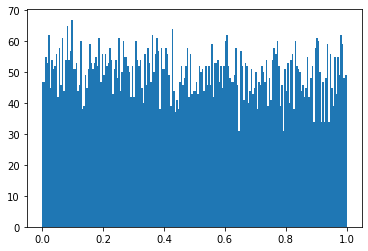

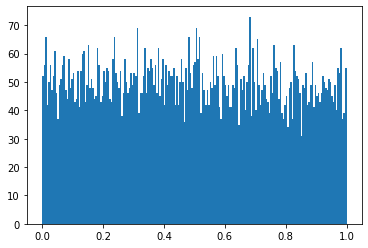

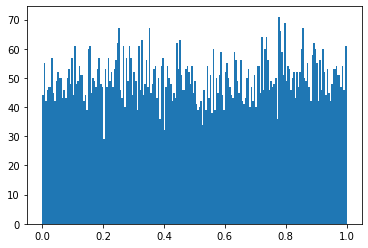

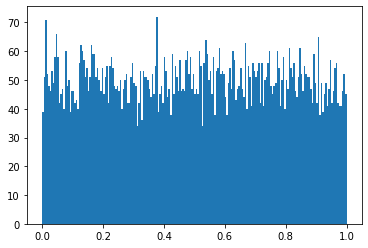

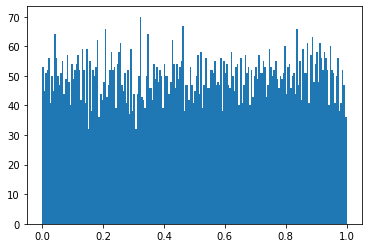

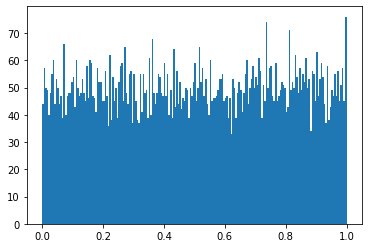

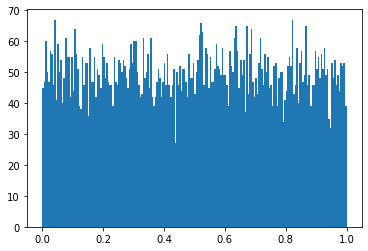

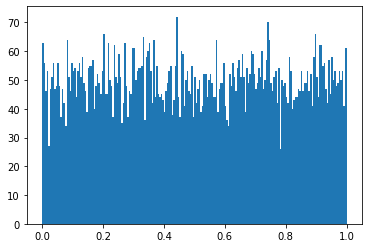

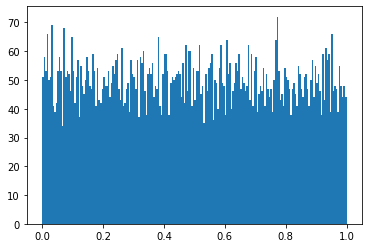

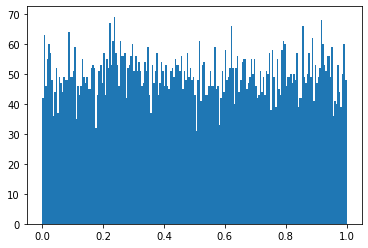

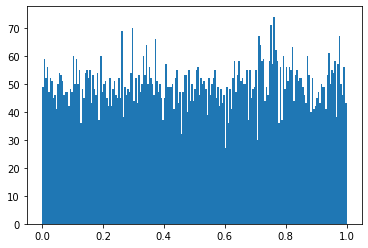

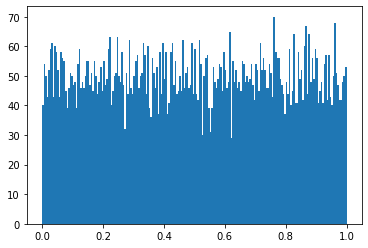

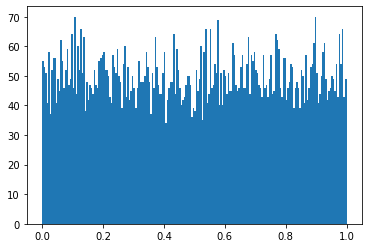

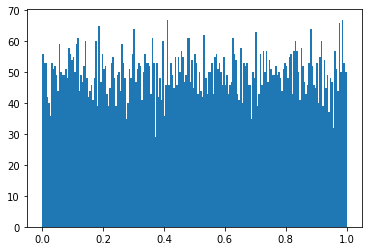

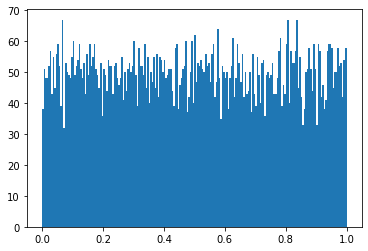

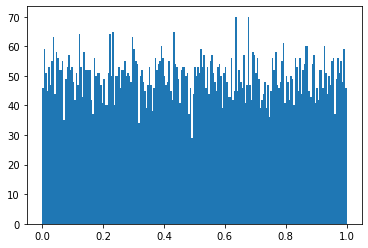

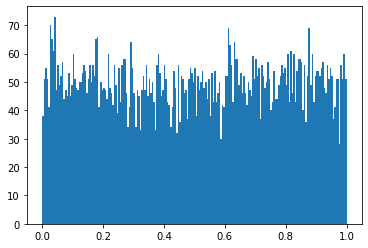

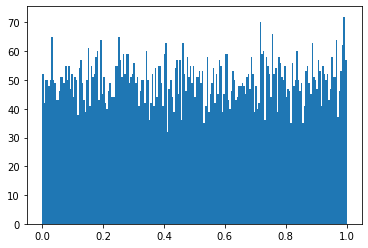

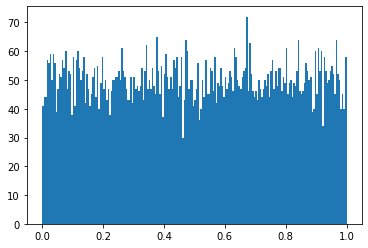

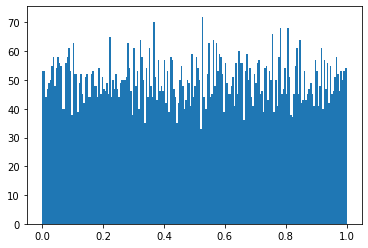

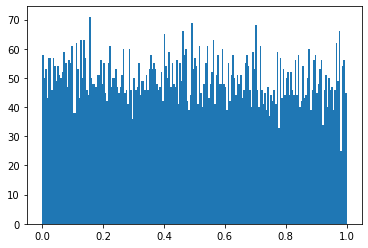

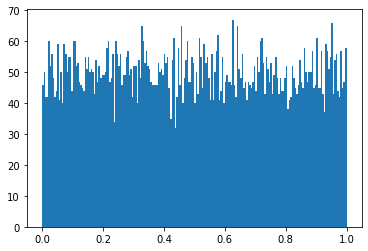

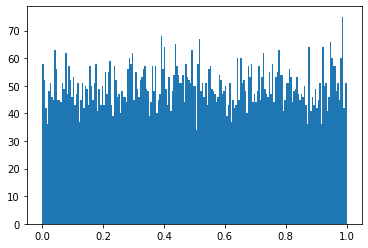

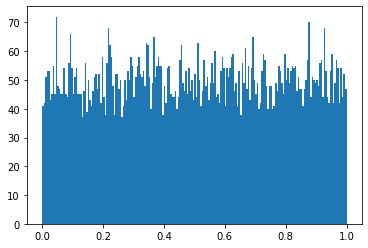

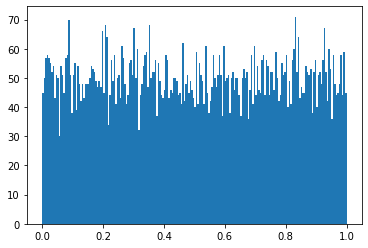

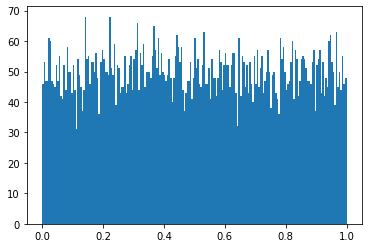

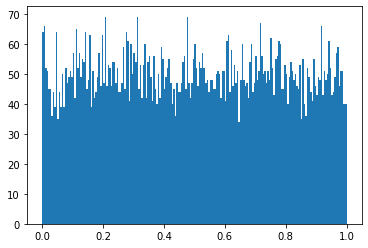

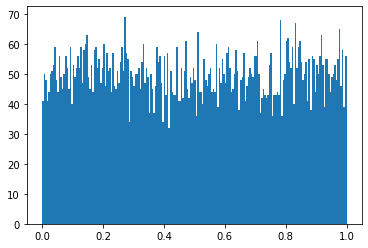

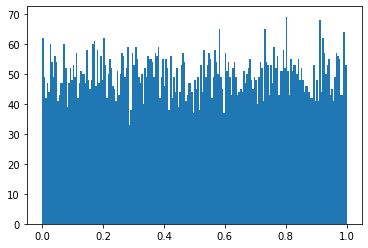

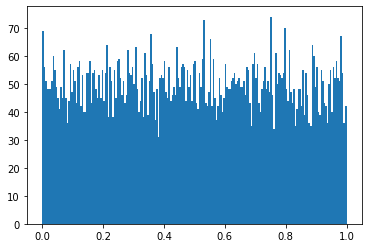

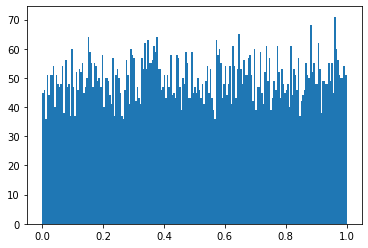

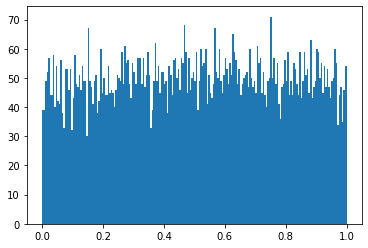

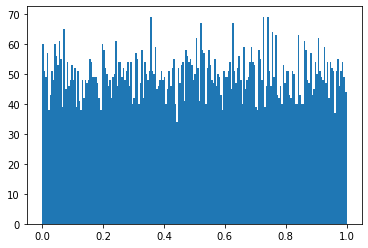

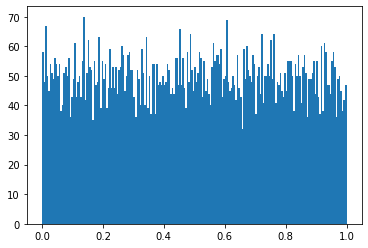

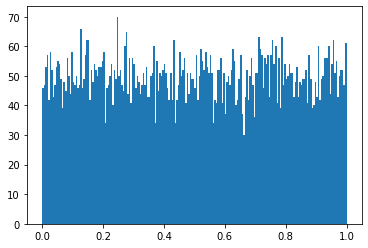

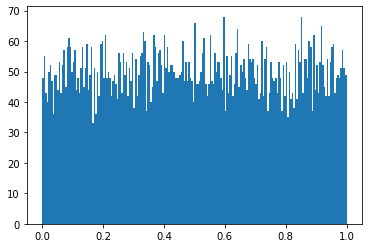

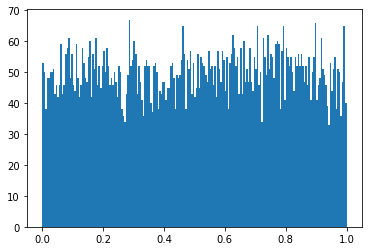

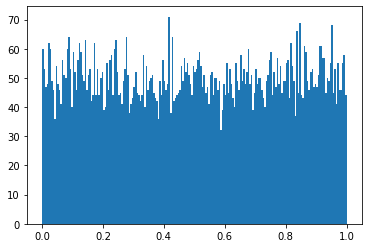

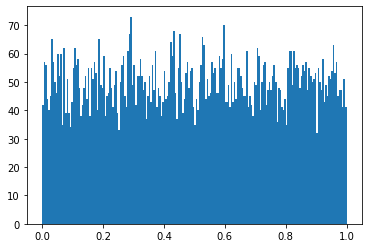

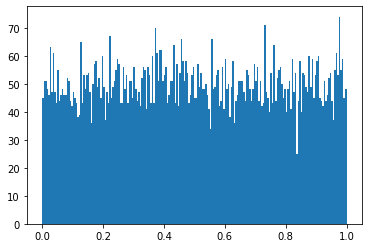

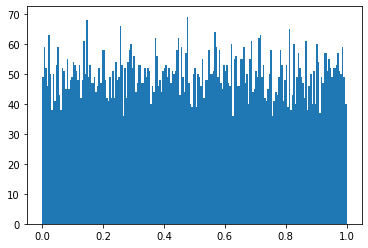

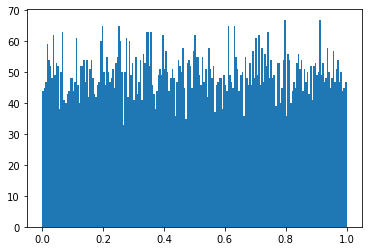

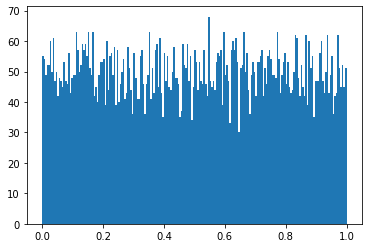

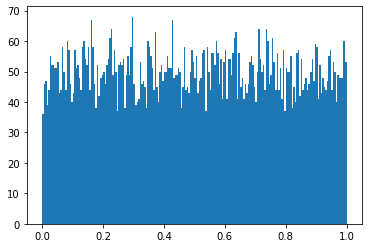

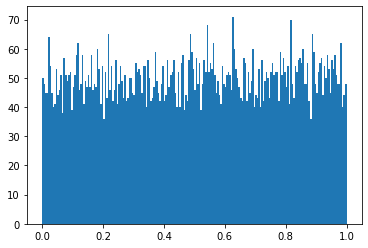

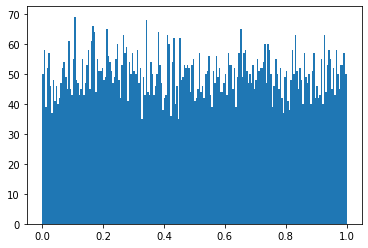

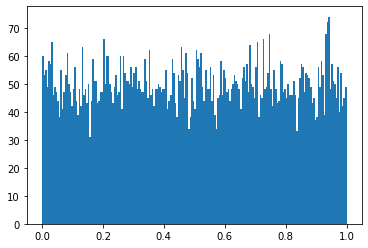

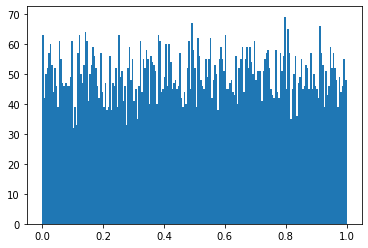

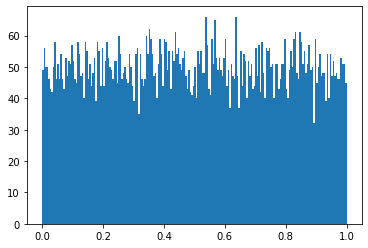

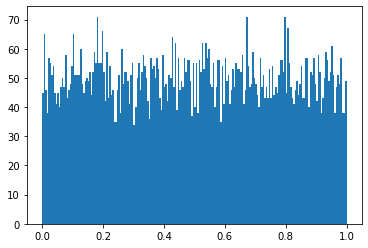

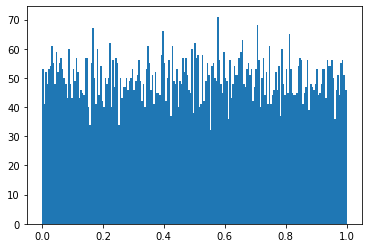

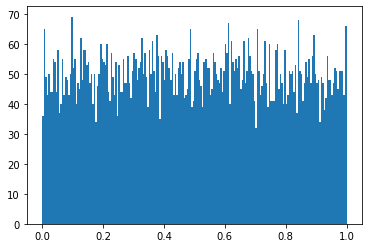

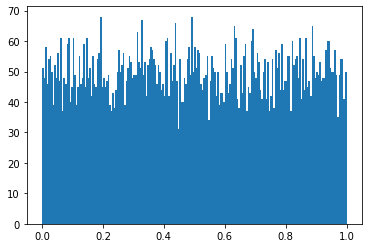

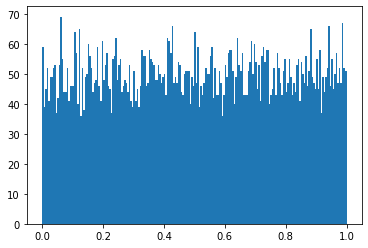

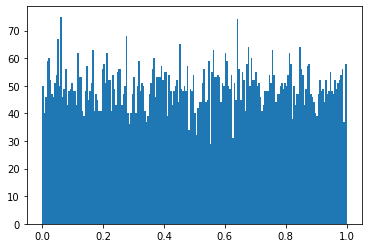

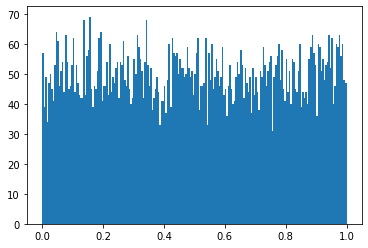

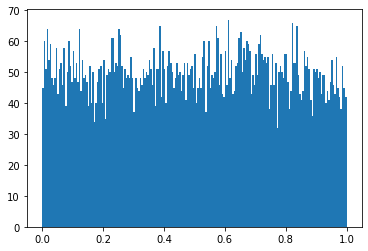

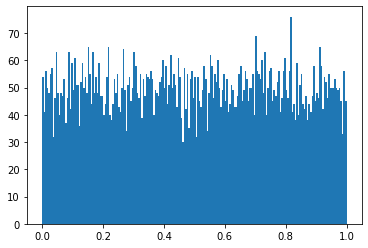

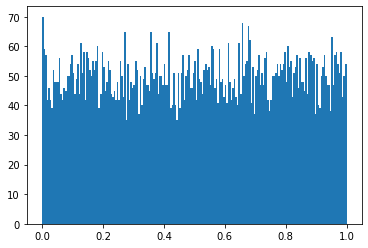

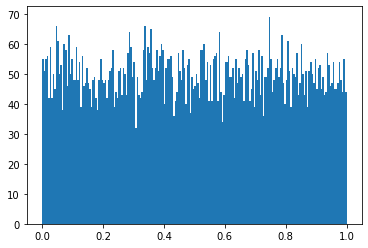

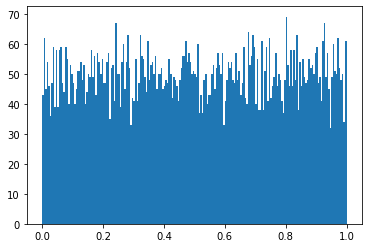

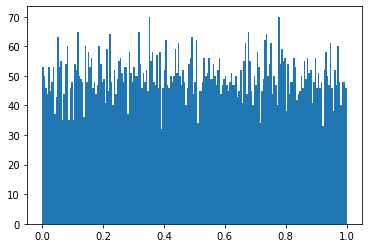

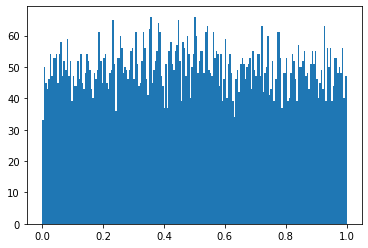

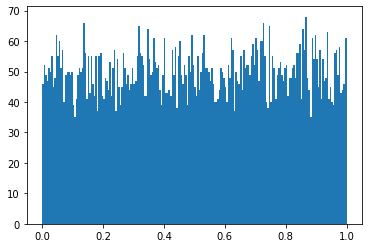

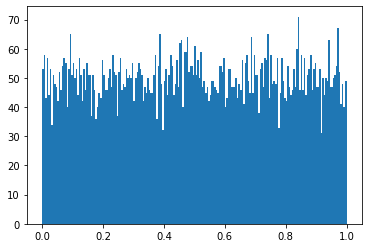

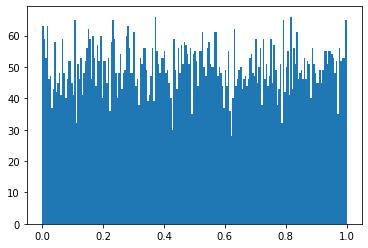

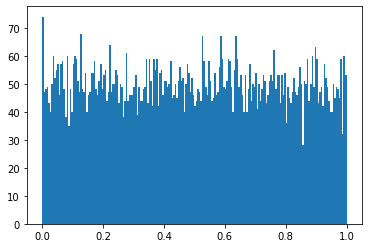

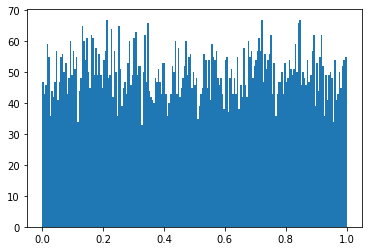

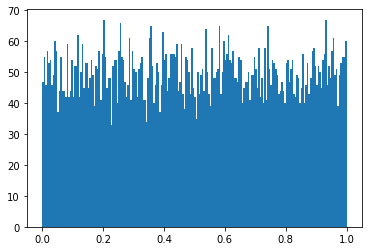

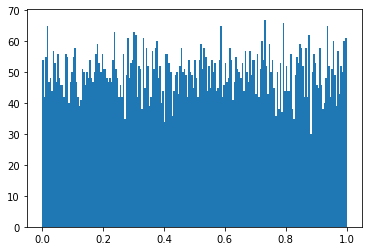

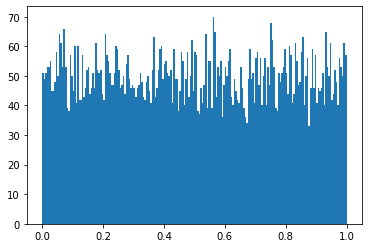

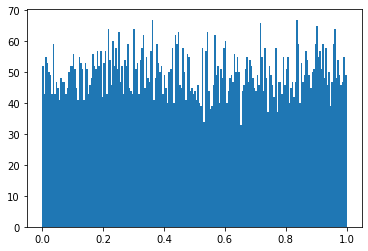

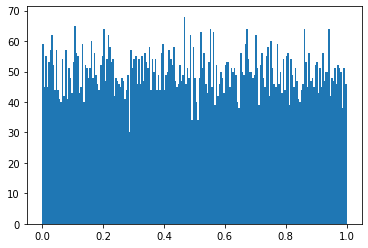

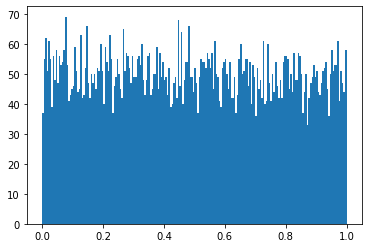

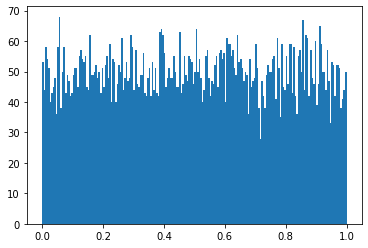

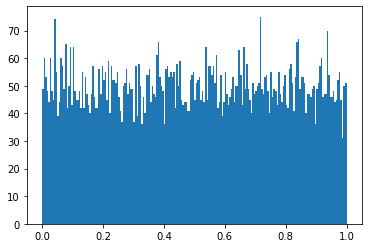

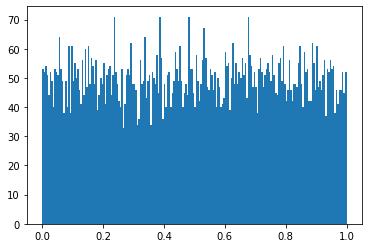

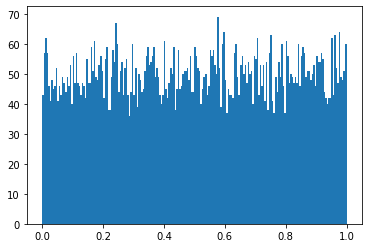

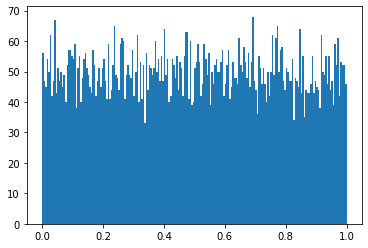

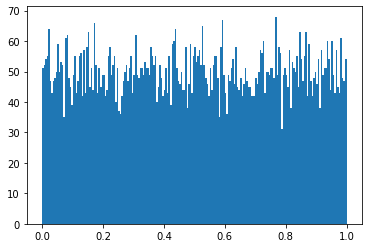

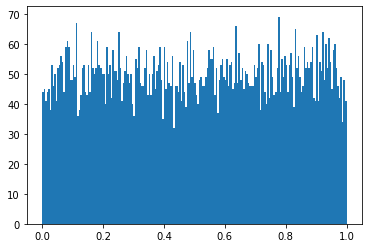

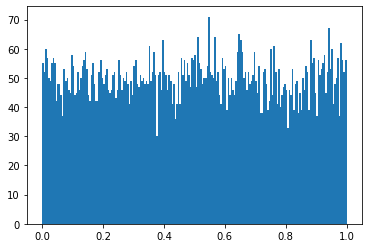

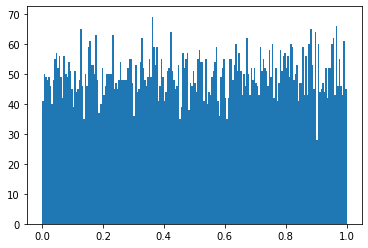

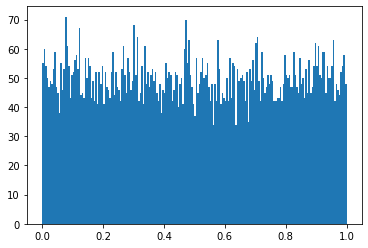

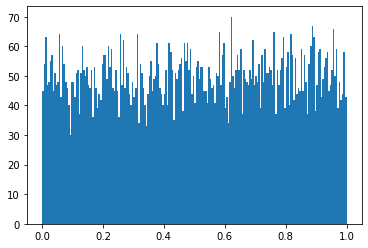

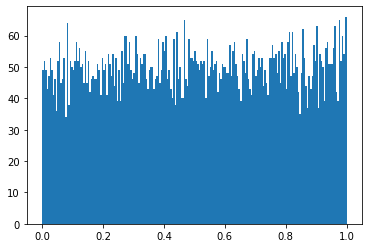

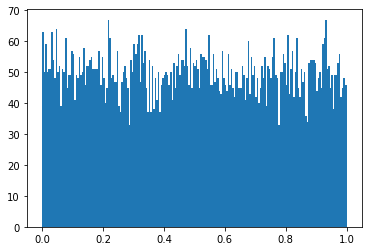

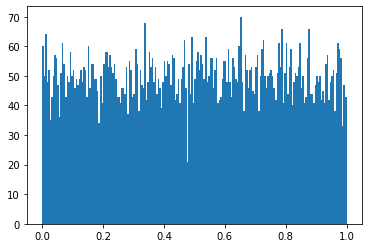

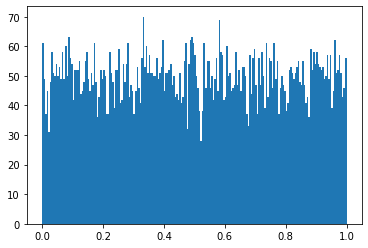

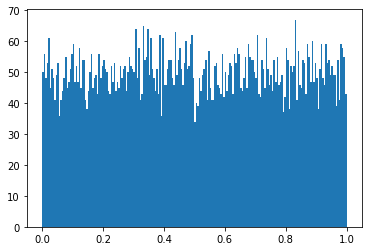

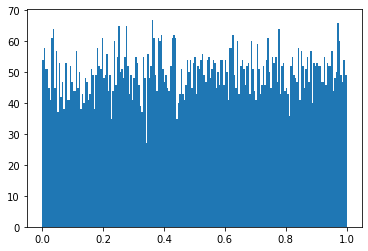

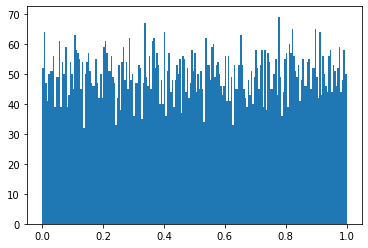

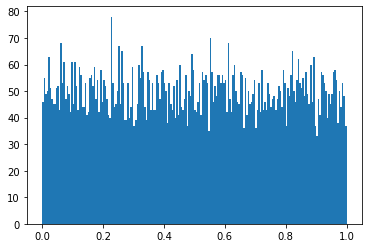

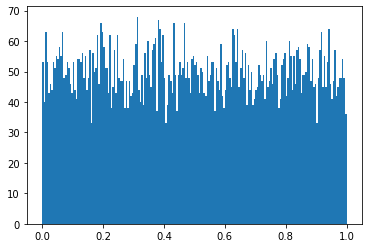

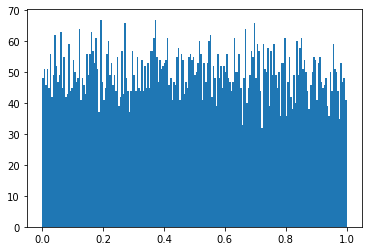

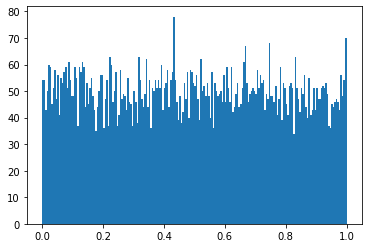

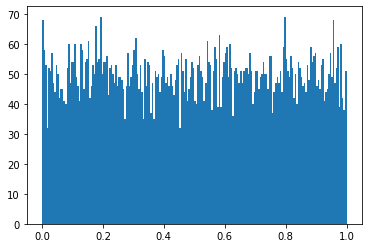

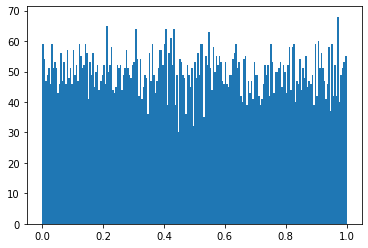

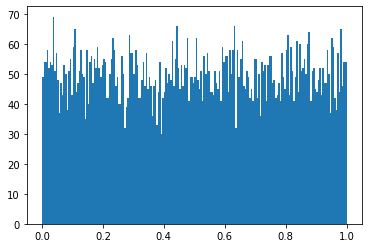

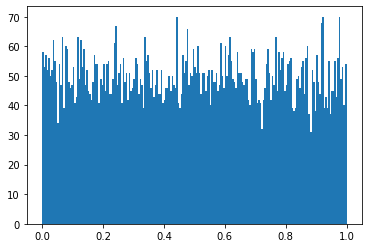

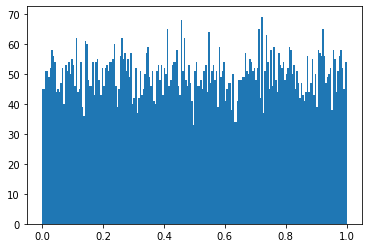

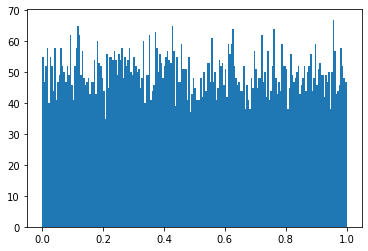

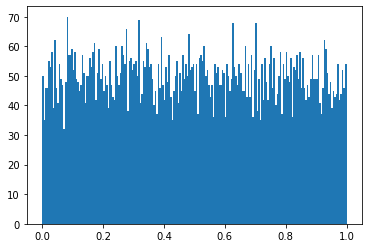

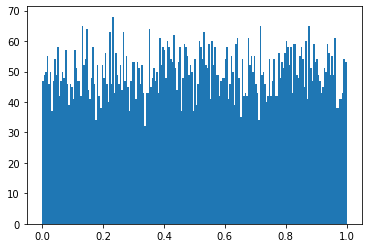

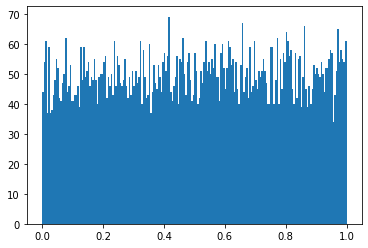

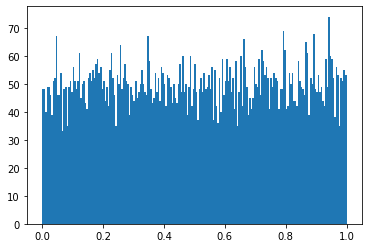

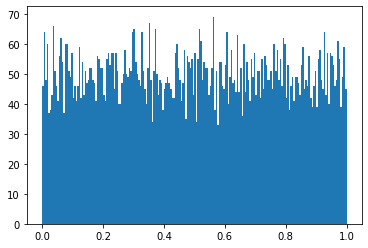

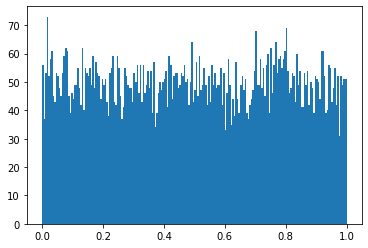

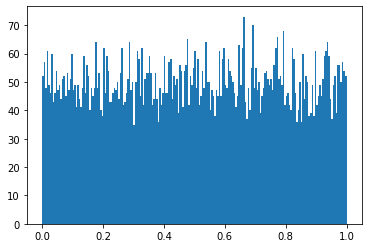

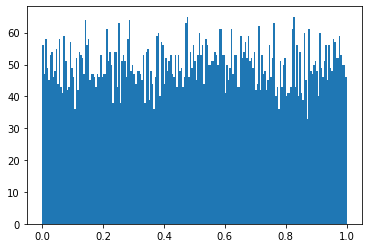

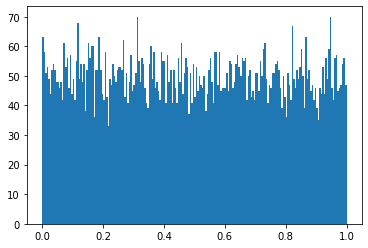

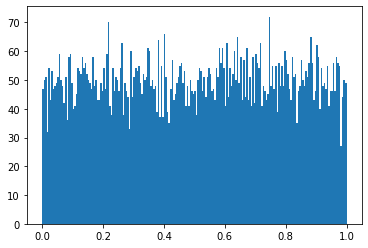

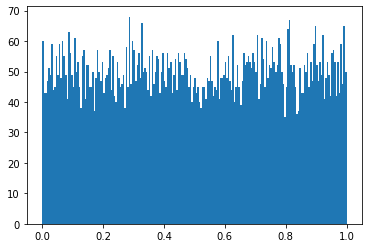

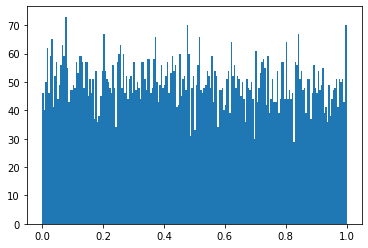

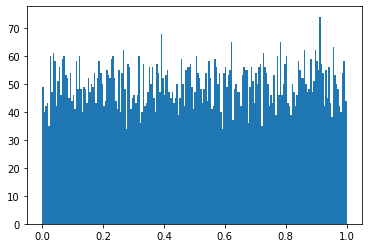

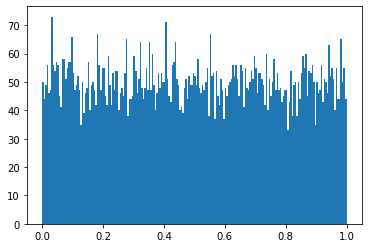

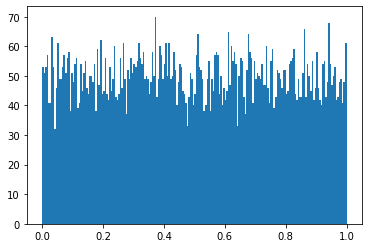

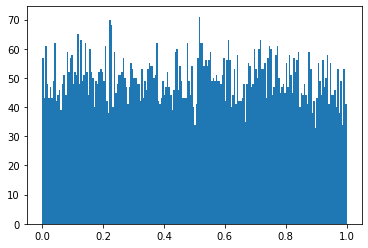

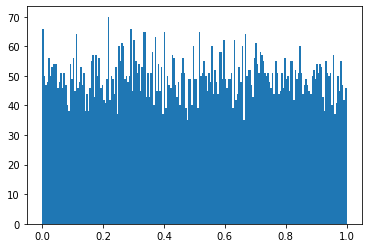

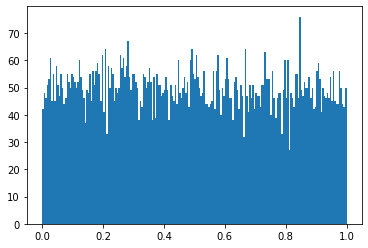

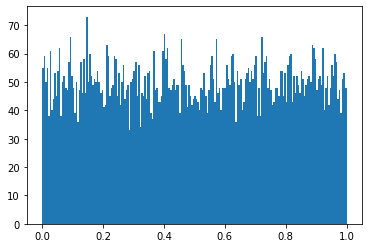

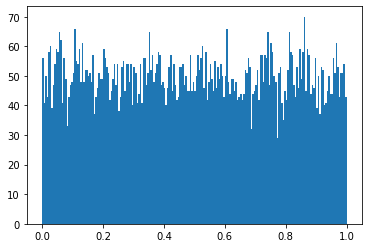

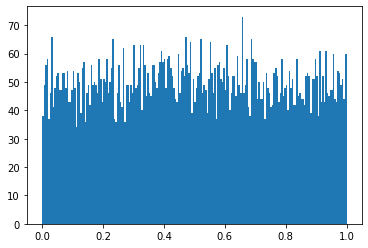

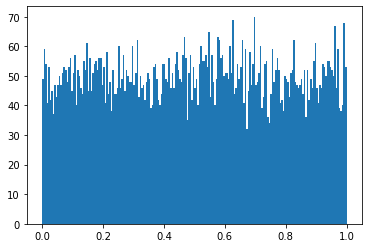

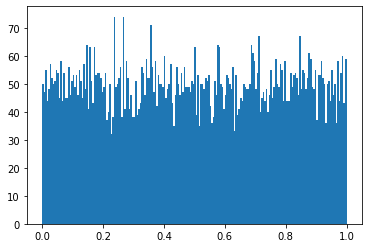

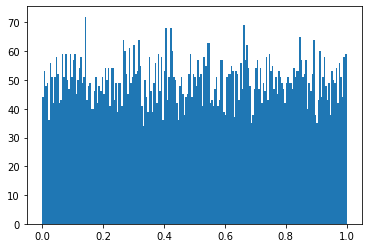

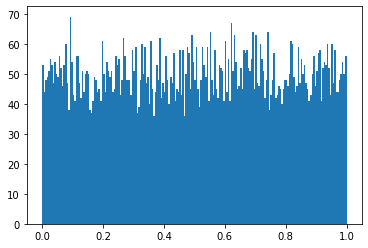

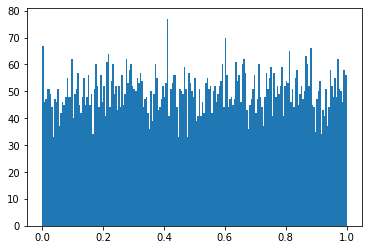

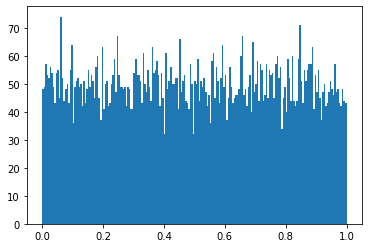

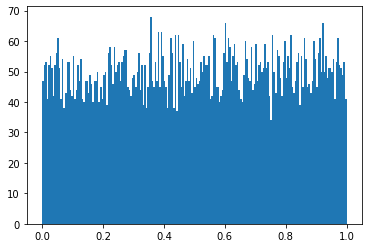

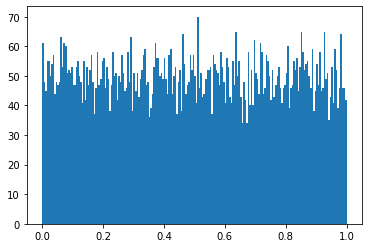

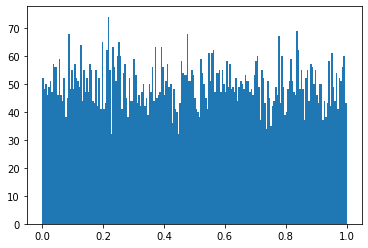

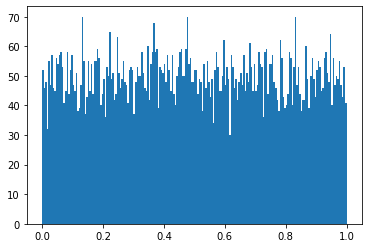

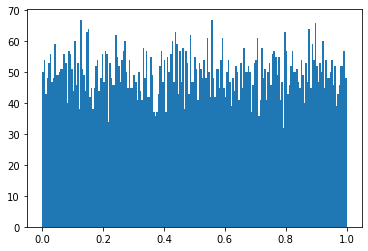

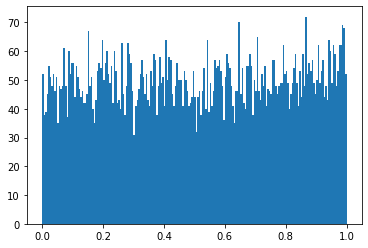

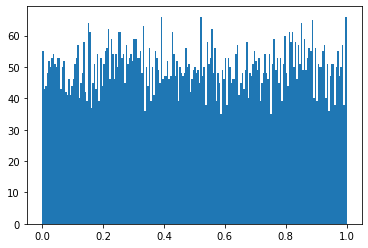

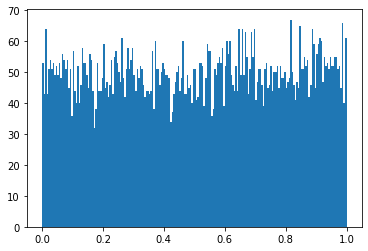

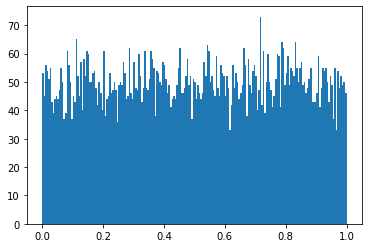

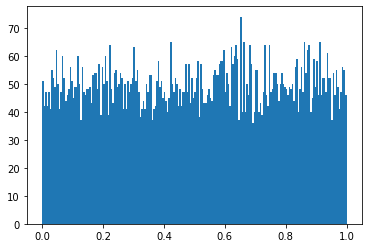

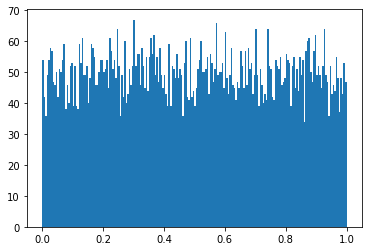

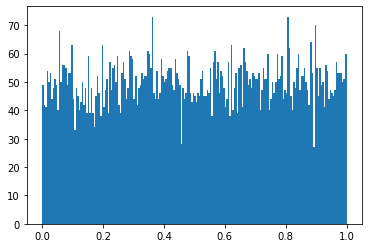

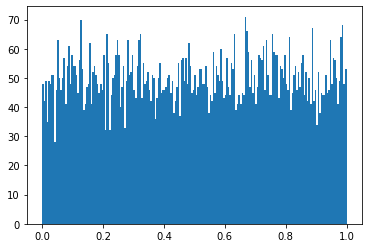

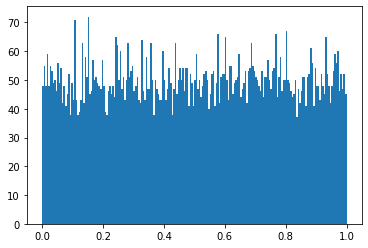

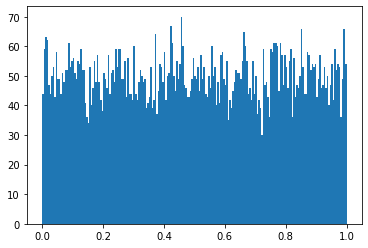

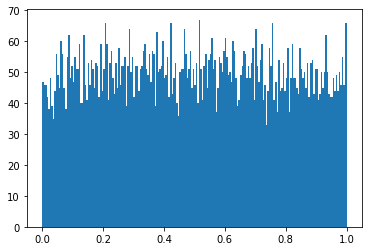

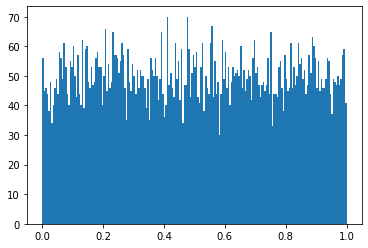

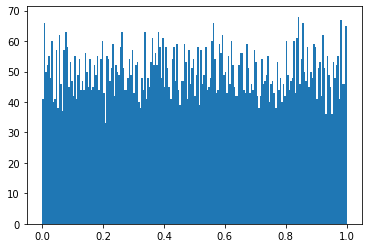

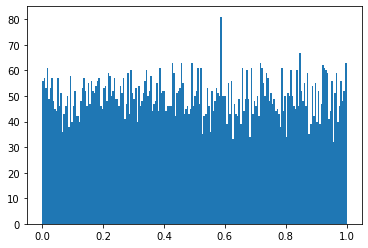

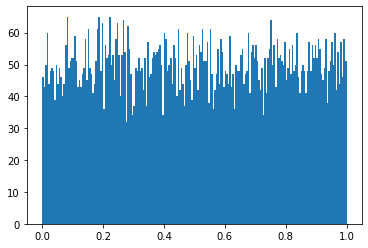

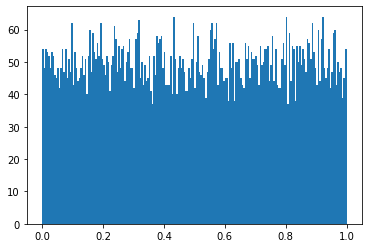

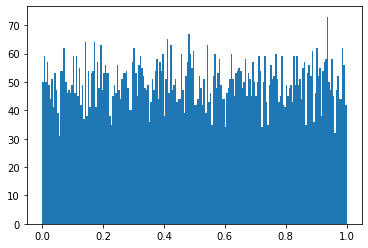

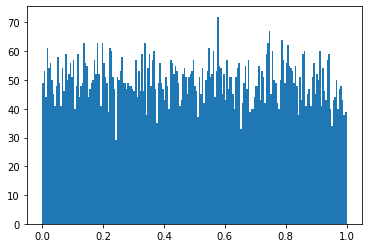

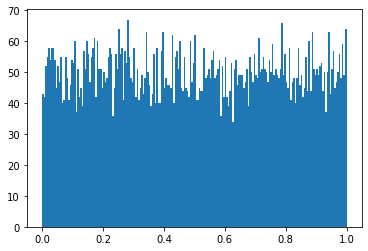

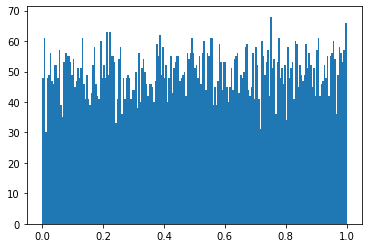

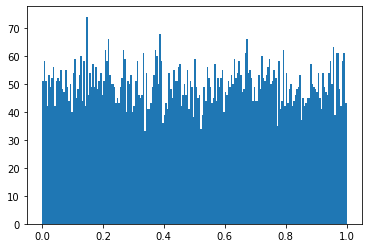

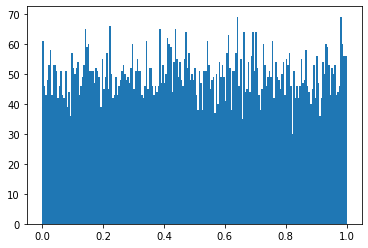

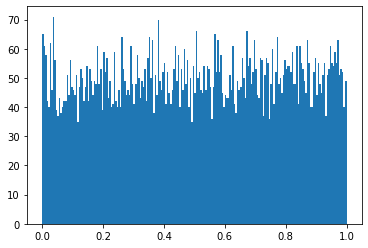

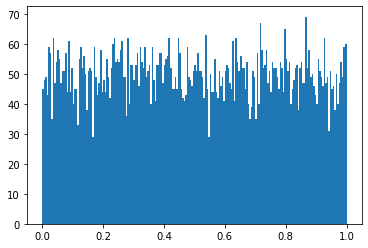

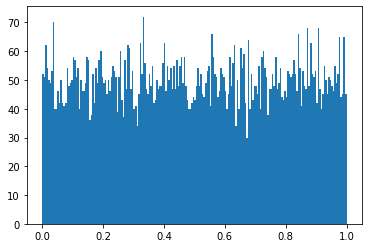

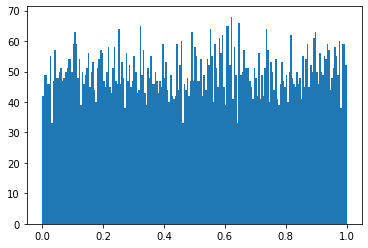

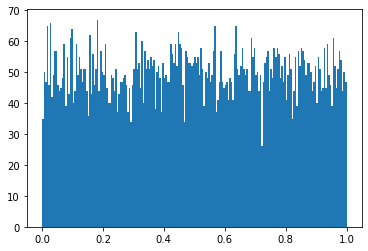

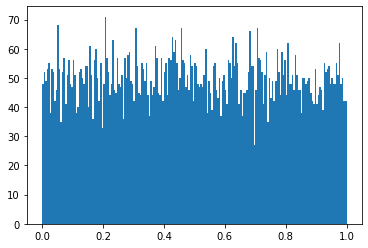

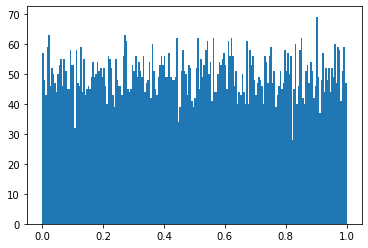

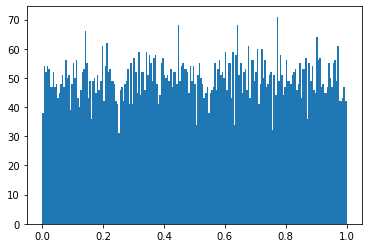

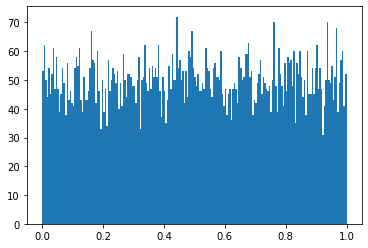

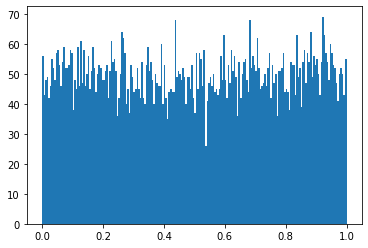

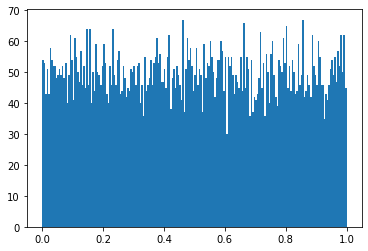

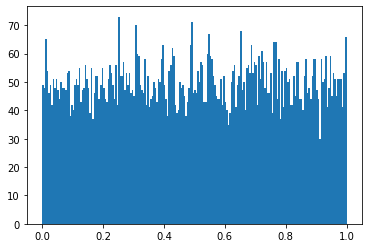

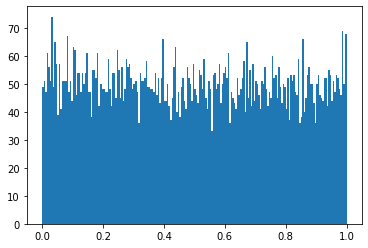

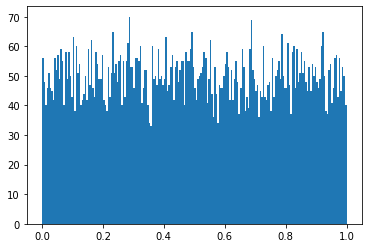

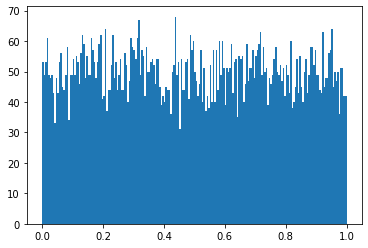

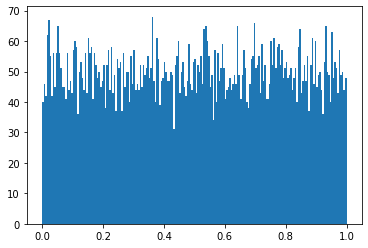

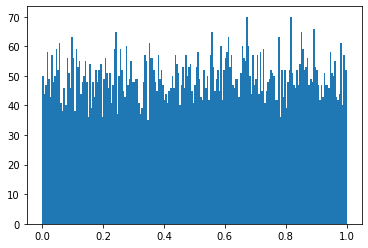

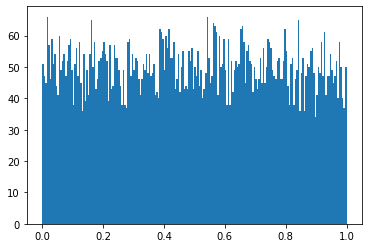

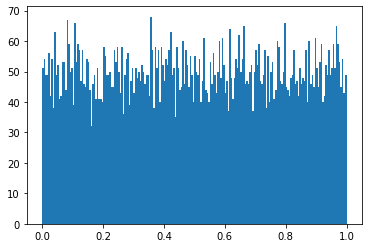

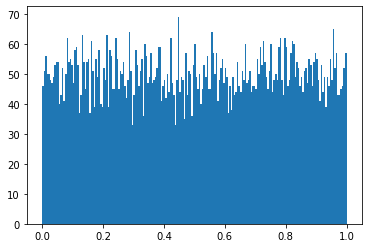

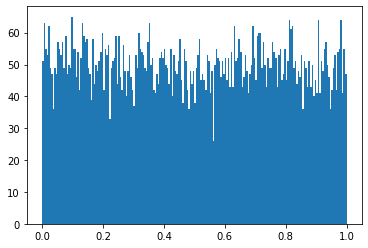

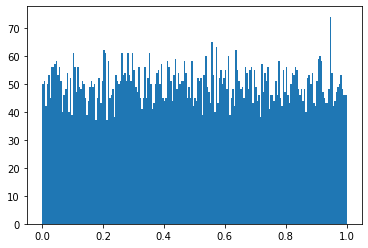

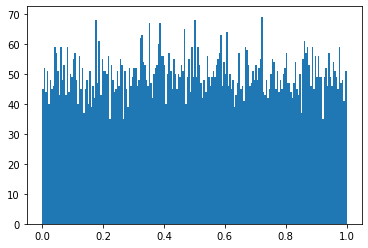

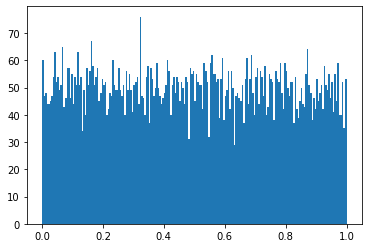

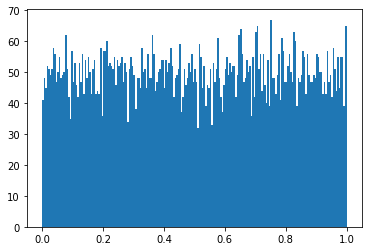

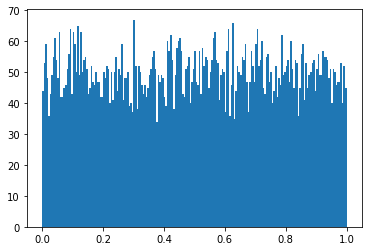

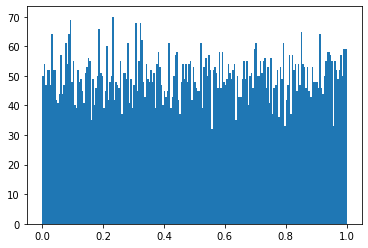

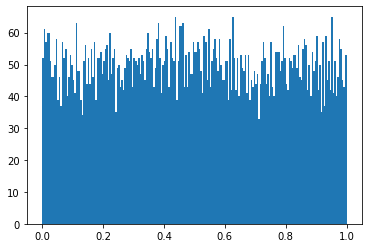

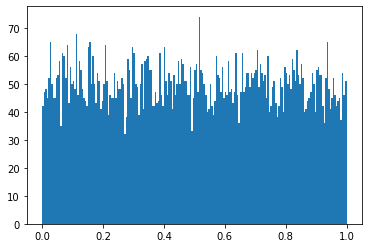

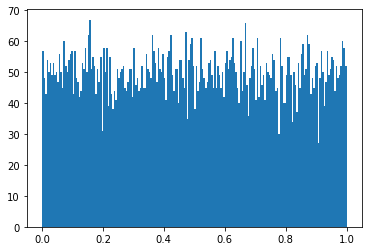

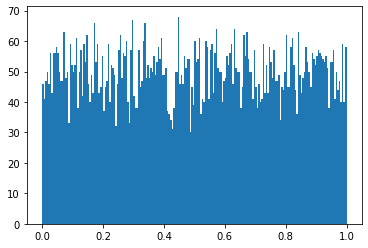

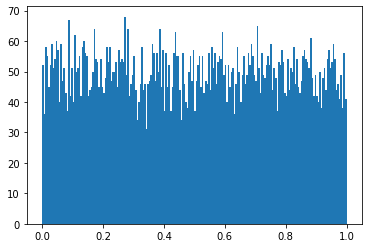

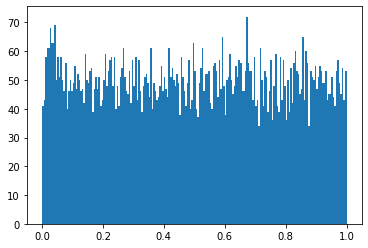

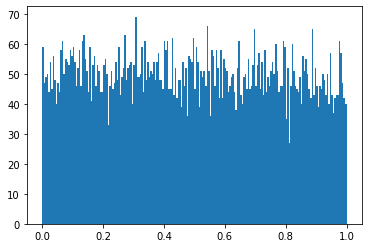

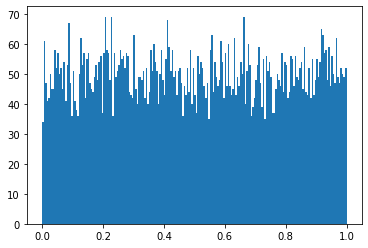

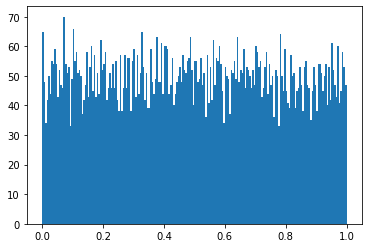

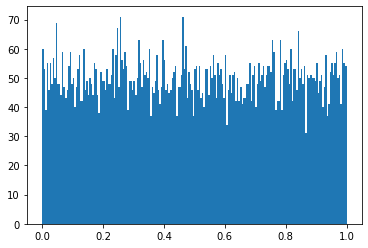

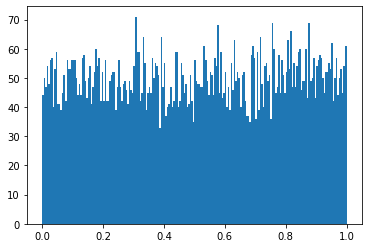

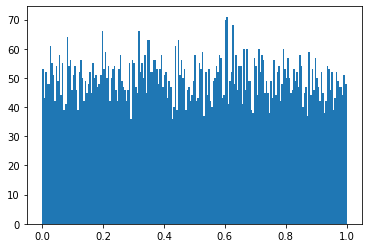

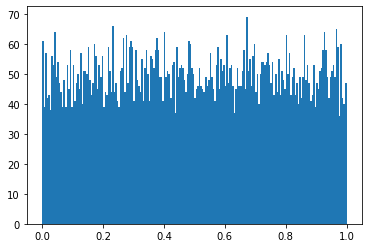

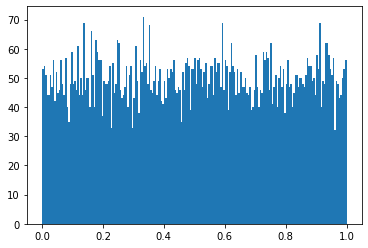

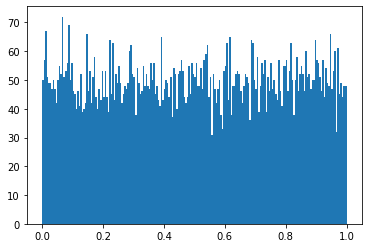

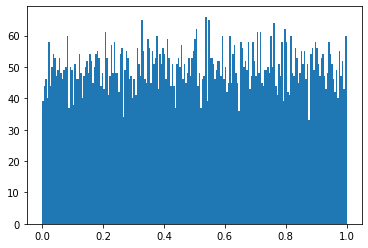

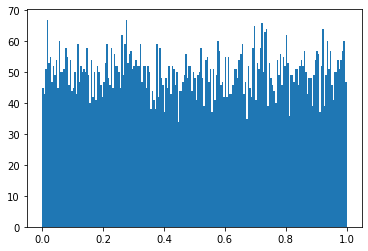

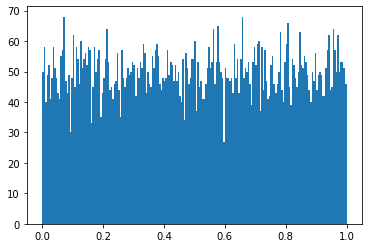

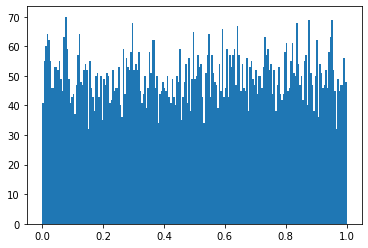

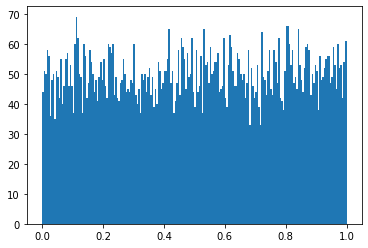

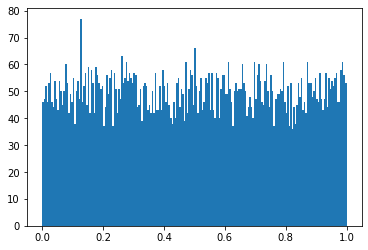

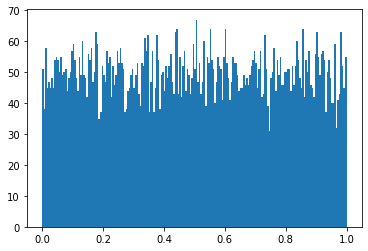

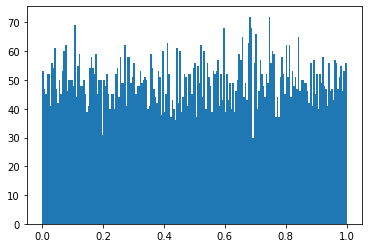

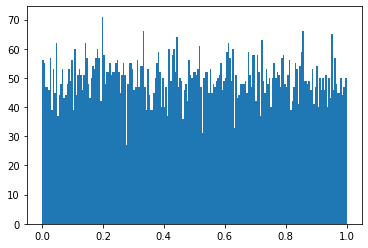

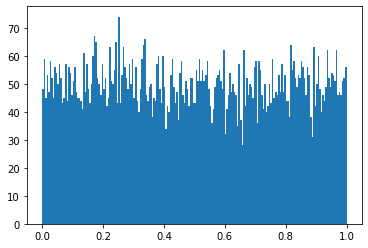

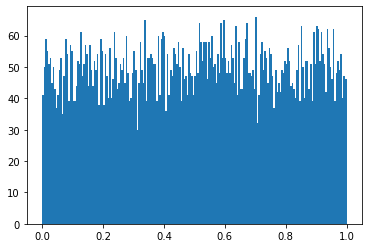

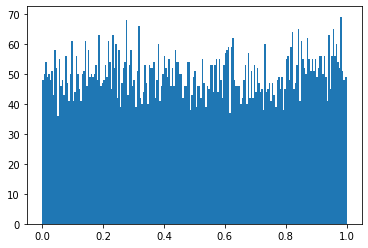

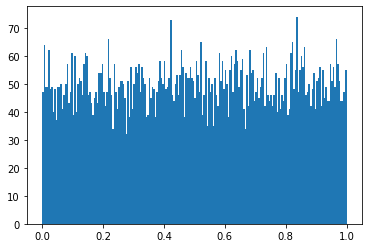

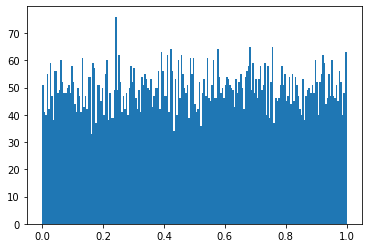

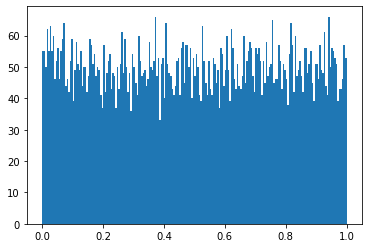

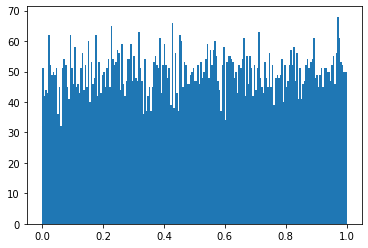

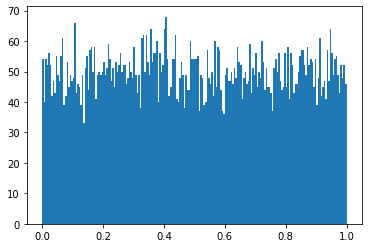

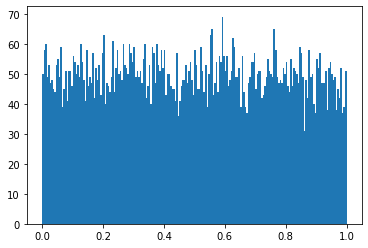

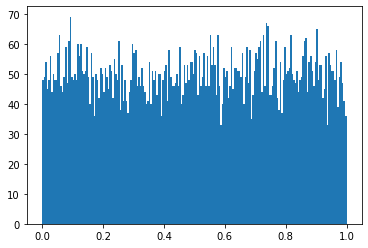

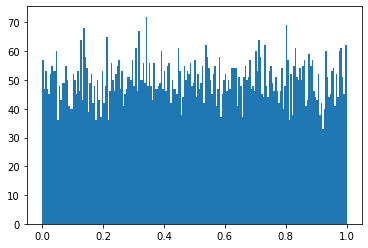

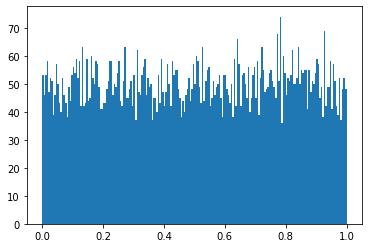

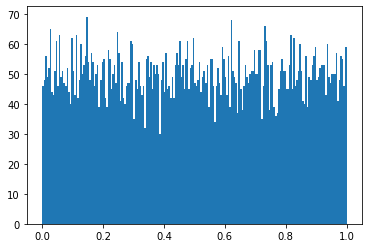

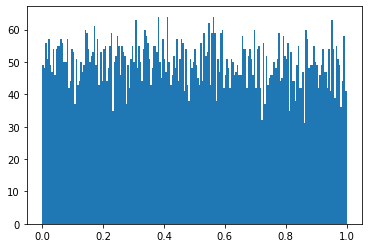

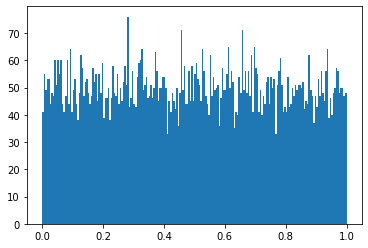

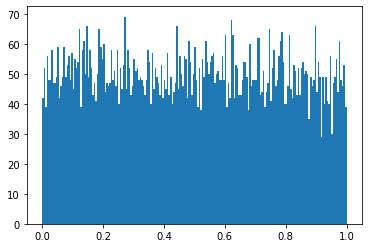

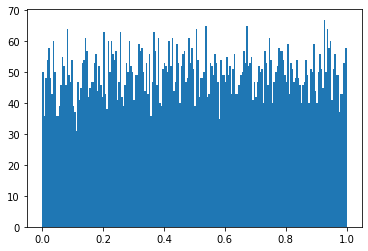

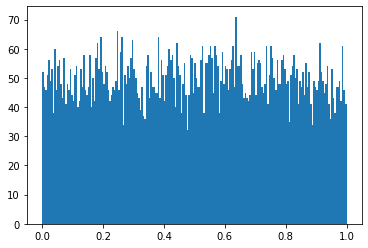

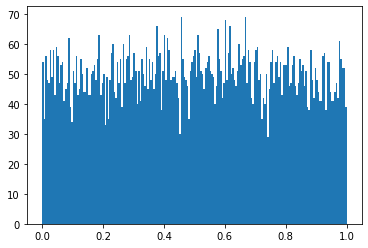

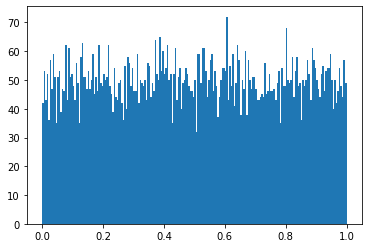

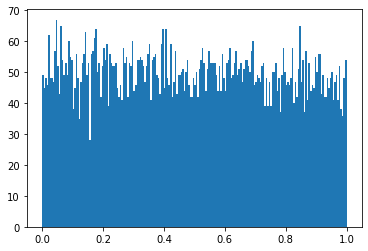

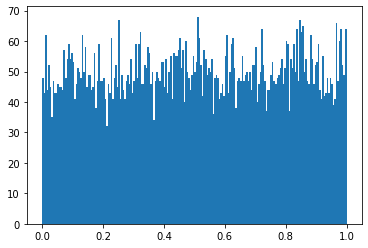

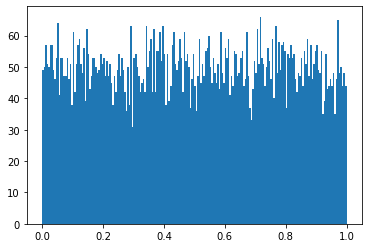

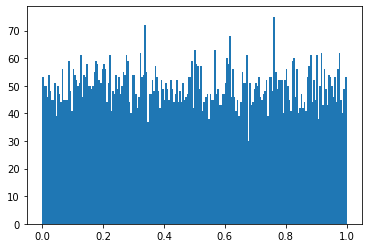

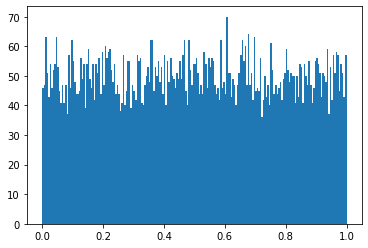

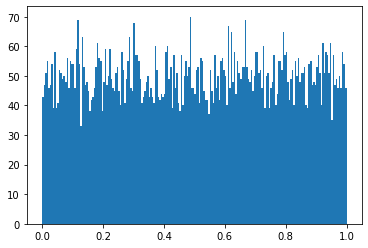

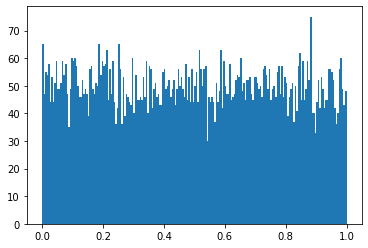

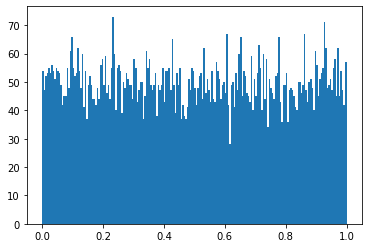

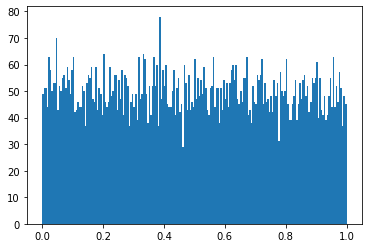

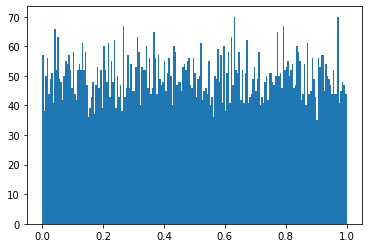

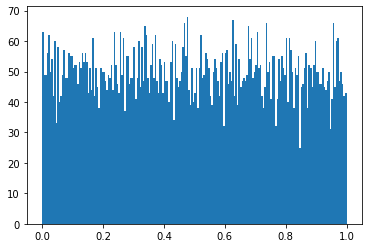

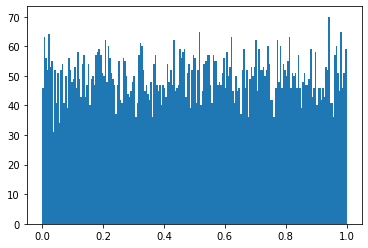

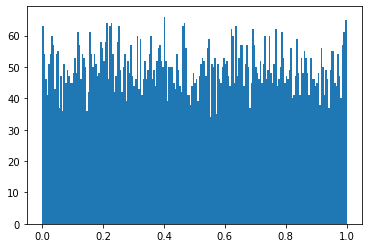

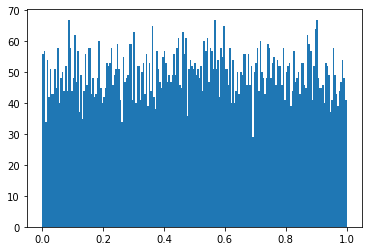

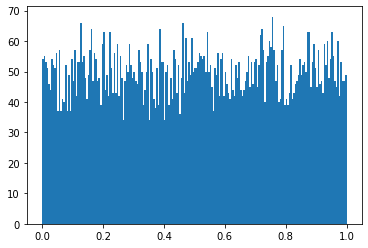

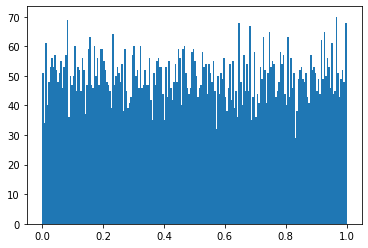

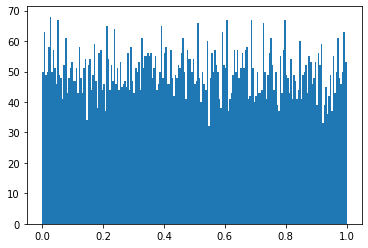

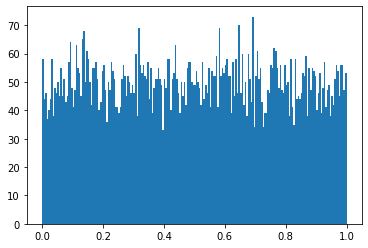

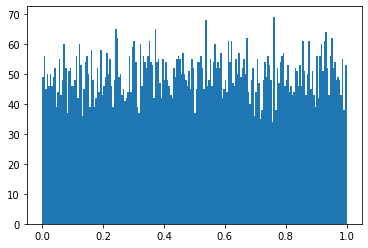

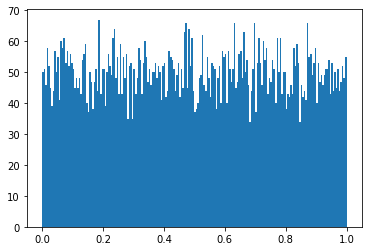

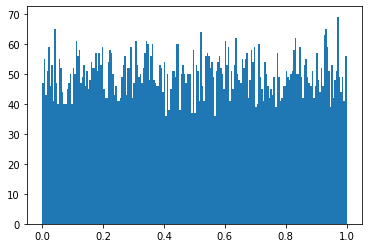

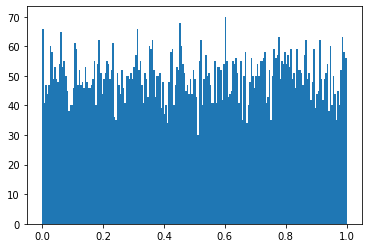

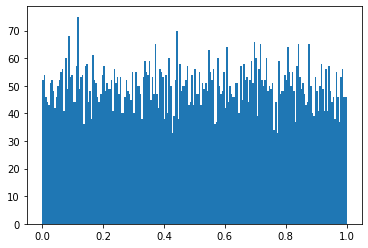

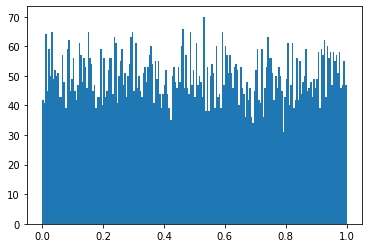

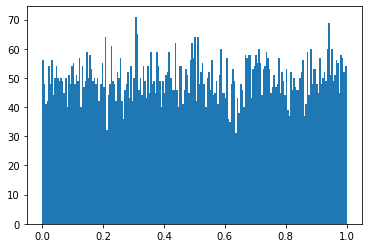

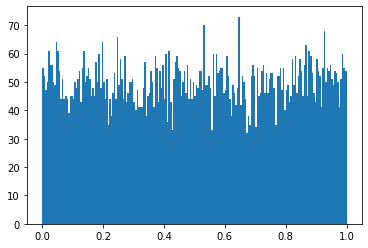

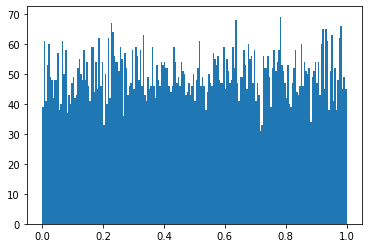

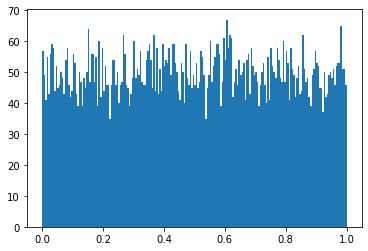

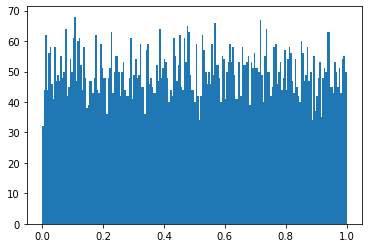

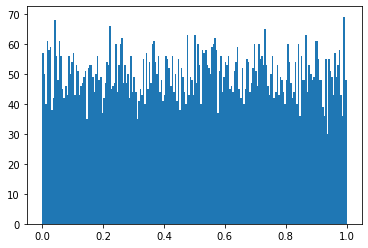

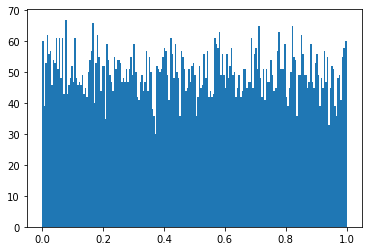

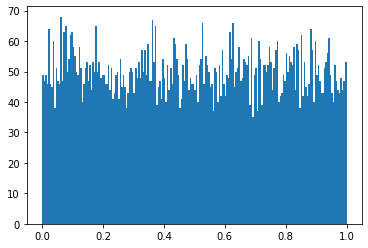

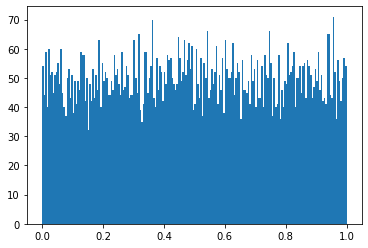

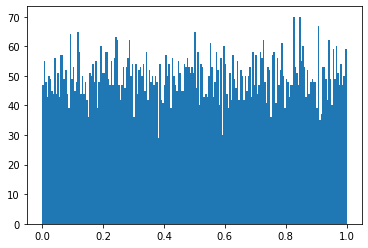

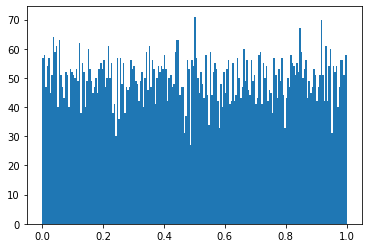

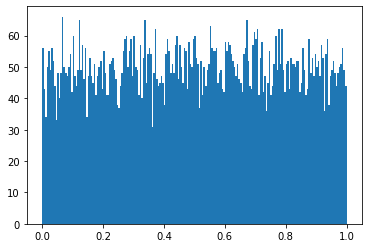

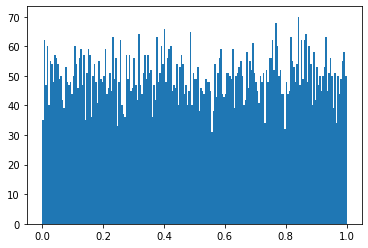

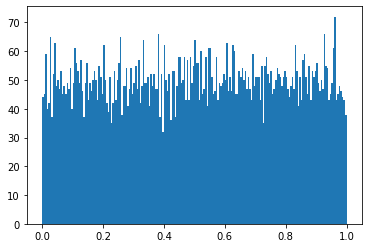

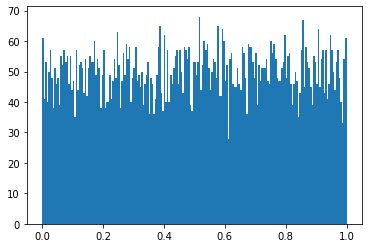

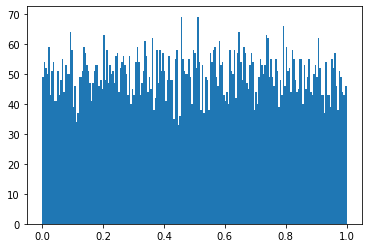

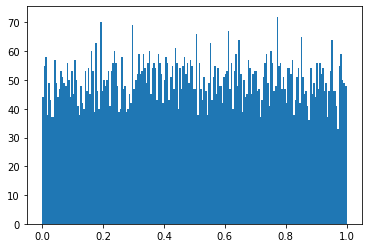

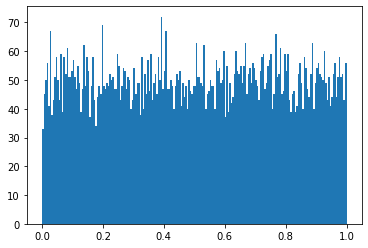

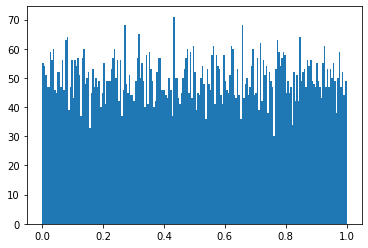

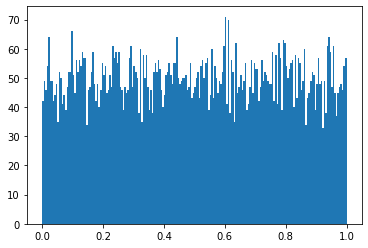

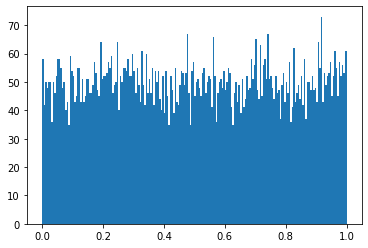

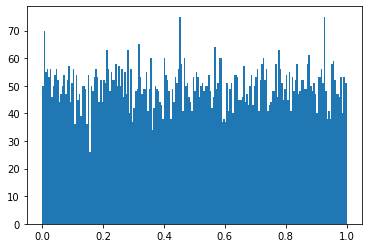

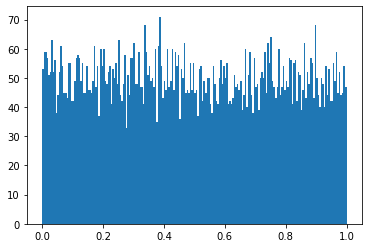

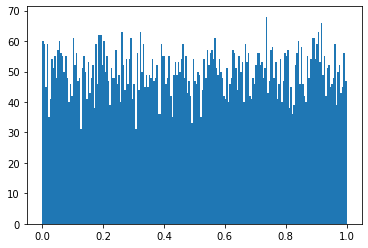

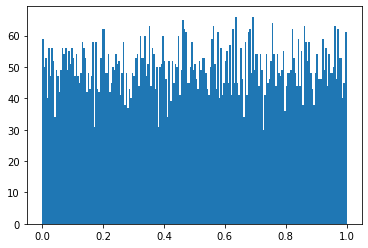

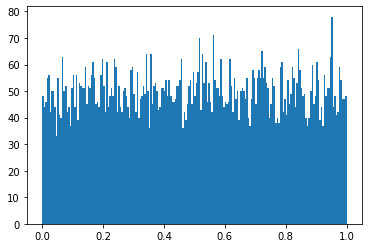

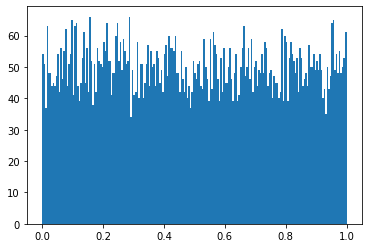

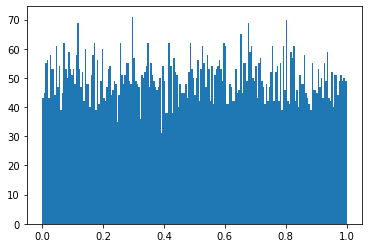

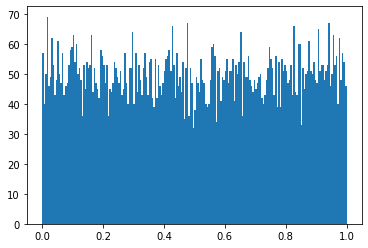

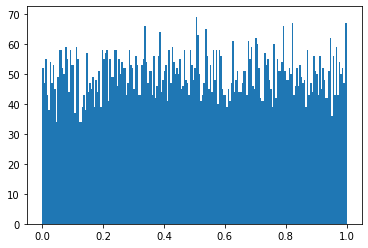

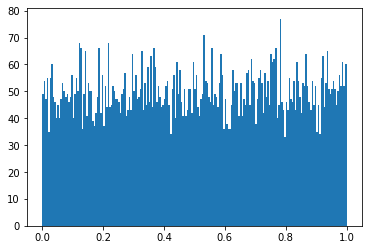

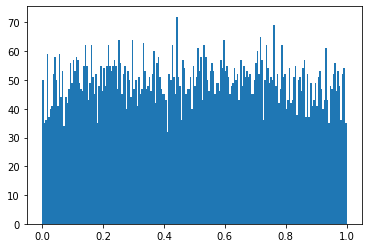

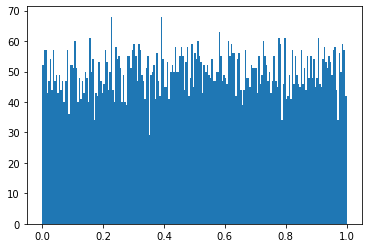

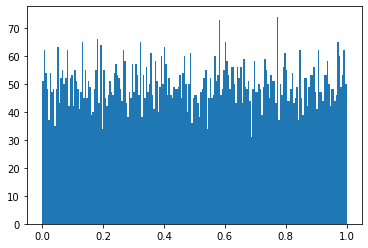

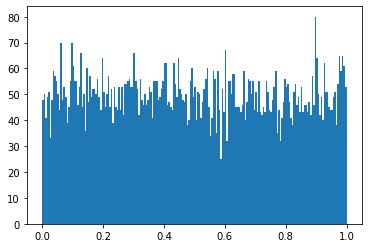

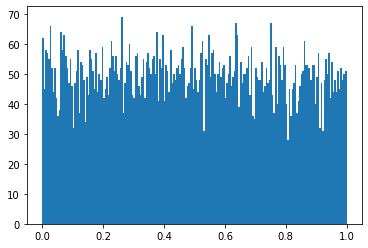

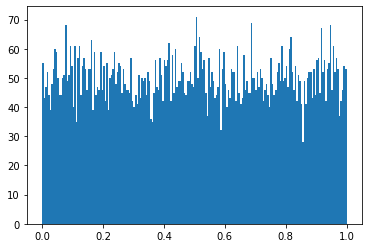

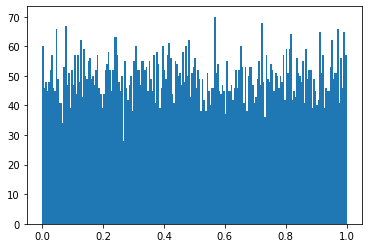

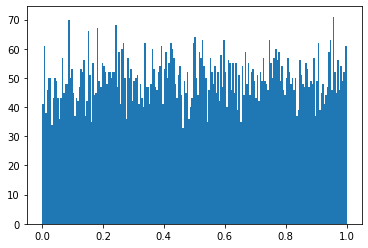

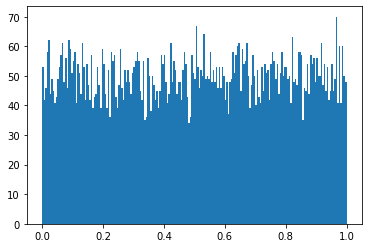

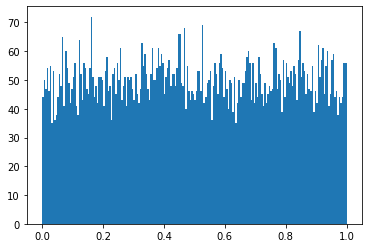

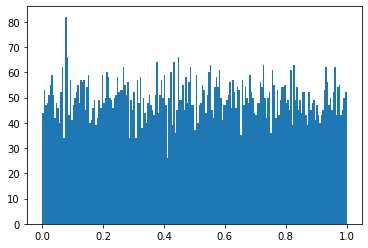

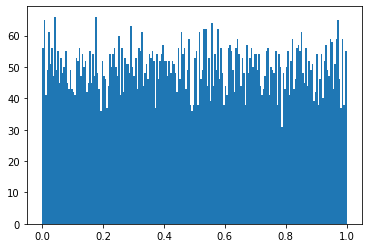

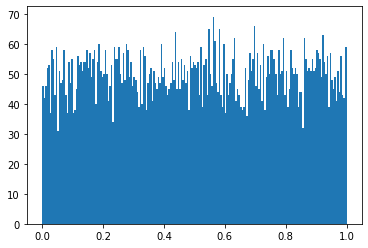

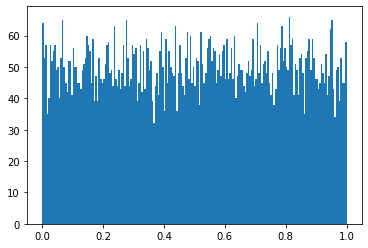

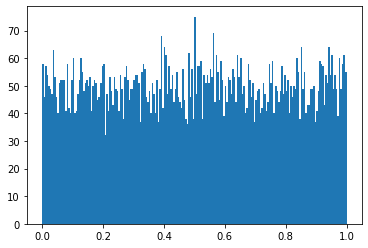

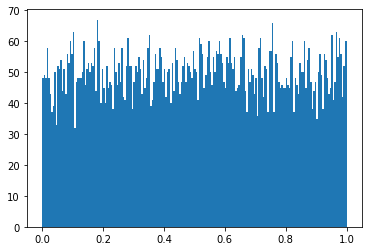

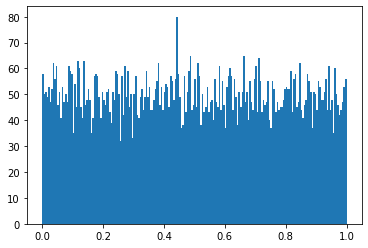

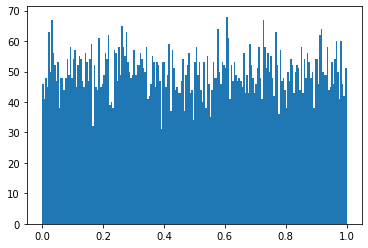

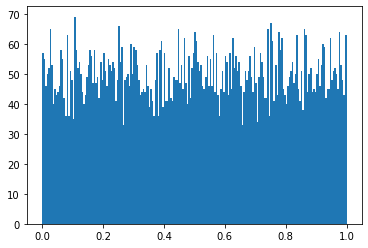

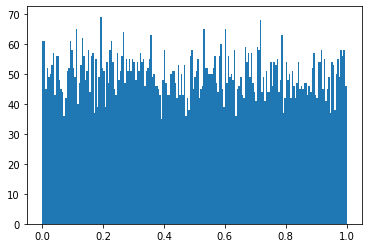

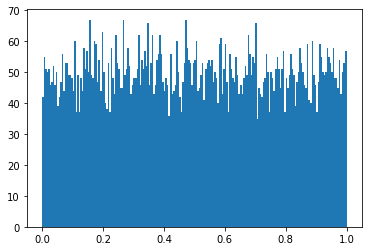

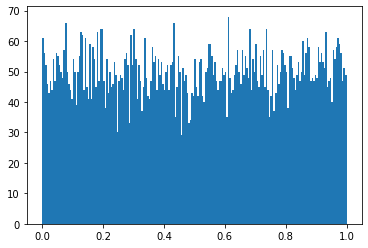

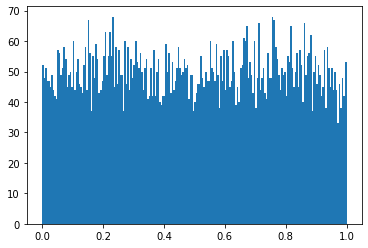

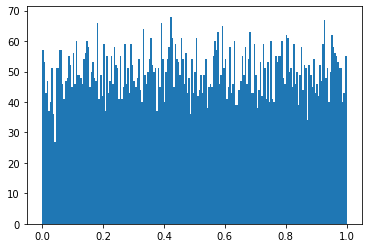

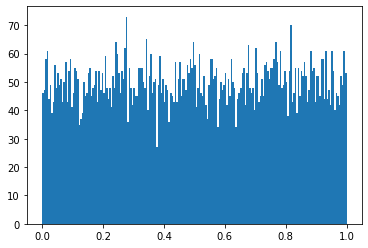

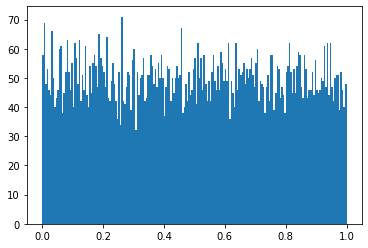

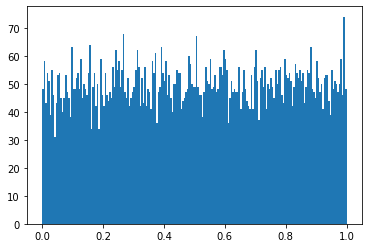

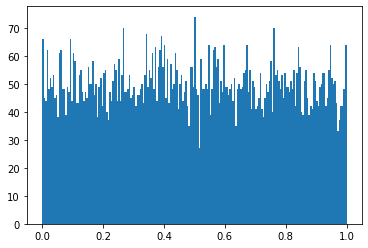

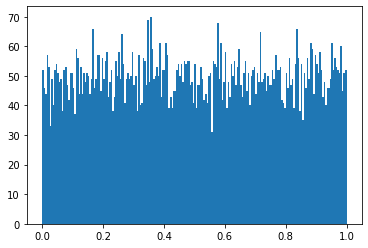

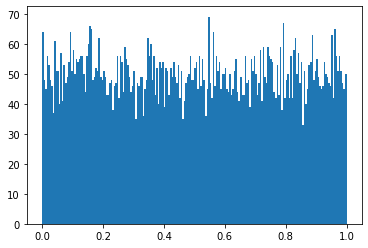

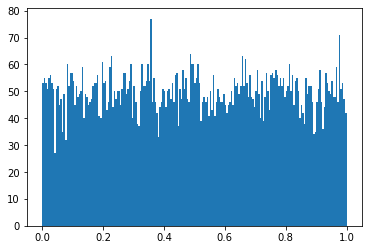

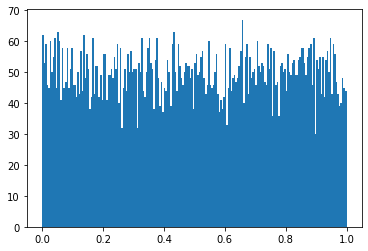

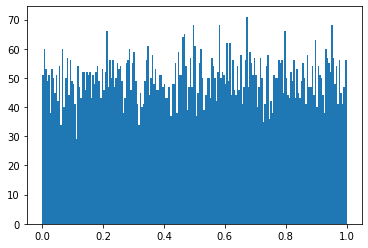

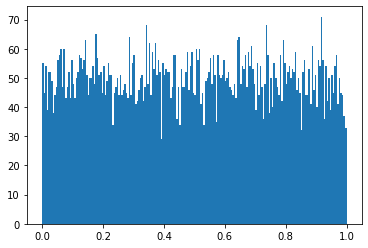

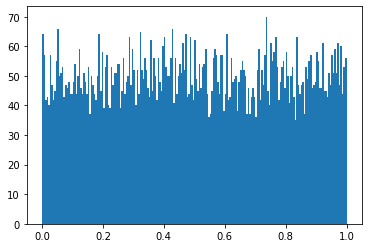

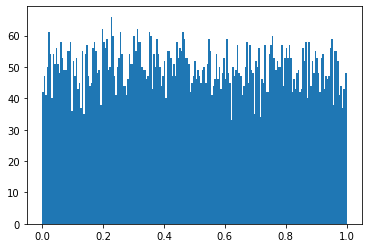

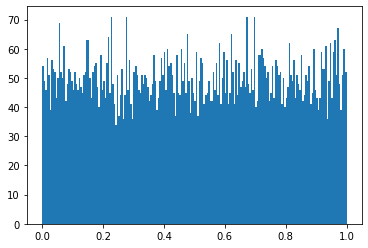

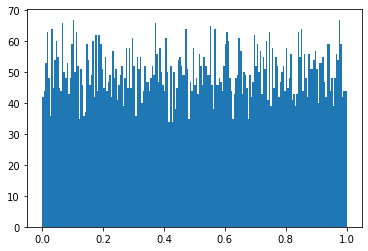

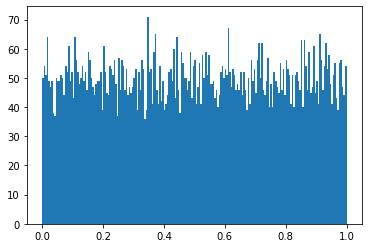

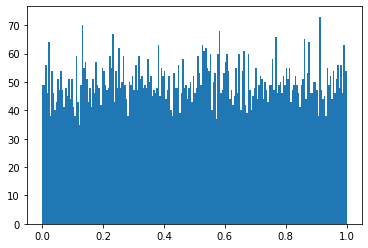

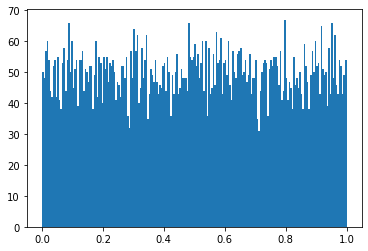

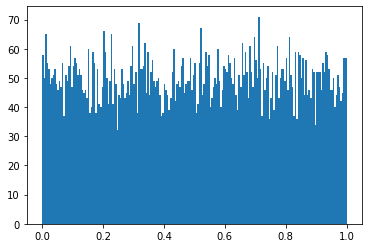

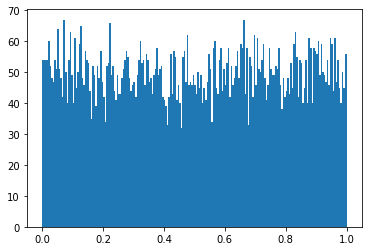

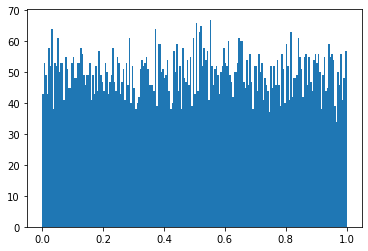

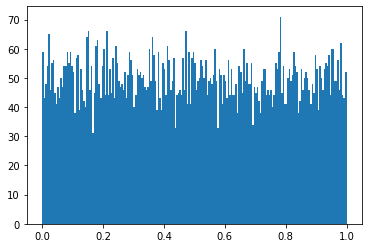

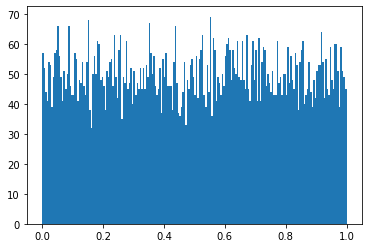

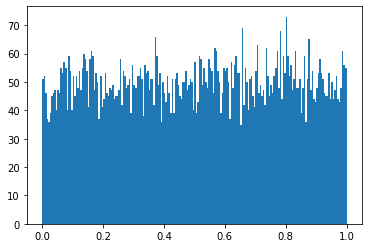

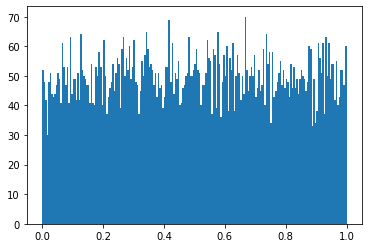

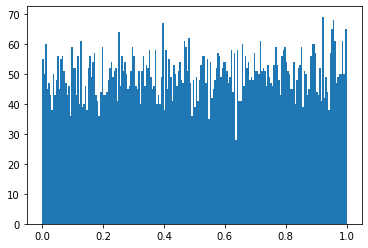

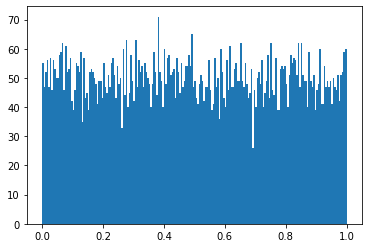

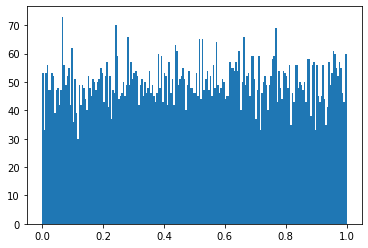

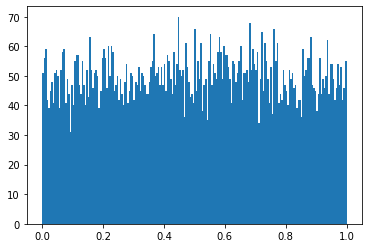

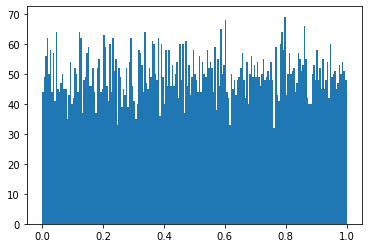

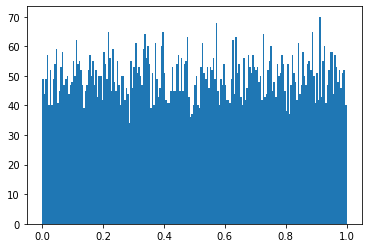

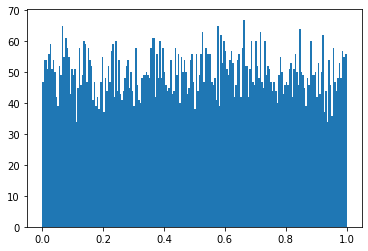

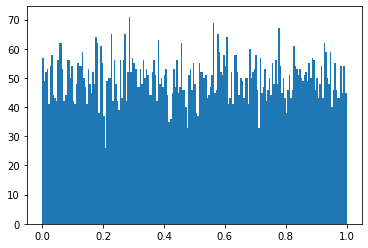

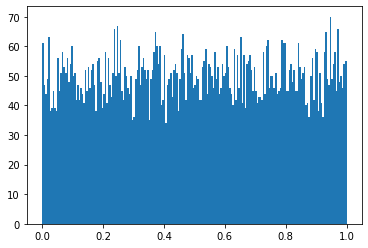

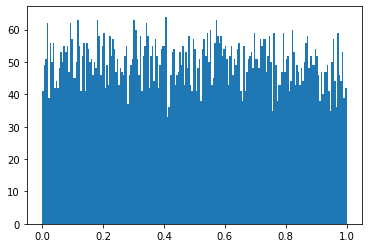

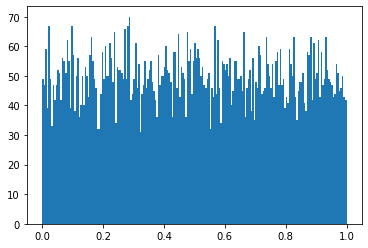

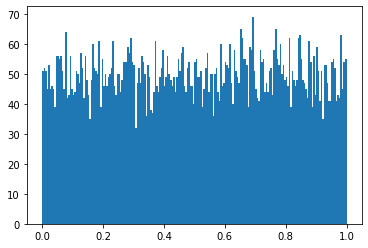

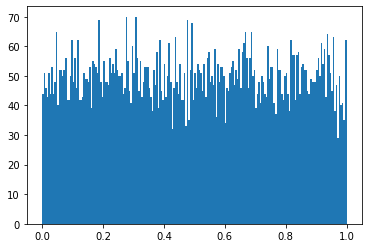

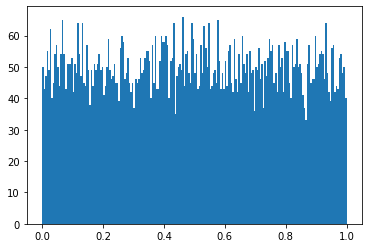

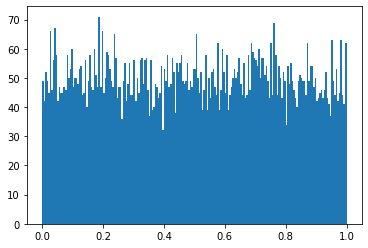

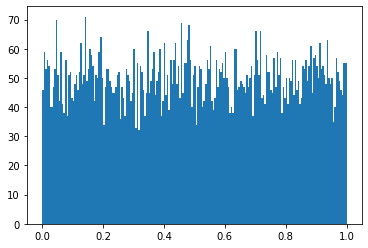

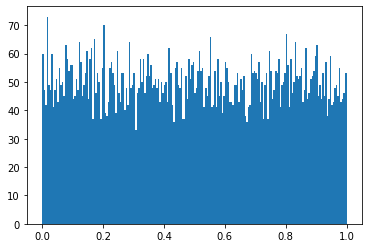

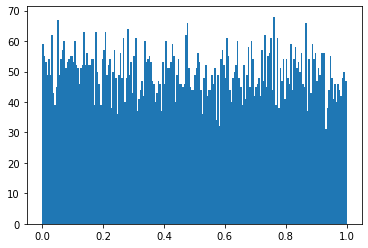

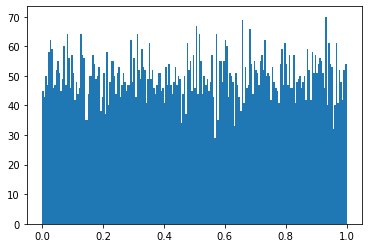

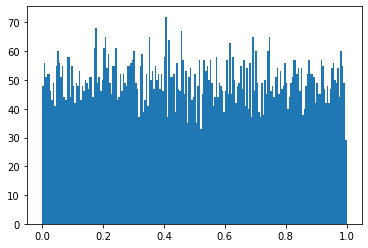

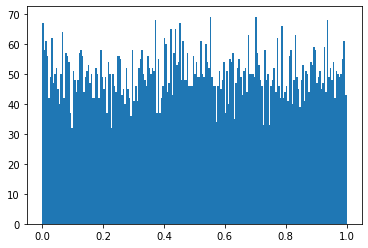

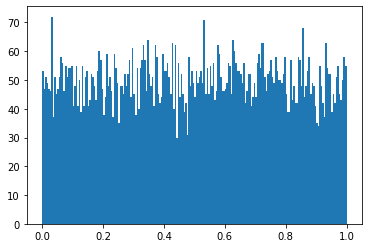

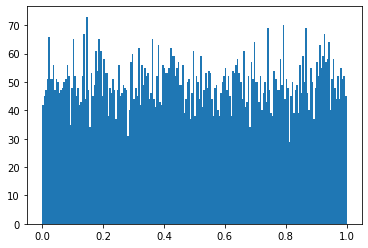

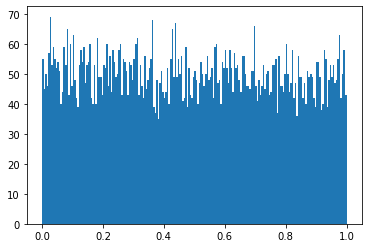

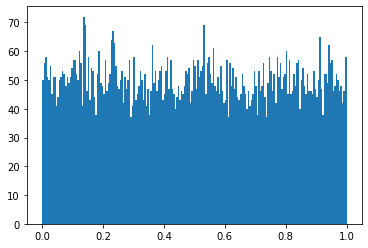

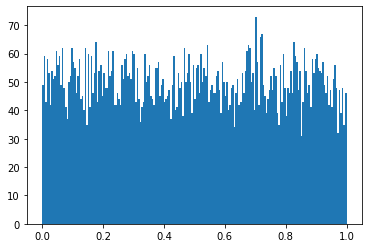

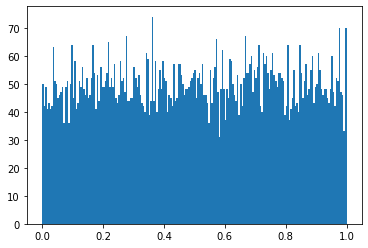

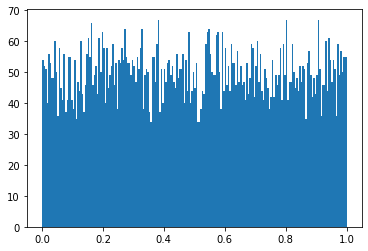

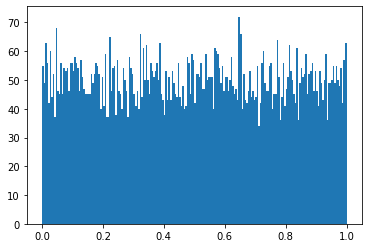

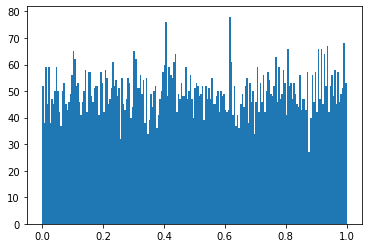

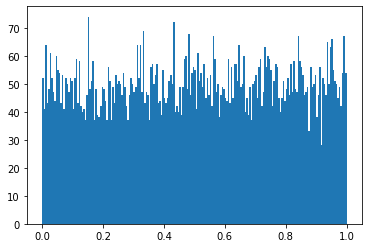

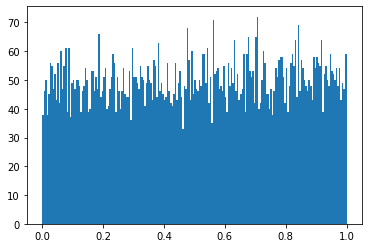

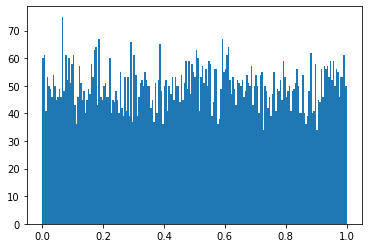

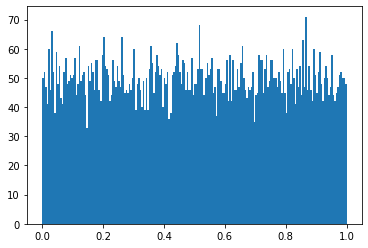

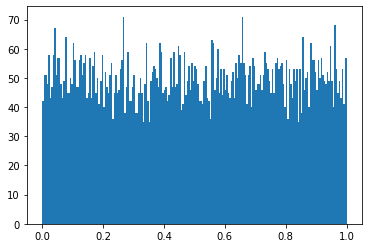

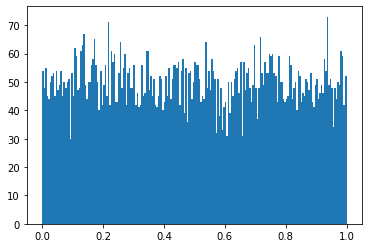

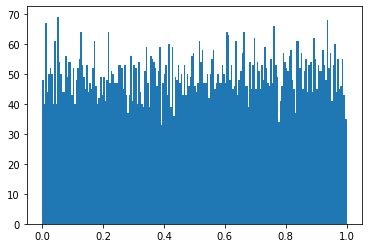

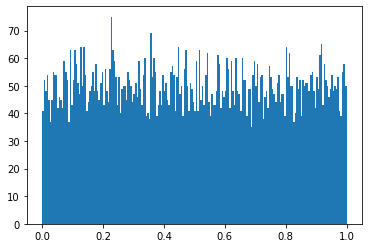

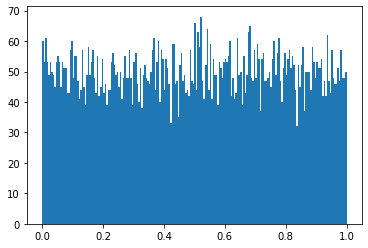

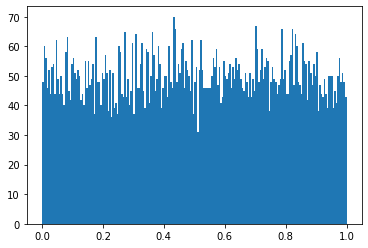

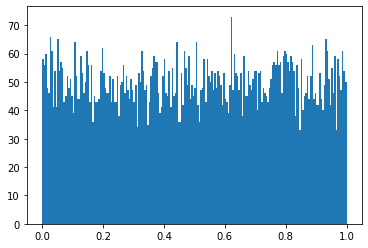

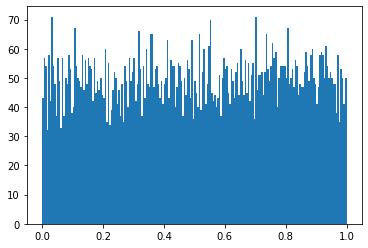

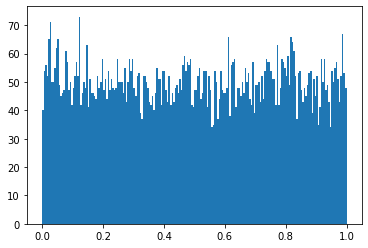

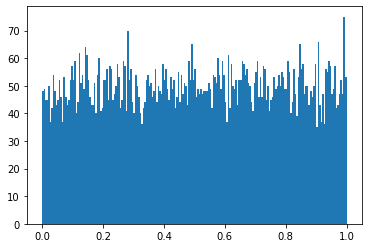

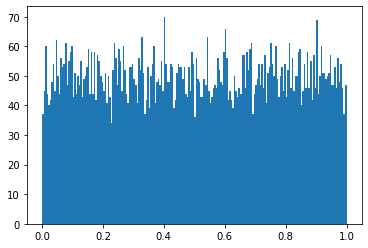

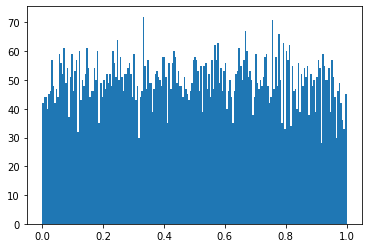

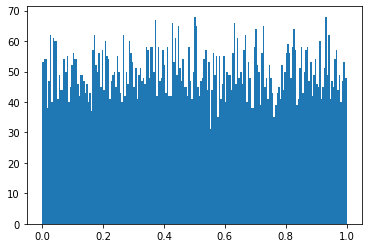

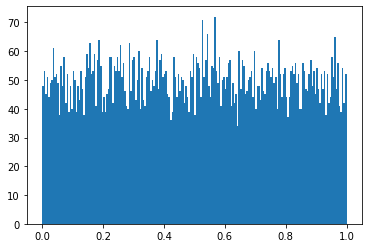

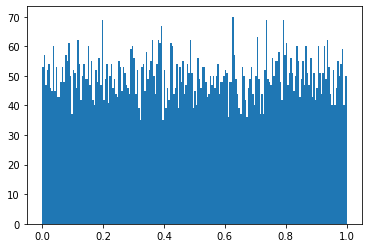

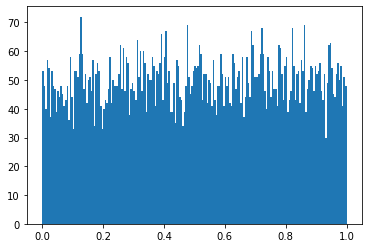

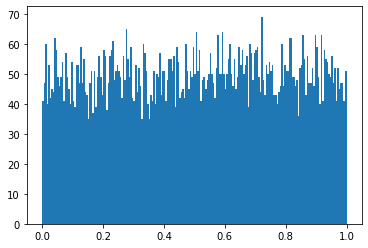

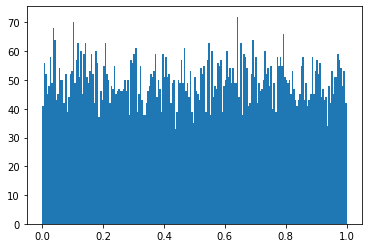

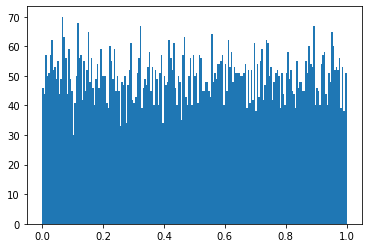

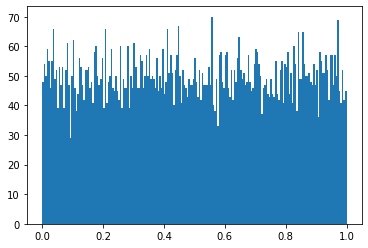

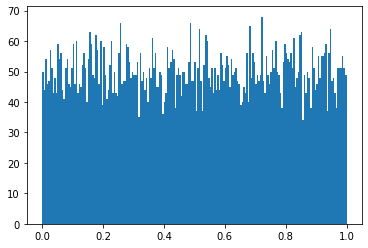

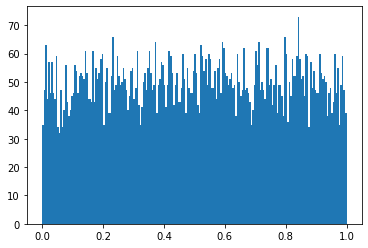

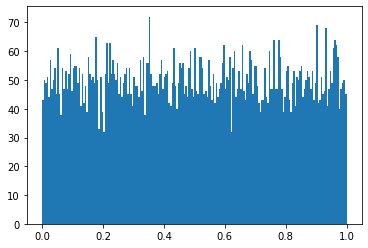

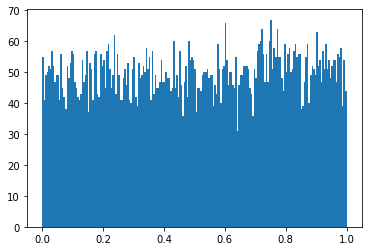

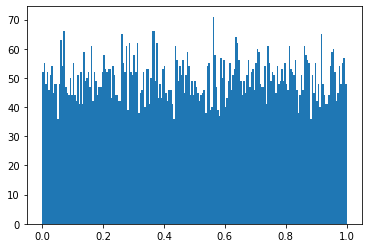

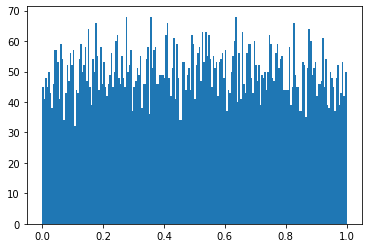

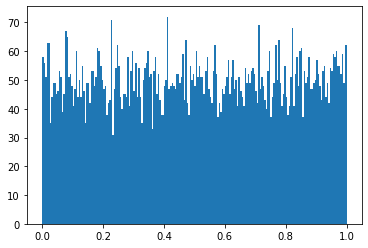

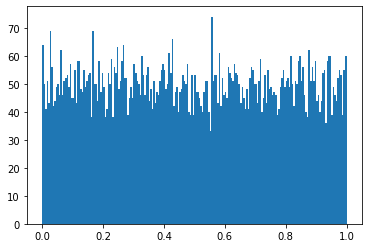

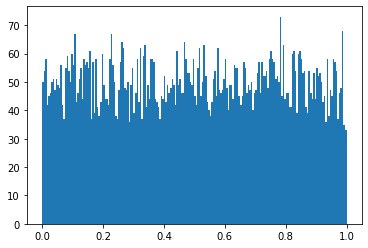

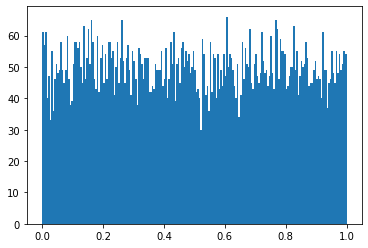

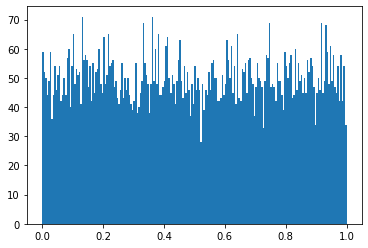

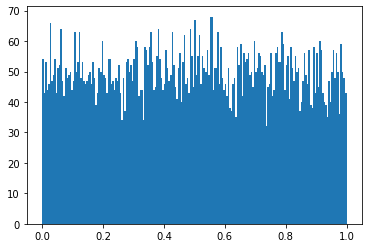

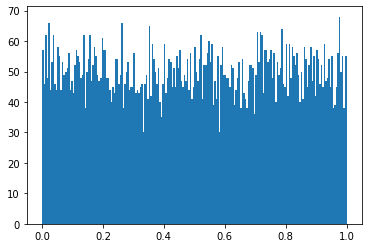

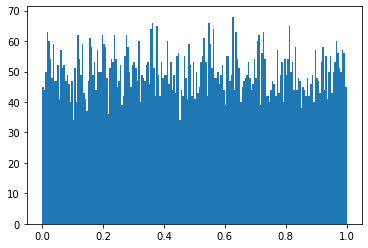

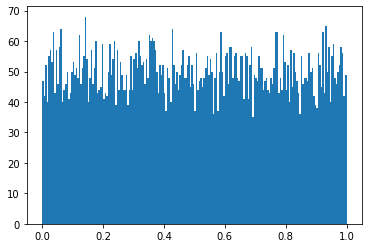

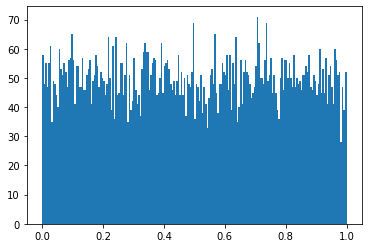

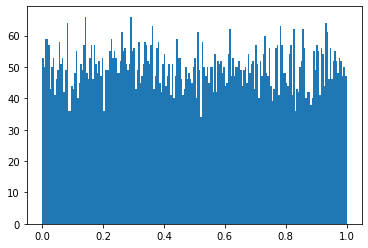

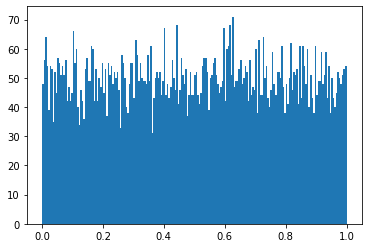

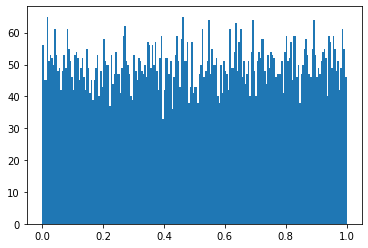

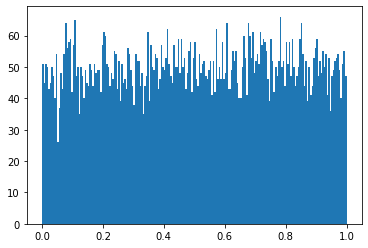

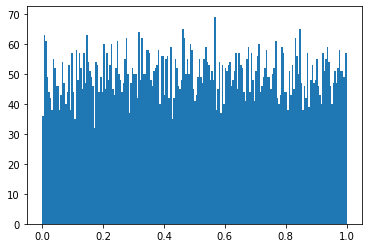

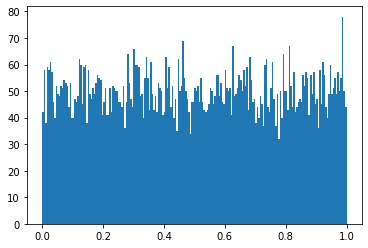

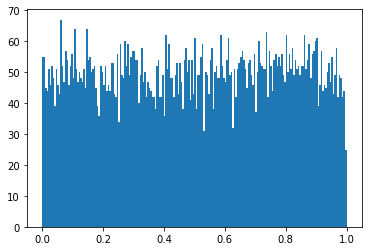

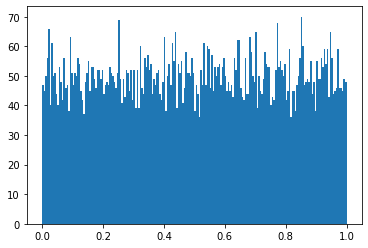

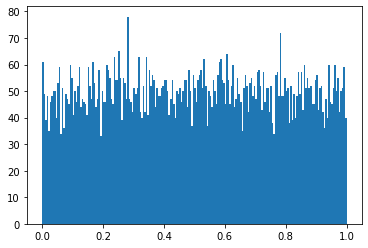

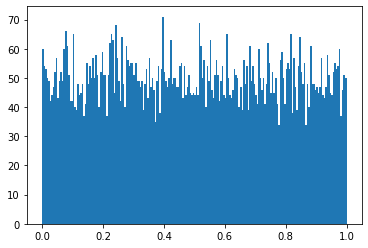

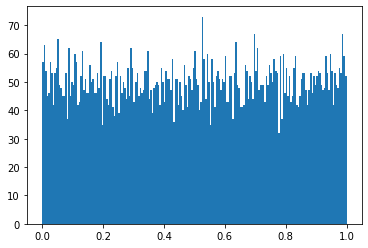

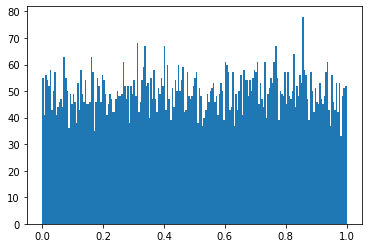

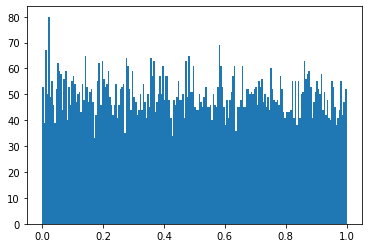

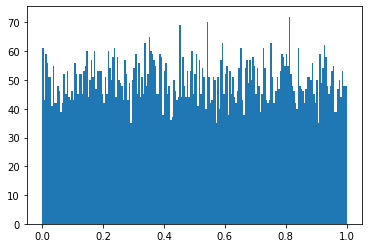

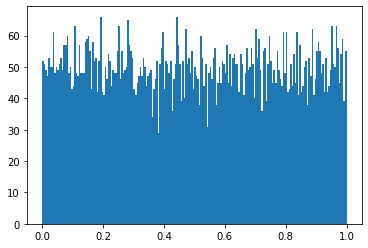

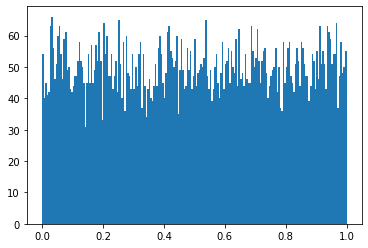

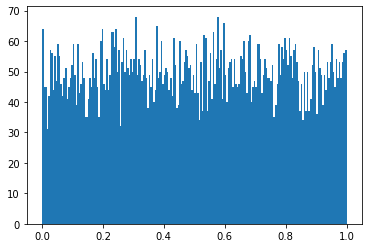

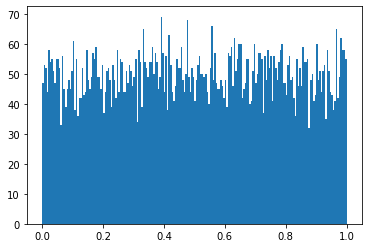

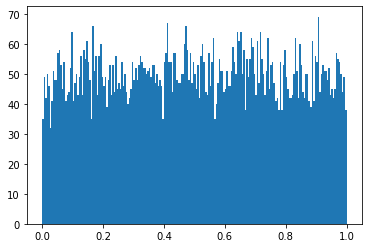

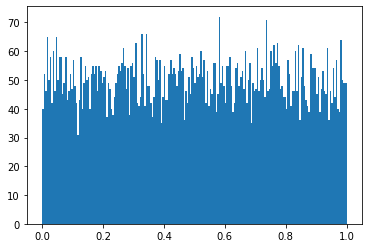

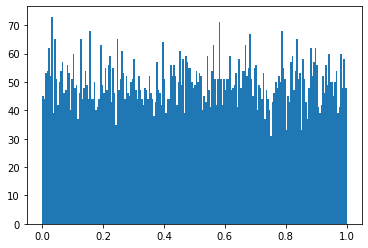

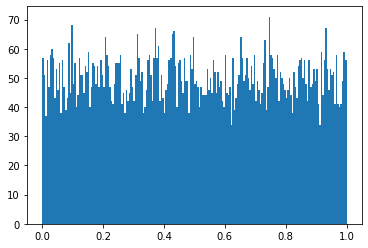

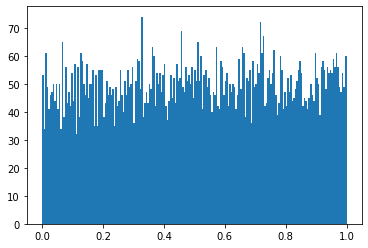

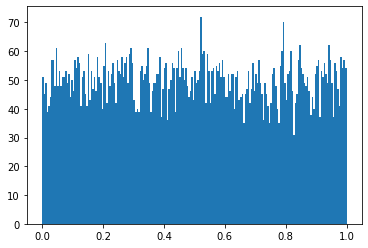

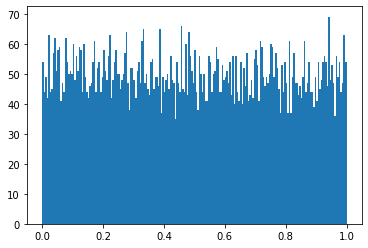

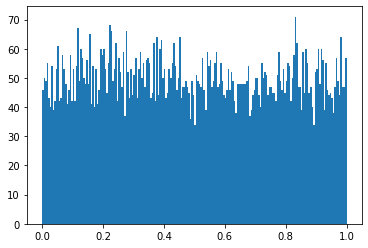

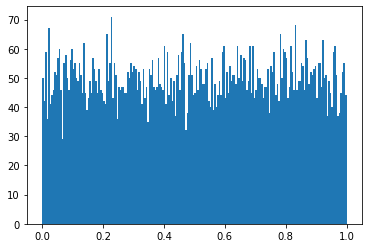

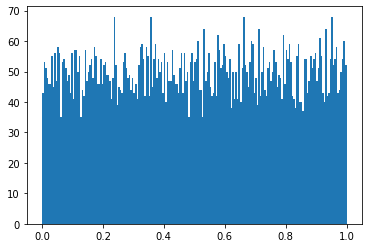

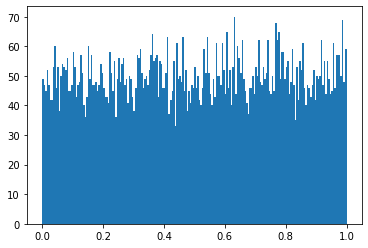

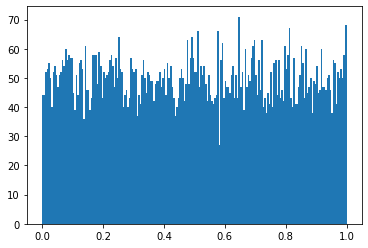

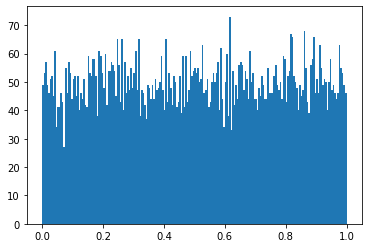

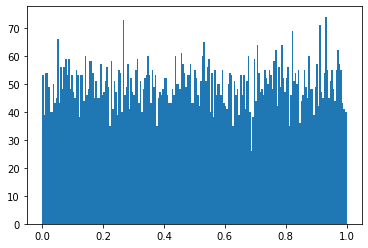

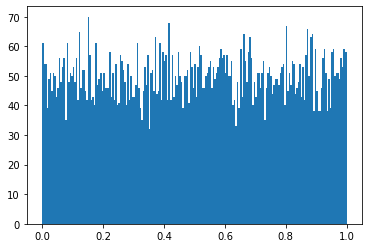

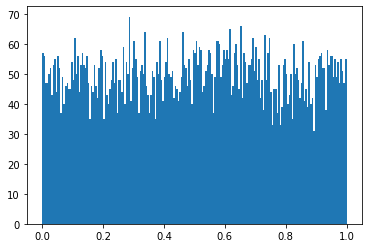

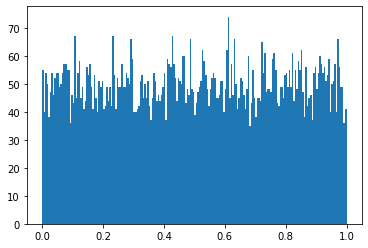

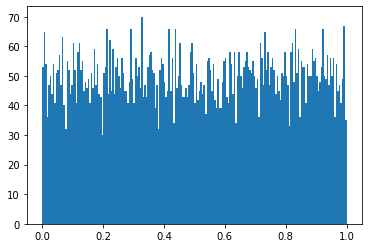

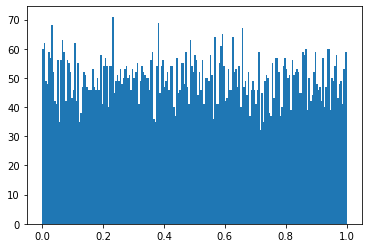

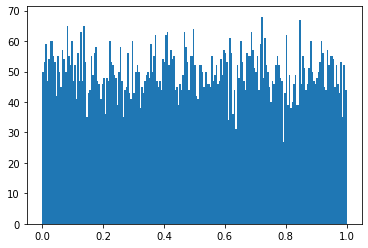

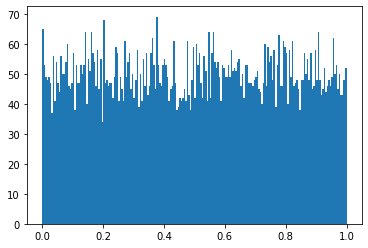

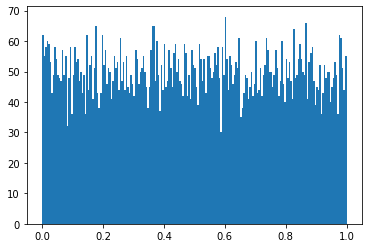

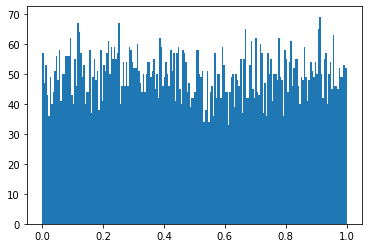

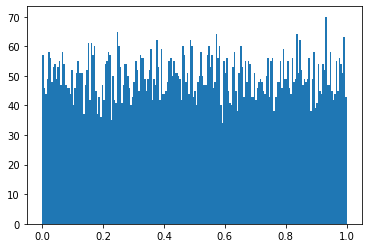

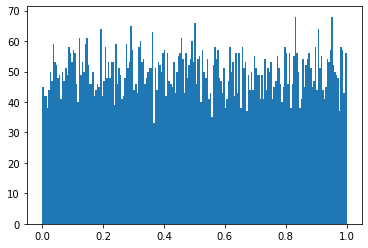

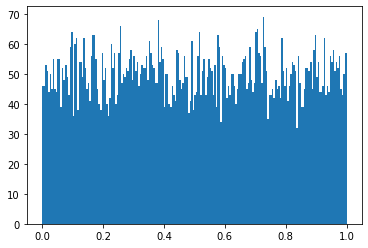

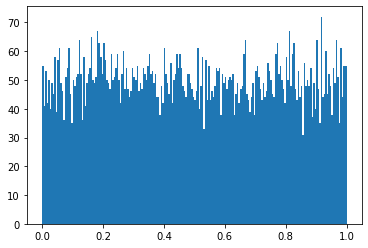

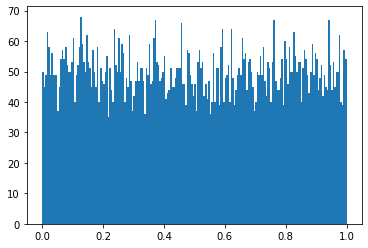

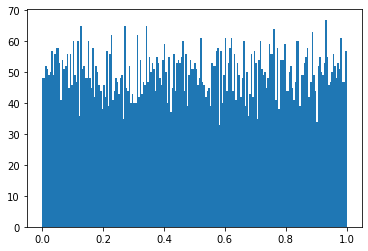

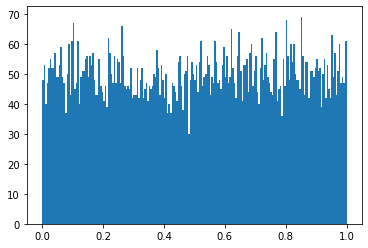

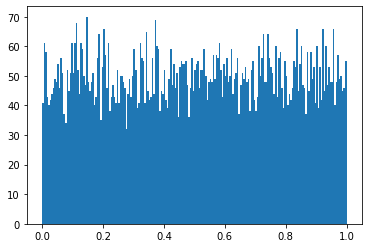

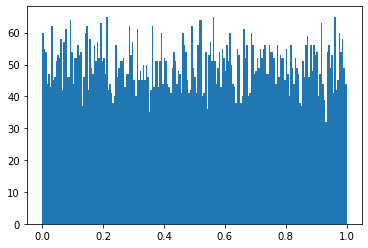

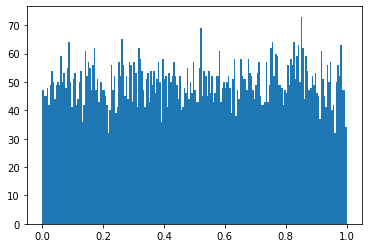

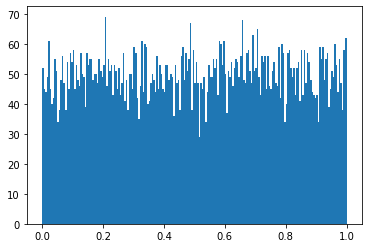

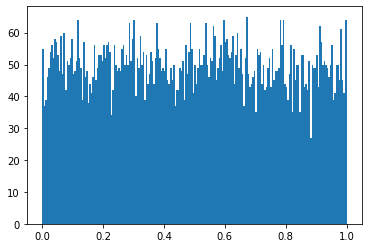

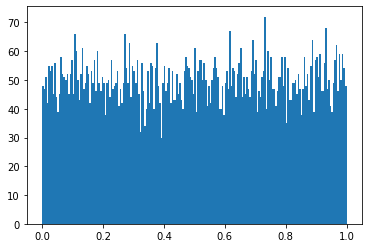

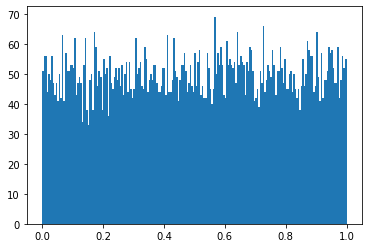

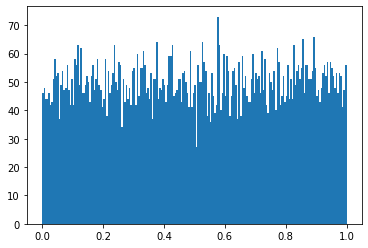

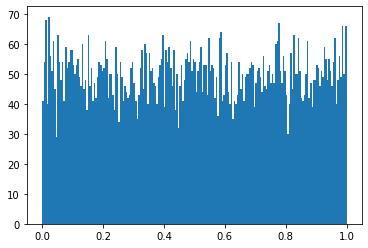

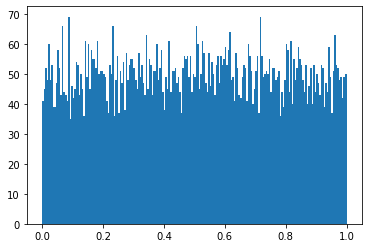

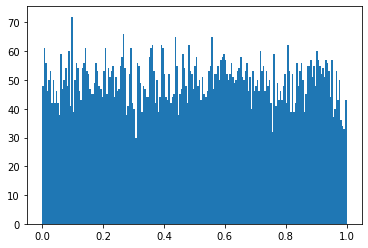

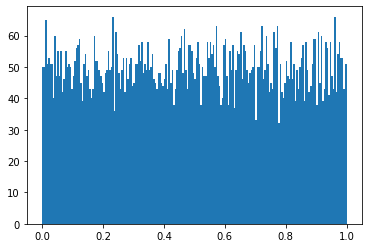

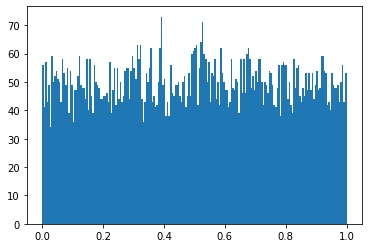

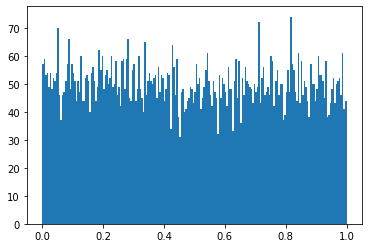

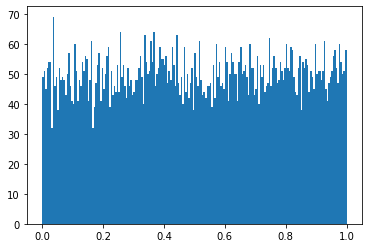

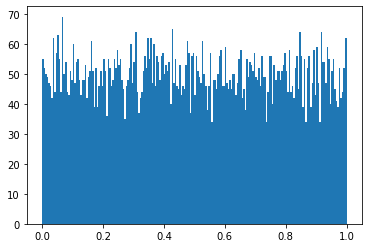

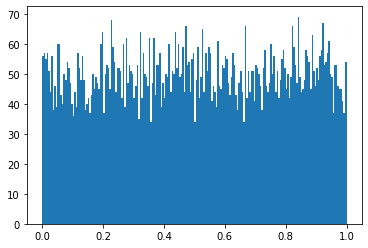

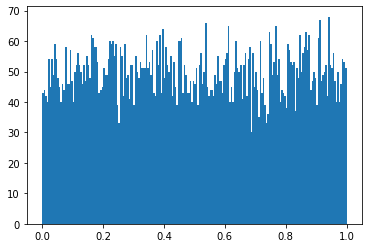

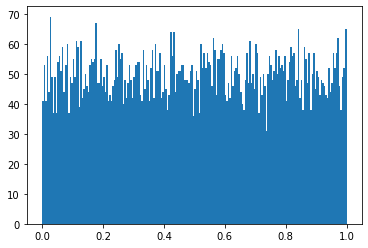

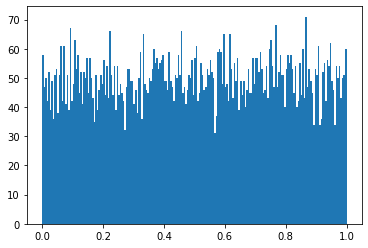

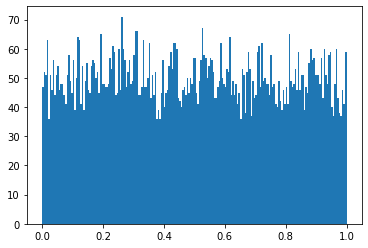

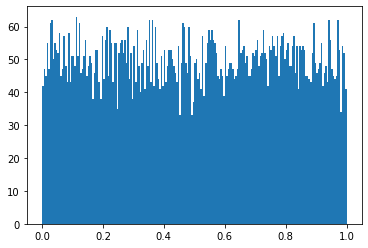

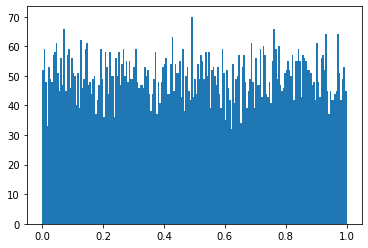

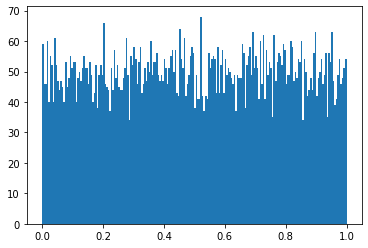

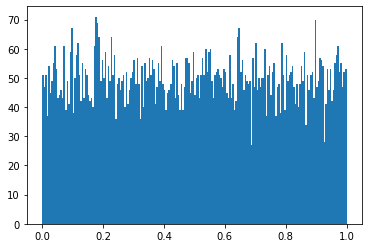

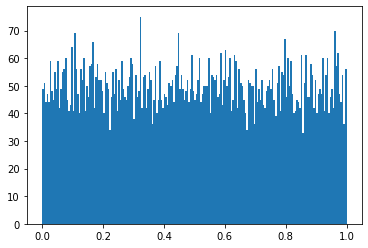

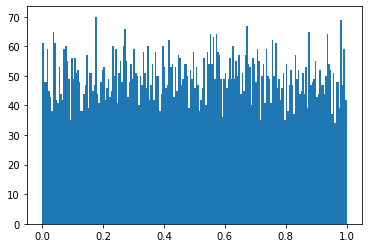

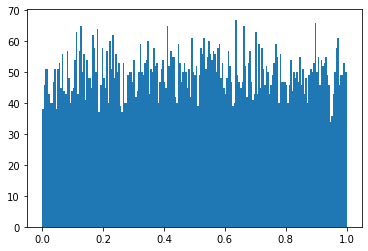

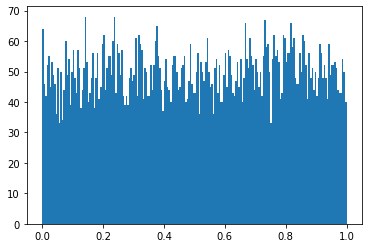

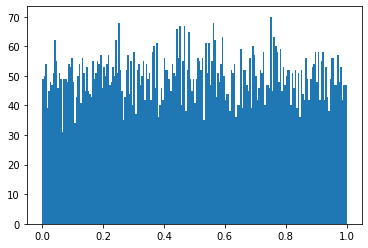

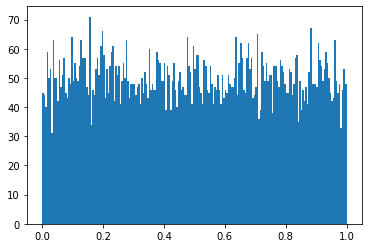

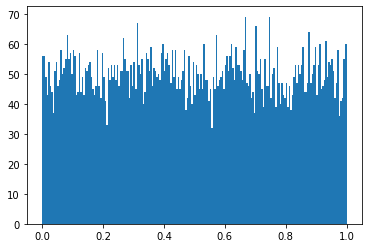

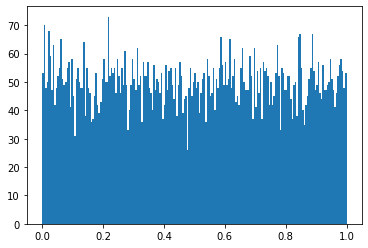

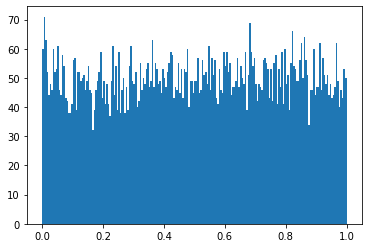

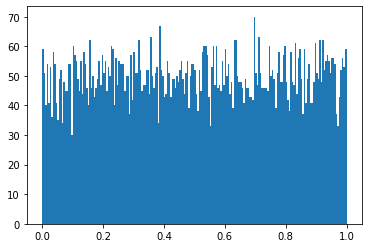

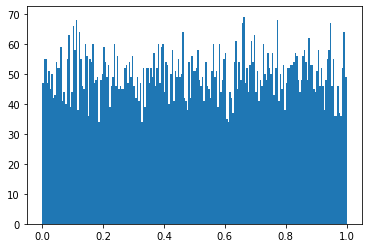

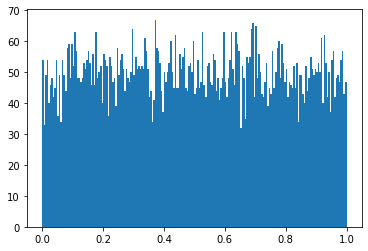

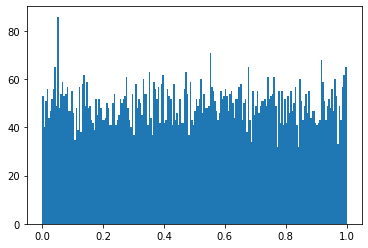

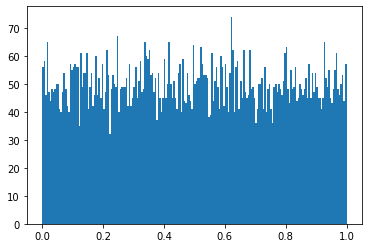

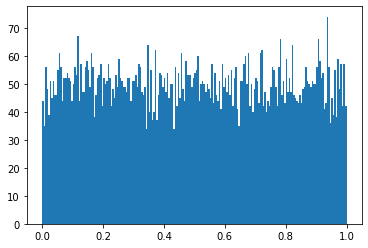

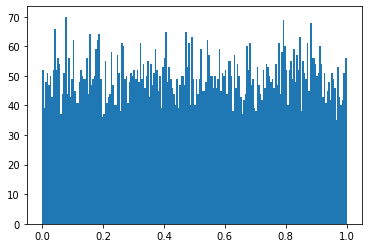

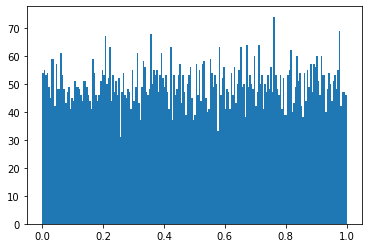

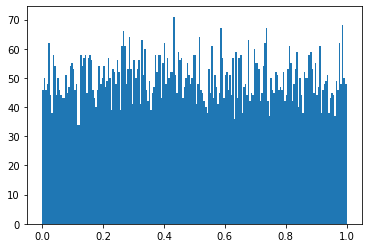

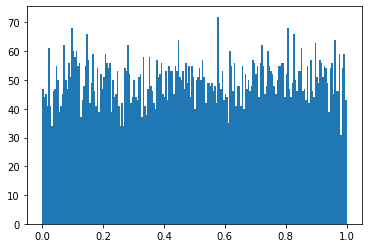

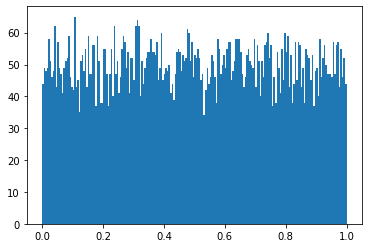

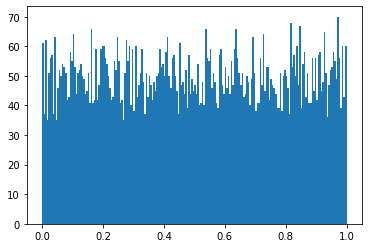

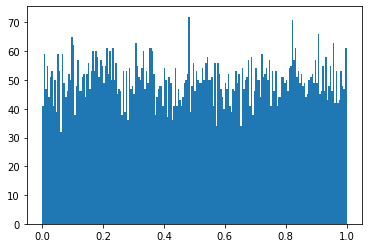

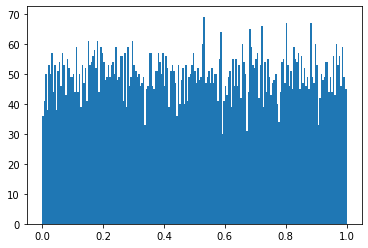

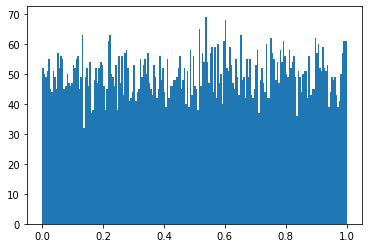

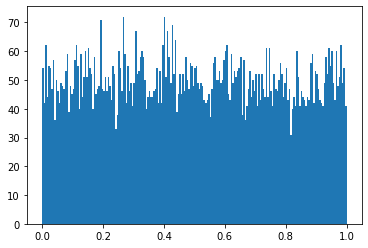

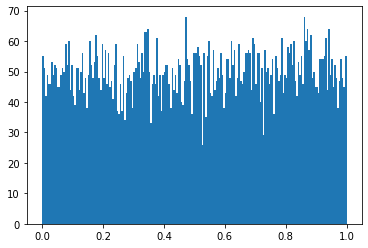

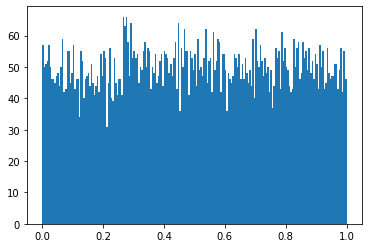

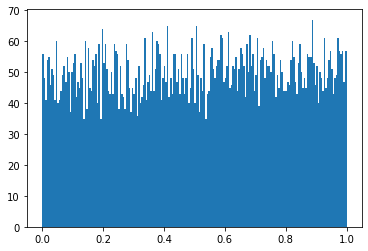

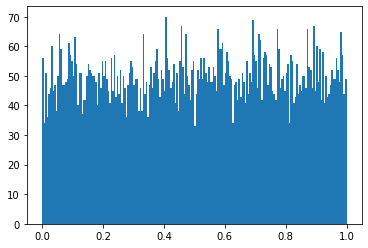

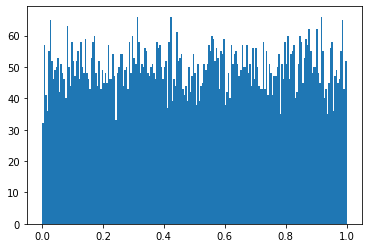

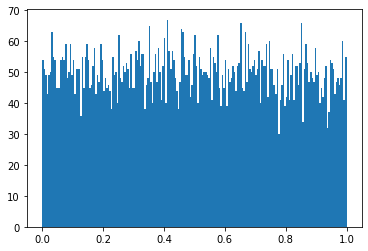

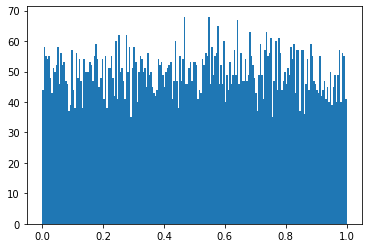

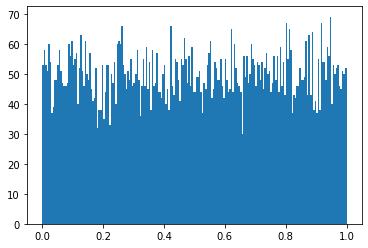

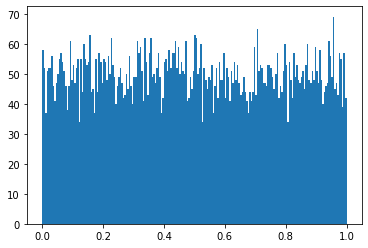

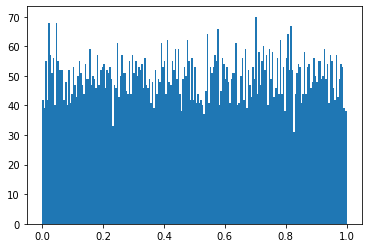

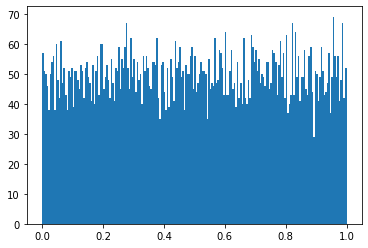

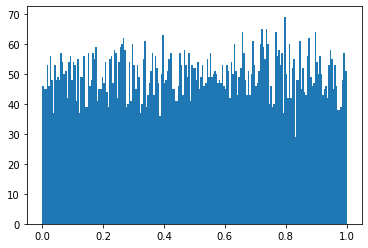

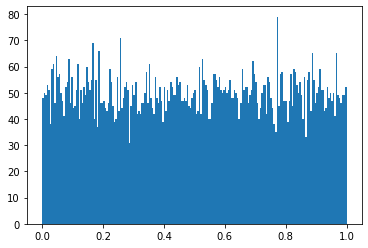

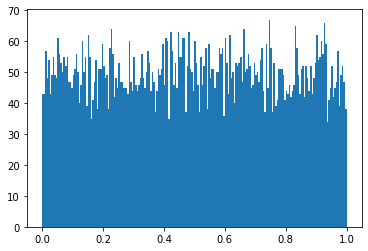

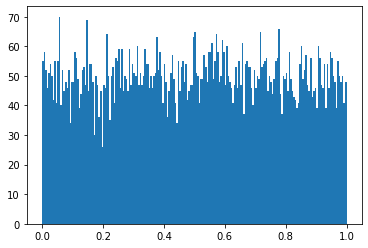

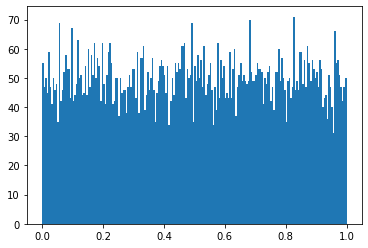

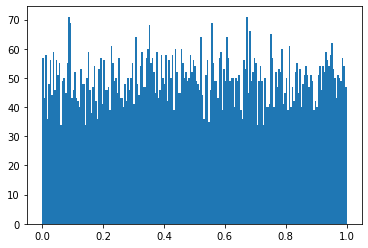

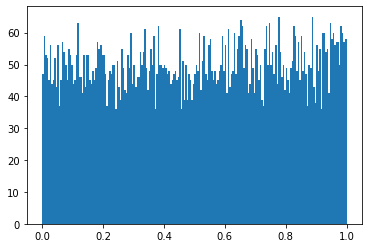

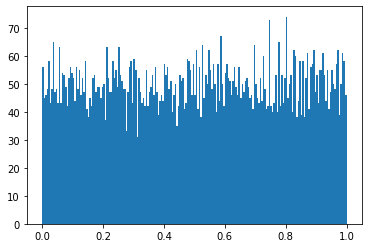

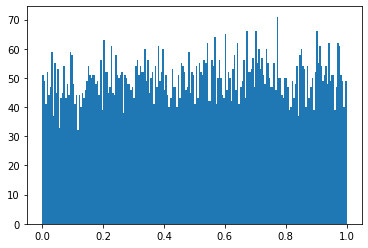

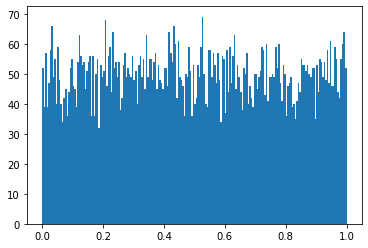

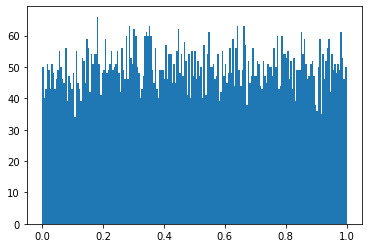

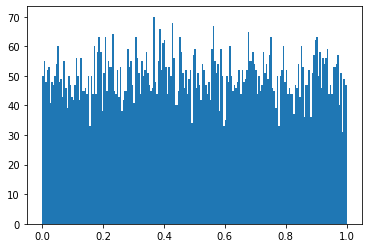

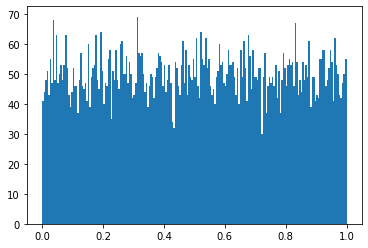

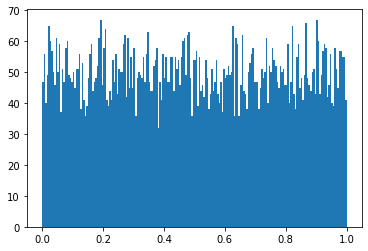

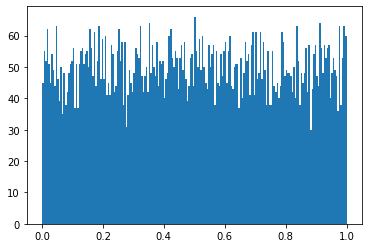

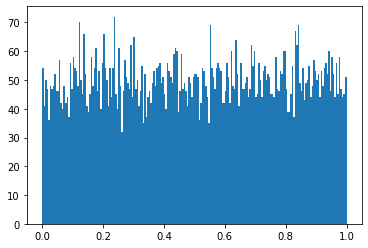

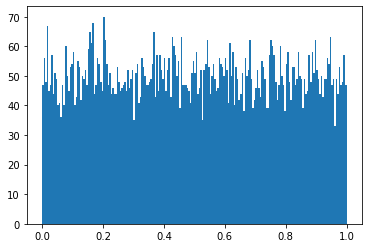

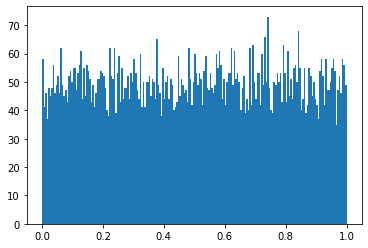

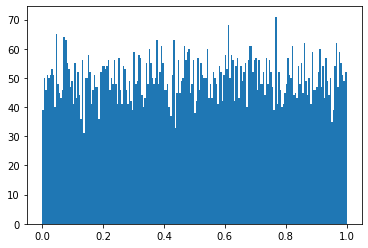

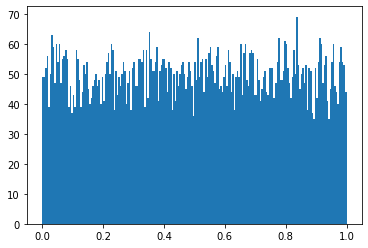

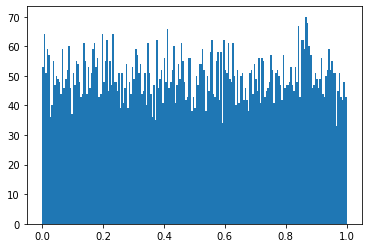

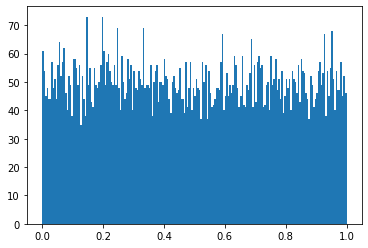

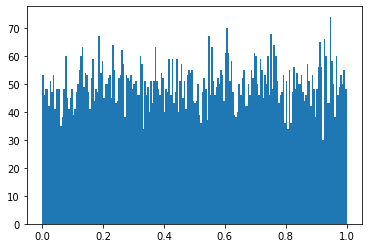

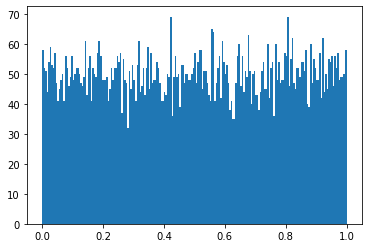

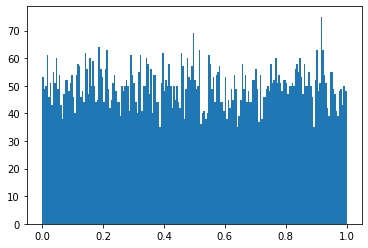

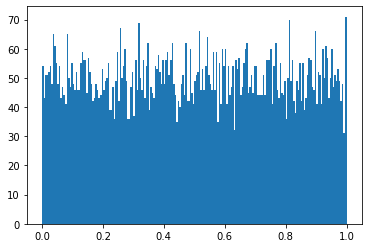

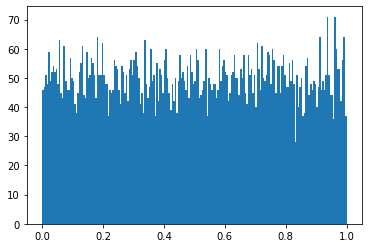

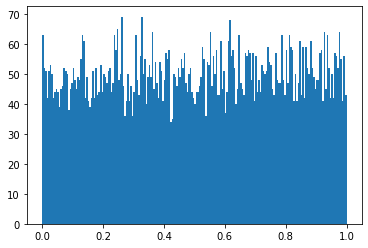

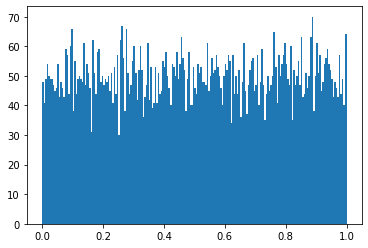

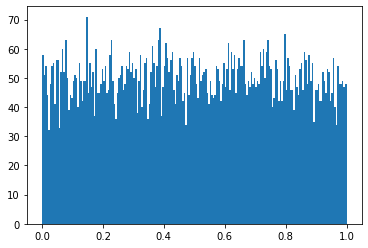

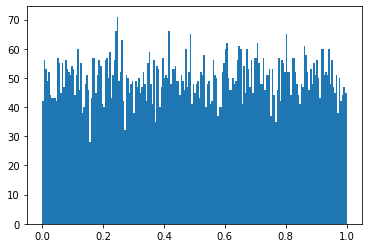

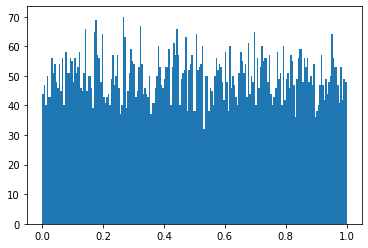

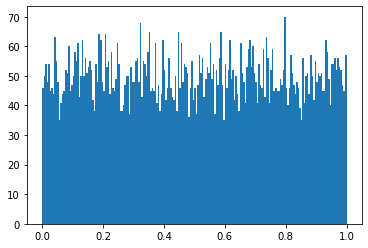

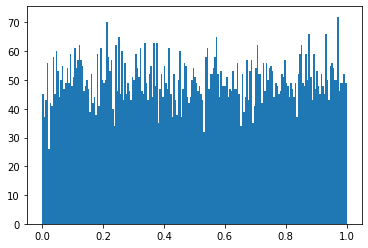

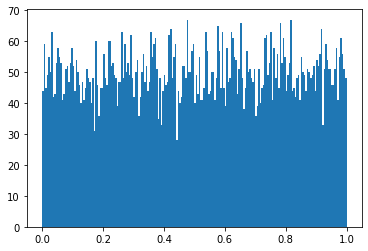

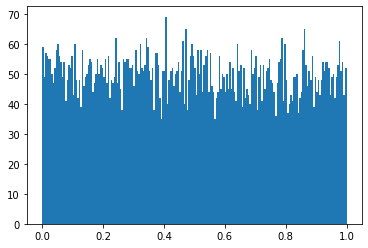

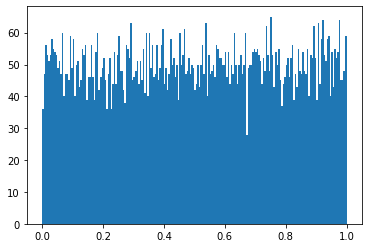

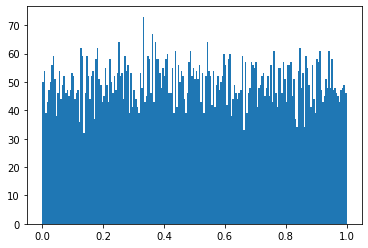

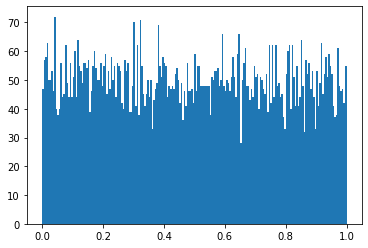

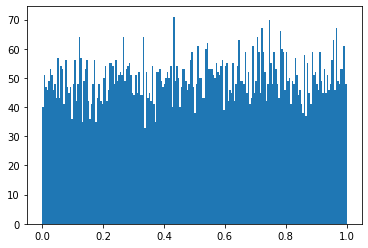

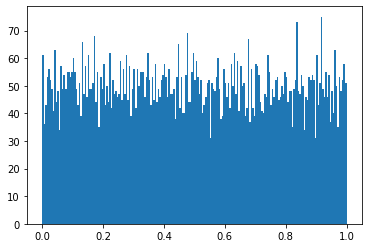

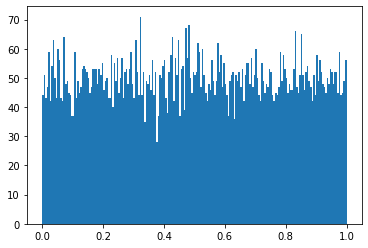

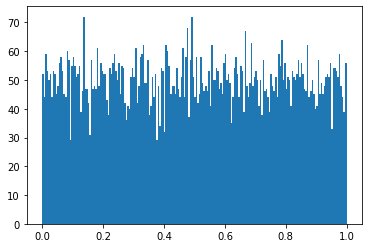

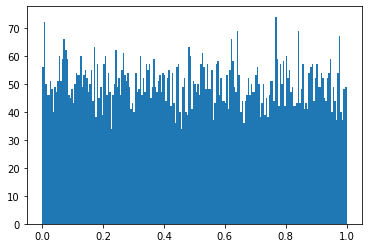

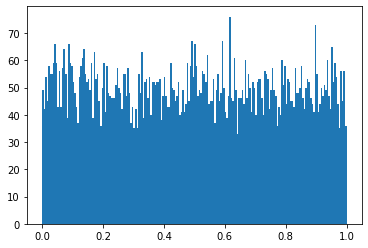

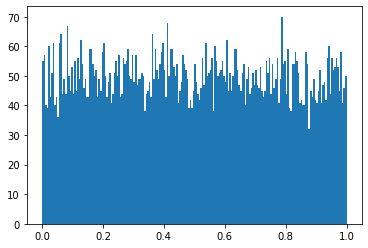

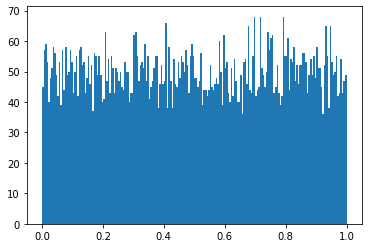

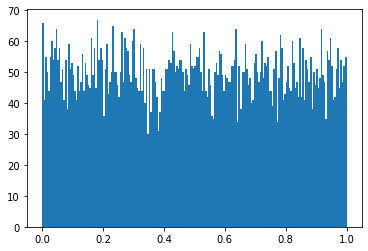

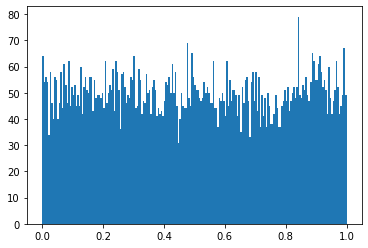

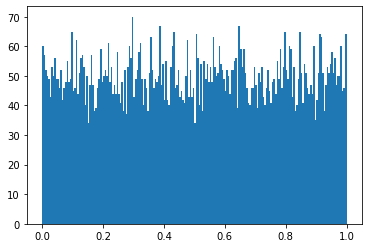

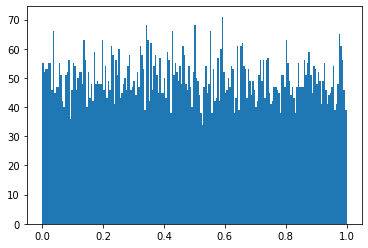

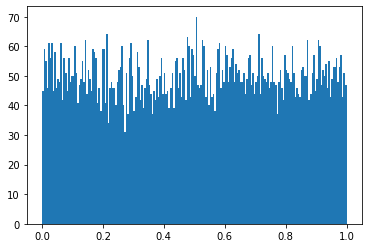

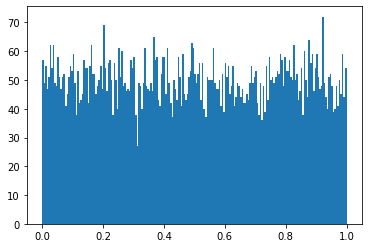

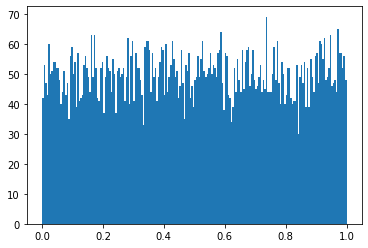

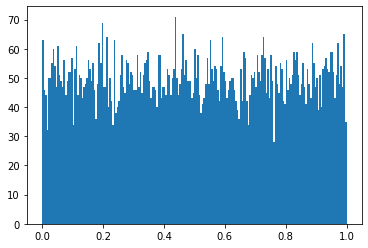

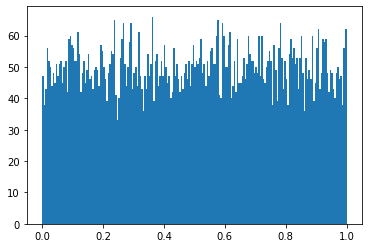

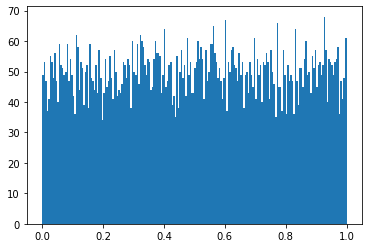

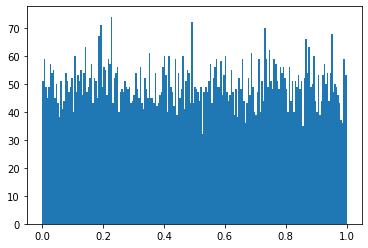

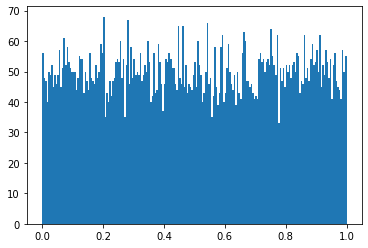

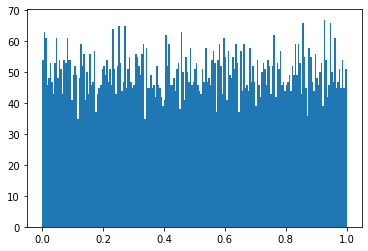

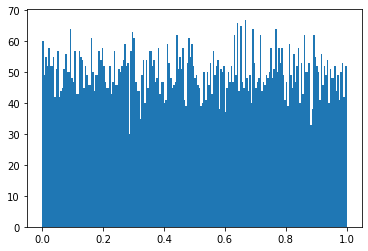

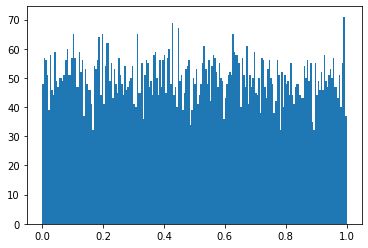

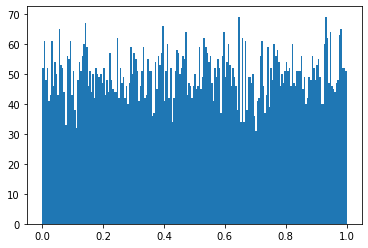

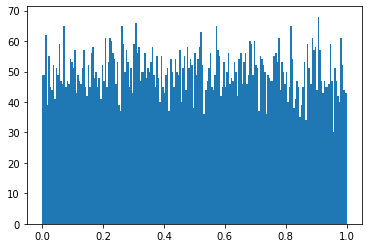

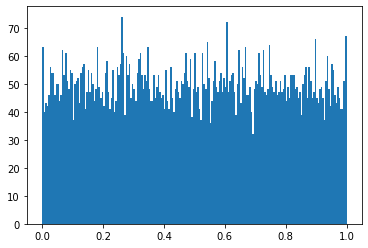

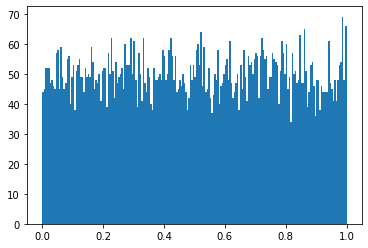

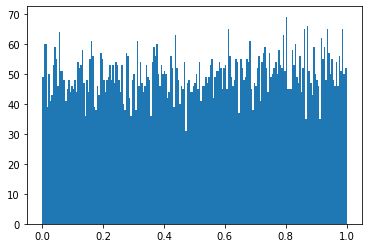

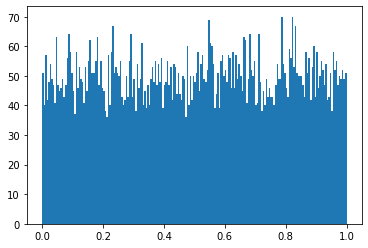

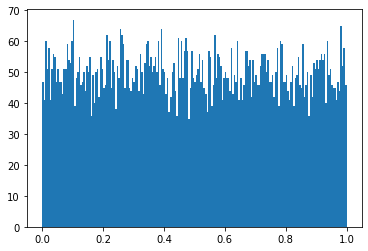

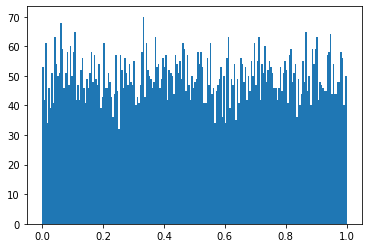

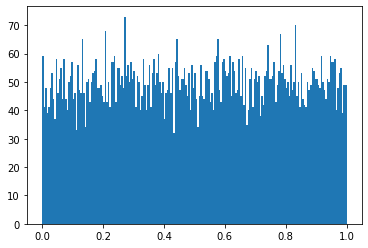

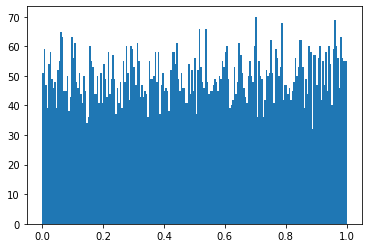

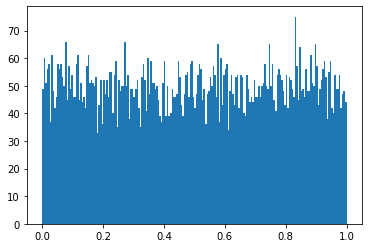

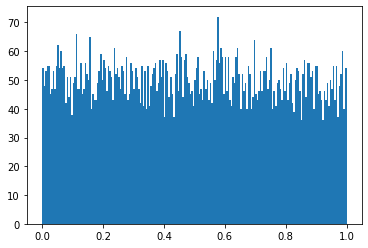

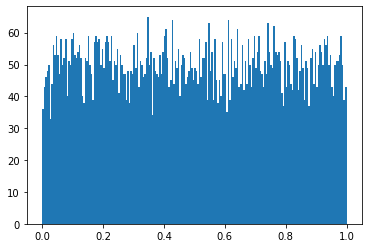

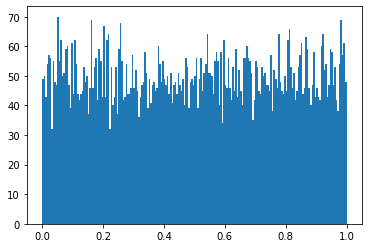

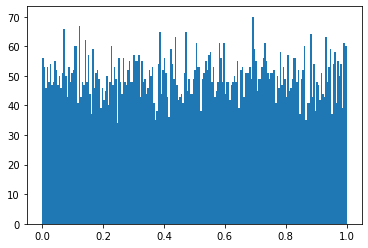

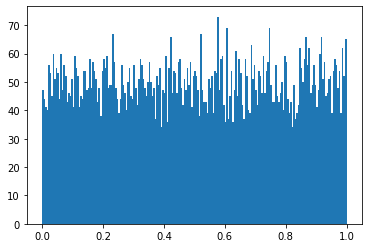

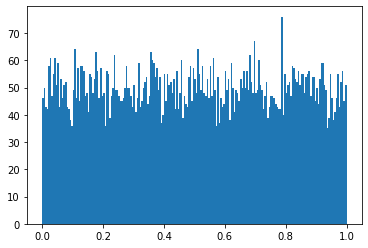

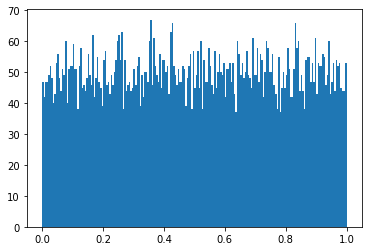

5000
5000


In [4]:
seed = 7
np.random.seed(seed)
#exec(open('distribution/twopeak.py').read())
exec(open('distribution/uniform.py').read())
#exec(open('distribution/normal.py').read())
X_train,  X_test = train_test_split(value_list, test_size=0.5, random_state=seed)

dataset_size = len(X_train)
print(dataset_size)
#print(X_train[:100])
print(len(X_test))
#run_cs()

In [5]:
def cost_sharing_with_deadline(test,t_c,target):
    temp_max_delay_list=[0 for i in range(len(test))]
    temp_sum_delay=0
    result=False
    
    for k in range(len(test),0,-1):
        count=0;
        delay=0;
        for ii in range(len(test)):
            item= test[ii]
            if(item+1e-9>=target/k):
                count+=len(test)-ii;
                break;
            else:
                delay+=t_c[ii];
                temp_max_delay_list[ii]=t_c[ii]
            
        if(count>=k):
            temp_sum_delay+=delay;
            result=True
            break;
        if(k<=1):
            #print(test,number_n);
            temp_max_delay_list=t_c
            temp_sum_delay=sum(t_c);
            result=False
            
    
    return temp_max_delay_list,temp_sum_delay,result



def cost_sharing_with_deadline_free(n,_i,numbers_of_people_will_pay,started_k):
    
    for k in range(started_k,0,-1):
        if(n-_i<=k):
            x=k-1
        else:
            x=k
        #print(n,_i,x,numbers_of_people_will_pay[x],k)
        if(numbers_of_people_will_pay[x]>=k):
            return True,k
        
            
    return False,0





#Cost Sharing
def run_cs(deadline_list):
    sum_delay=0
    max_delay=0
    test_number=0
    for i in range(len(X_test)):
        test_number+=1
        temp_max_delay=0
        temp_delay=0
        test = copy.deepcopy(X_test[i])
        #test_change = copy.deepcopy(X_test[i]);
        test_change_temp = []
        
        Foo_list = []
        for j in range(len(test)):
            test_change_temp.append(test[j] * deadline_list[j])
            Foo_list.append(Foo(test[j],test_change_temp[j],deadline_list[j]))
            
        Foo_list.sort(reverse=False)
        
        for j in range(len(test)):
            test[j]=Foo_list[j].test_item
            test_change_temp[j]=Foo_list[j].test_change_item
            deadline_list[j]=Foo_list[j].deadline

        test_change = copy.deepcopy(test_change_temp);
        
        numbers_of_people_will_pay = [-10 for ii in range(len(test_change)+2)]#pay 1/k
        
        k = 1
        started=len(test_change)-1
        end_k=-10
        for j in range(len(test_change)):
            if(k<=len(test_change)):
                for people_id in range(started,-1,-1):
                    if(test_change[people_id]+1e-9>=1.0/k):
                        started=people_id
                        numbers_of_people_will_pay[k]=len(test_change)-people_id
                        end_k=len(test_change)-people_id
                    else:
                        k+=1
                        break;
                    
        for j in range(k,len(test_change)+1):
            numbers_of_people_will_pay[j]=end_k
            

        
        temp_max_delay_list,temp_sum_delay,judge_i =  cost_sharing_with_deadline(test_change,
                        copy.deepcopy(deadline_list),1.0)
#         print()
#         print(test_change)
#         print(temp_max_delay_list)
#         print(temp_sum_delay)
#         print(judge_i)
        
#         #         print(test_change)
#         oo=[]
#         for j in range(1,len(test_change)+1):
#             oo.append( round(1.0/j, 2))

#         print(oo)
#         print(numbers_of_people_will_pay)
#         print()

        judge_i= True
        started_k = len(test)
        for _i in range(len(test_change)):
            if judge_i:
                judge_i,started_k =  cost_sharing_with_deadline_free(len(test_change),
                    _i,numbers_of_people_will_pay,started_k)
            #print(judge_i,_i,started_1,1.0/(started_1+0.001))
            
            #print(_i,judge_i,started_k)
            started_k+=1
            if(judge_i==False):
                temp_sum_delay += (1.0-deadline_list[_i])
                temp_max_delay_list[_i] += (1.0-deadline_list[_i])
                
            
        #print(judge_i)
        max_delay+=max(temp_max_delay_list)
        
        sum_delay+=temp_sum_delay
        
    print("deadline: ",deadline_list[0])
    print("sum_delay: ",sum_delay/test_number)
    print("max_delay: ",max_delay/test_number)
    print()
    return sum_delay/test_number
    
    


In [6]:
devided=1000

for deadline in range(2,20):
    deadline_free = (devided-deadline) /devided
    deadline = (deadline) /devided
    deadline_list = [deadline for i in range(Agent_number_n)]
    run_cs(deadline_list)  # deadline=0 free get; deadline=1 full payment 
    print()
    

deadline:  0.002
sum_delay:  1000.0000000000013
max_delay:  1.0


deadline:  0.003
sum_delay:  999.9999999999987
max_delay:  1.0


deadline:  0.004
sum_delay:  363.6033359999999
max_delay:  0.37621519999997827


deadline:  0.005
sum_delay:  1.3843499999999986
max_delay:  0.004999999999999862


deadline:  0.006
sum_delay:  1.268565600000007
max_delay:  0.006000000000000182


deadline:  0.007
sum_delay:  1.208950400000003
max_delay:  0.007000000000000374


deadline:  0.008
sum_delay:  1.1722271999999911
max_delay:  0.008000000000000007


deadline:  0.009
sum_delay:  1.1467512000000055
max_delay:  0.009000000000000305


deadline:  0.01
sum_delay:  1.1277519999999972
max_delay:  0.009999999999999724


deadline:  0.011
sum_delay:  1.1129469999999944
max_delay:  0.01100000000000084


deadline:  0.012
sum_delay:  1.1011176000000045
max_delay:  0.012000000000000365


deadline:  0.013
sum_delay:  1.0908351999999975
max_delay:  0.012999999999999545


deadline:  0.014
sum_delay:  1.08236800000000

In [7]:
#Cost Sharing
def run_cs_pure():
    sum_delay=0
    max_delay=0
    test_number=0
    for i in range(len(X_test)):
        test_number+=1
        temp_max_delay=0
        temp_delay=0
        test=copy.deepcopy(X_test[i]);

        for k in range(Agent_number_n,0,-1):
            count=0;
            delay=0;
            for item in test:
                if(item>=1.0/k):
                    count+=1;
                else:
                    delay+=1;
            if(count>=k):
                temp_delay=delay;
                if temp_delay != 0 :
                    temp_max_delay = 1
                break;
            if(k<=1):
                #print(test);
                temp_delay=Agent_number_n;
                temp_max_delay=1
        
        
        sum_delay+=temp_delay
        max_delay+=temp_max_delay
                
    print("max_delay",max_delay/test_number);
    print("sum_delay",sum_delay/test_number);
    
run_cs_pure()

max_delay 0.6182
sum_delay 0.9894
